
# **Walmart Business Case Study - Confidence Interval & CLT (Pavithran)**

# **About**
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# **Business Problem**
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import binom
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# **Importing the dataset:**

In [129]:
df = pd.read_csv("walmart_data.csv")
df.head(5)

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

# **Features of the dataset:**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.

The dataset has the following features:
- **User_ID:** Unique Id for Customer.
- **Product_ID:** Product Id
- **Gender:** Male/Female
- **Age:** Age in bins  
- **Occupation:** Occupation of the Customers(Masked)
- **City_Category:**  Category of the City (A,B,C)
- **StayInCurrentCityYears:** Number of years stay in current city
- **MaritalStatus:** Single or Married
- **ProductCategory:** Product Category (Masked) 
- **Purchase:** Purchase Amount  

# **Checking the Structure of the dataset:**

In [130]:
df.shape

(550068, 10)

- The given Walmart dataset contains **550068 Rows** & **10 Columns** 

In [131]:
df.ndim

2

# **Checking the Characteristics of the dataset:**

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


- By checking the datatype of the dataset. we got **5 integer datatype and 5 object datatype**

# **Converting int datatype to object:**

In [133]:
columns = ["User_ID", "Occupation", "Marital_Status", "Product_Category"]
df[columns] = df[columns].astype("object")
df.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2              0                3      8370  
1                          2              0                1     15200  
2                          2              0               12      1422  
3                          2              0               12      1057  
4                         4+              0                8      7969

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


- We have converted the dataset to catogorical (object) datatype except Purchase.

# **Checking for Null Values and Duplicated Values in the dataset**

In [135]:
null_values = df.isnull().sum()
print("Total No.Of Null Values:")
print(null_values)

Total No.Of Null Values:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


- We found that that the given dataset contains **No Null Values**

In [136]:
duplicated_values = df.duplicated().sum()
print("Total No.Of Duplicated Values : ", duplicated_values)

Total No.Of Duplicated Values :  0


- We found that that the given dataset contains **No Duplicated Values** 

# **Checking the Statistical Summary of the dataset:**

In [137]:
df.describe()

Purchase
count  550068.000000
mean     9263.968713
std      5023.065394
min        12.000000
25%      5823.000000
50%      8047.000000
75%     12054.000000
max     23961.000000

In [138]:
df.describe(include=object)

User_ID Product_ID  Gender     Age  Occupation City_Category  \
count    550068     550068  550068  550068      550068        550068   
unique     5891       3631       2       7          21             3   
top     1001680  P00265242       M   26-35           4             B   
freq       1026       1880  414259  219587       72308        231173   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  
count                      550068          550068            550068  
unique                          5               2                20  
top                             1               0                 5  
freq                       193821          324731            150933

#### **Insights:**
- User_ID: There are 5,891 unique customers, with the most frequent customer appearing 1,026 times.
- Product_ID: A total of 3,631 unique products were purchased, with the top product being purchased 1,880 times.
- Gender: The majority of customers are male, with "M" appearing 414,259 times.
- Age: The most common age group is 26-35, accounting for 219,587 purchases.
- Occupation: There are 21 different occupations, with the most common one (labeled as "4") having 72,308 entries.
- City_Category: Most customers are from City Category "B," with 231,173 purchases.
- Stay_In_Current_City_Years: The majority of customers have lived in their current city for 1 year, with 193,821 entries.
- Marital_Status: Most customers are unmarried, with a marital status of "0(Unmarried)" appearing 324,731 times.
- Product_Category: There are 20 different product categories, with the most common category (labeled as "5") having 150,933 purchases.
- Purchase: The minimum purchase amount is 12 and the maximum purchase amount is 23961. The mean purchase amount is 9264.

# **Replacing Values Of Gender & Marital_Status Column**

- Gender  : M = Male / F = Female
- Marital_Status : 0 = Single / 1 = Married

In [139]:
df["Gender"].replace({"M":"Male","F":"Female"},inplace = True) # Replacing M with Male and F with Female
df.head()


User_ID Product_ID  Gender   Age Occupation City_Category  \
0  1000001  P00069042  Female  0-17         10             A   
1  1000001  P00248942  Female  0-17         10             A   
2  1000001  P00087842  Female  0-17         10             A   
3  1000001  P00085442  Female  0-17         10             A   
4  1000002  P00285442    Male   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2              0                3      8370  
1                          2              0                1     15200  
2                          2              0               12      1422  
3                          2              0               12      1057  
4                         4+              0                8      7969

In [140]:
df["Marital_Status"].replace({0:"Single",1:"Married"},inplace = True) # Replacing 0 with Single and 1 with Married
df.head()

User_ID Product_ID  Gender   Age Occupation City_Category  \
0  1000001  P00069042  Female  0-17         10             A   
1  1000001  P00248942  Female  0-17         10             A   
2  1000001  P00087842  Female  0-17         10             A   
3  1000001  P00085442  Female  0-17         10             A   
4  1000002  P00285442    Male   55+         16             C   

  Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                          2         Single                3      8370  
1                          2         Single                1     15200  
2                          2         Single               12      1422  
3                          2         Single               12      1057  
4                         4+         Single                8      7969

# **Non-Graphical Analysis: Value Counts and Unique Attributes**

In [141]:
for i in df.columns:
    print(f"Unique Value of {i}:")
    print(df[i].unique())
    print("-"*50)
    print(f"Total No of {i}: ", df[i].nunique())
    print("-"*50)
    print(f"Value Count of {i}:")
    print(df[i].value_counts().sort_values(ascending= False).head(5))
    print("-"*50)
    print()

Unique Value of User_ID:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
--------------------------------------------------
Total No of User_ID:  5891
--------------------------------------------------
Value Count of User_ID:
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
Name: count, dtype: int64
--------------------------------------------------

Unique Value of Product_ID:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
--------------------------------------------------
Total No of Product_ID:  3631
--------------------------------------------------
Value Count of Product_ID:
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: count, dtype: int64
--------------------------------------------------

Unique Value of Gender:
['Female' 'Male']
--------------------------------------------------
Total No of Gender:  2
-----------------------------------------

# **Checking the difference between Mean and Median:**

In [142]:
mean =round(df["Purchase"].mean())
median = round(df["Purchase"].median())

diff = round((mean - median))
print (f"Column Purchase has a significant difference between mean ({mean}) and median ({median}) and the difference({diff}), indicating potential skewness or outliers.")

Column Purchase has a significant difference between mean (9264) and median (8047) and the difference(1217), indicating potential skewness or outliers.


# **Checking for Outliers in the dataset:**

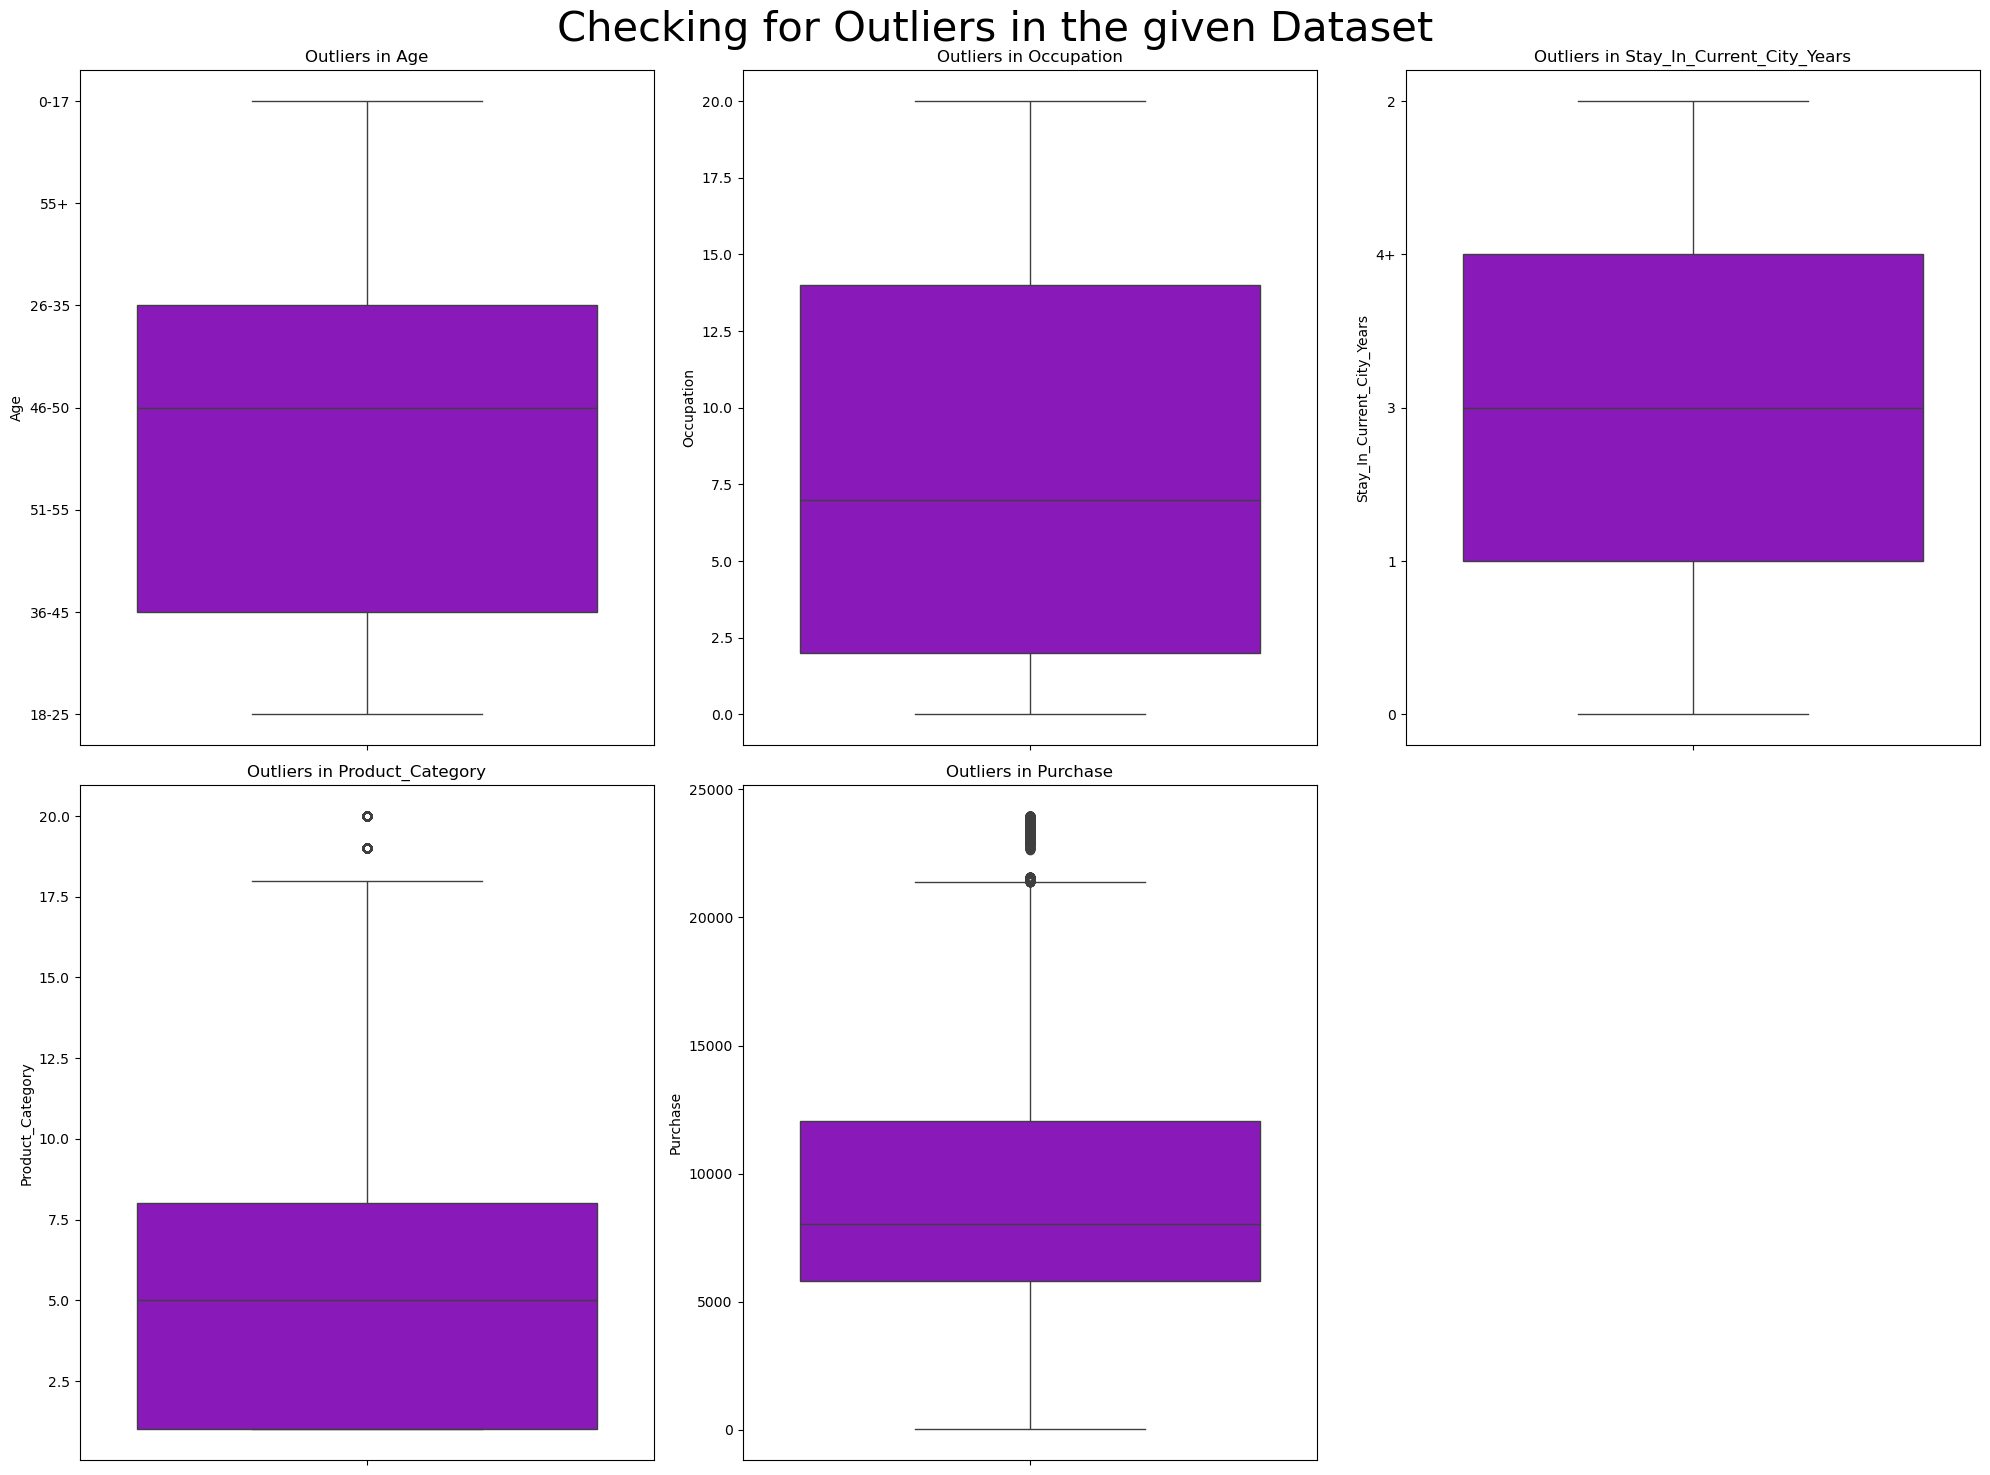

In [195]:
columns = ["Age","Occupation", "Stay_In_Current_City_Years", "Product_Category", "Purchase"] 

plt.figure(figsize=(20,15))

for i,j in enumerate(columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(data = df, y = j, color= "darkviolet")
    plt.title(f"Outliers in {j}")
plt.suptitle("Checking for Outliers in the given Dataset", fontsize = 30)
plt.tight_layout()
plt.show()

- We found **Product_Category & Purchase** have Outliers

# **Checking Outlier Percentage in the given dataset using IQR**

In [144]:
col = ["Product_Category", "Purchase"]
for i in col:
    Q1 = np.percentile(df[i],25)
    Q3 = np.percentile(df[i],75)
    IQR = Q3 - Q1
    print(f"25th Percetile of {i} is {Q1}")
    print(f"75th Percetile of {i} is {Q3}")
    print(f"IQR of {i} is {IQR}")
    Upper_bound = Q3 + (1.5 * IQR)
    Lower_bound = Q1 - (1.5 * IQR)
    print(f"Upper Bound of {i} is {Upper_bound}")
    print(f"Lower Bound of {i} is {Lower_bound}")
    Outlier_percentage = round((len(df.loc[df[i] > Upper_bound])/len(df))*100,2)
    print(f"Outlier Percentage of {i} is {Outlier_percentage}")
    print("*"*40)

25th Percetile of Product_Category is 1.0
75th Percetile of Product_Category is 8.0
IQR of Product_Category is 7.0
Upper Bound of Product_Category is 18.5
Lower Bound of Product_Category is -9.5
Outlier Percentage of Product_Category is 0.75
****************************************
25th Percetile of Purchase is 5823.0
75th Percetile of Purchase is 12054.0
IQR of Purchase is 6231.0
Upper Bound of Purchase is 21400.5
Lower Bound of Purchase is -3523.5
Outlier Percentage of Purchase is 0.49
****************************************


#### **Insights:**
- For the column **Product_Category IQR is 7.0** and **Outlier Percentage is 0.75**
- For the column **Purchase IQR is 6231.0** and **Outlier Percentage is 0.49**

# **Visual Analysis - Univariate & Bivariate** 

In [145]:
# Creating a function to give values in chart:
def add_labels(bar):
    for container in bar.containers:
        bar.bar_label(container)

# **Univariate Analysis**

### **1. Gender Distribution & Marital_Status Distribution & City_Category Distribution**

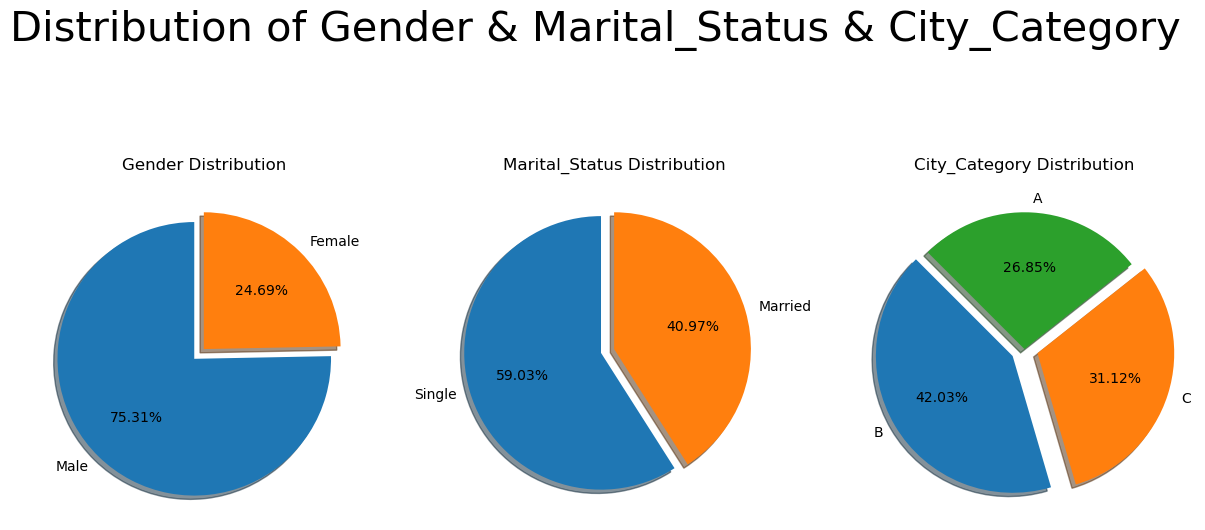

In [146]:
plt.figure(figsize= (15,7))
colors = sns.color_palette("tab10")
plt.subplot(1,3,1)
labels = df["Gender"].value_counts().index
values = df["Gender"].value_counts().values
plt.pie(values, labels= labels, autopct= "%1.2f%%", explode = (0.10, 0), startangle=90,shadow = True, colors= colors)
plt.title("Gender Distribution")

plt.subplot(1,3,2)
labels = df["Marital_Status"].value_counts().index
values = df["Marital_Status"].value_counts().values
plt.pie(values, labels= labels, autopct= "%1.2f%%",explode = (0.10, 0),startangle=90,shadow = True, colors= colors)
plt.title("Marital_Status Distribution")

plt.subplot(1,3,3)
labels = df["City_Category"].value_counts().index
values = df["City_Category"].value_counts().values
plt.pie(values, labels= labels, autopct= "%1.2f%%",explode = (0.10,0.10,0),startangle=135,shadow = True, colors= colors)
plt.title("City_Category Distribution")
plt.suptitle("Distribution of Gender & Marital_Status & City_Category", fontsize = 30)
plt.show()

#### **Insights:**
- Gender Distribution: Males dominated purchase behavior during the Black Friday event.
- Marital Status: Unmarried customers led in transaction volume, suggesting targeted marketing opportunities.
- City Category: City B had the highest transactions, followed by City C and City A.

### **2. Age Distribution**

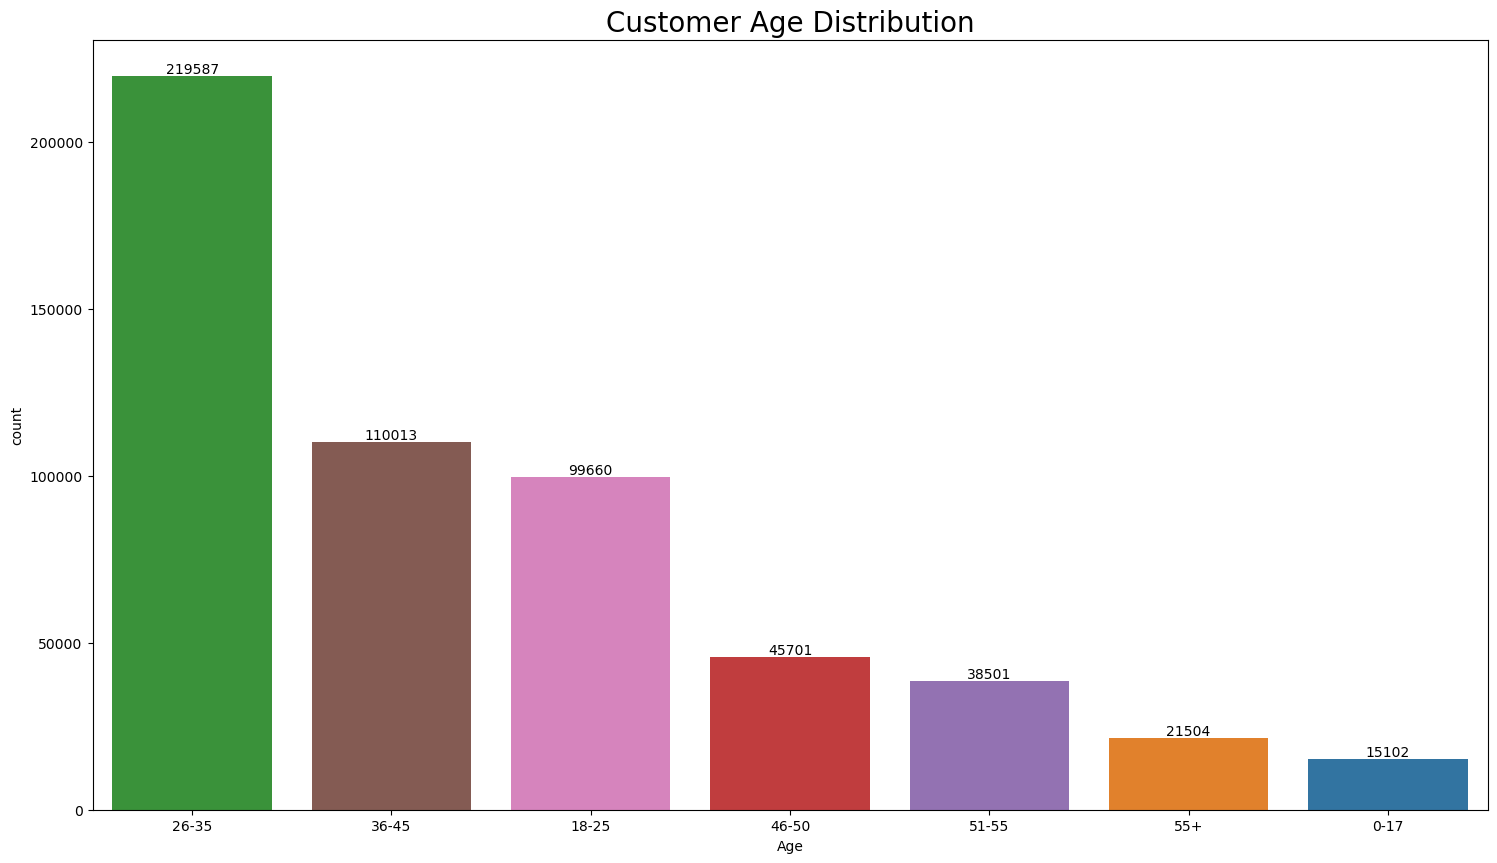

In [147]:
plt.figure(figsize=(18,10))
bar = sns.countplot(data = df , x = "Age",hue = "Age",order = df["Age"].value_counts().index, palette = colors)
add_labels(bar)
plt.title("Customer Age Distribution",fontsize = 20)
plt.show()

In [148]:
print(round(df["Age"].value_counts(normalize = "index"),2))

Age
26-35    0.40
36-45    0.20
18-25    0.18
46-50    0.08
51-55    0.07
55+      0.04
0-17     0.03
Name: proportion, dtype: float64


#### **Insights:**
- The 26-35 age group dominates Walmart's sales with 40%, indicating strong engagement from young and middle-aged adults, who are likely to seek out deals during sales events.

- The lower proportions of the 46-50 (8%), 51-55 (7%), 55+ (4%), and 0-17 (3%) segments suggest a need for targeted marketing strategies and tailored product offerings to enhance appeal among older customers and families with children.

### **3. Occupation Distribution**

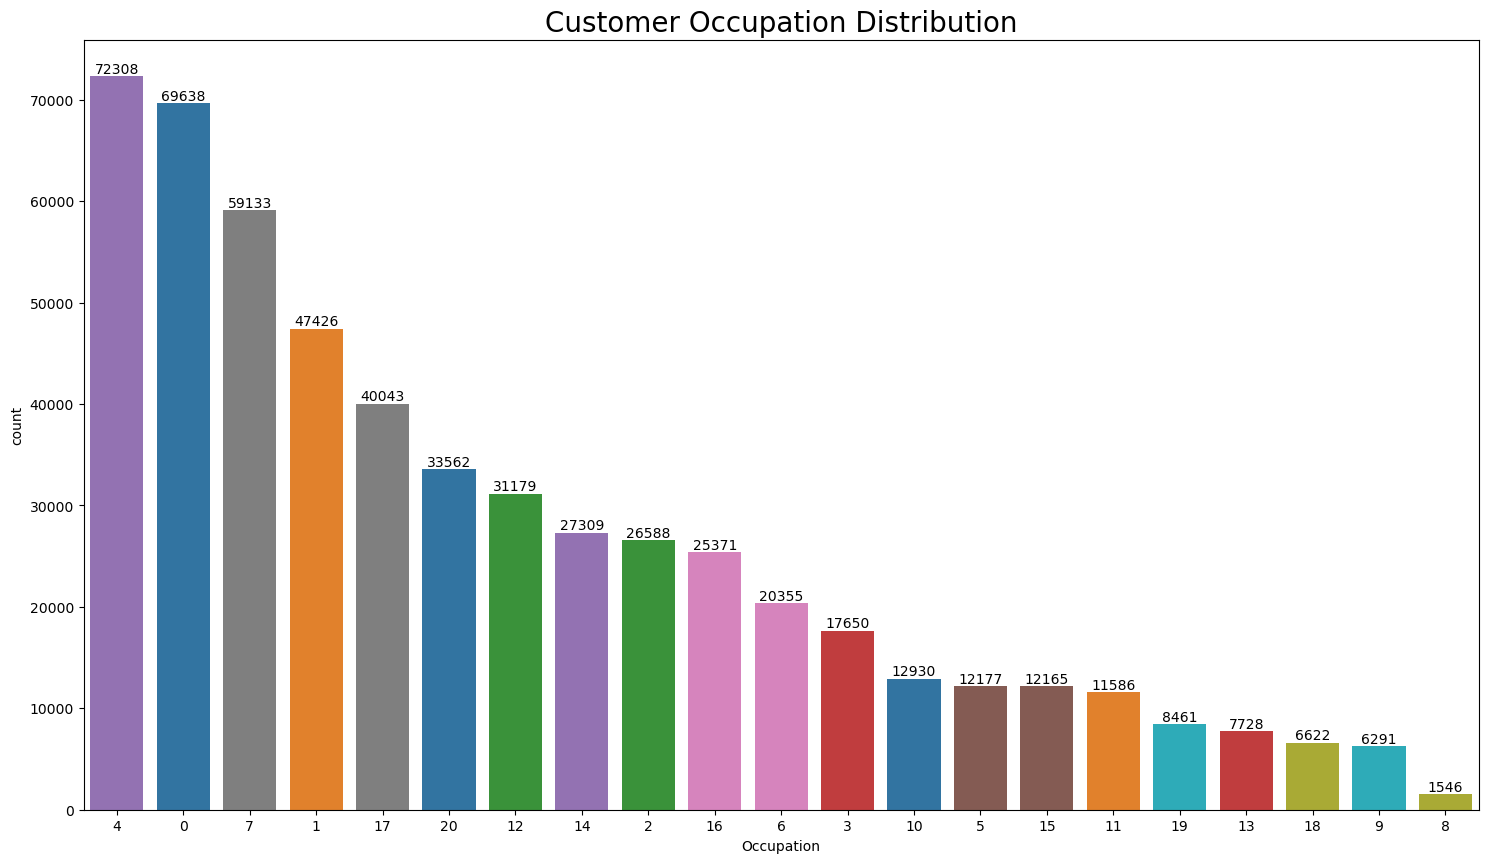

In [149]:
plt.figure(figsize=(18,10))
bar = sns.countplot(data = df , x = "Occupation",hue = "Occupation",order = df["Occupation"].value_counts().index, palette = colors, legend = False)
add_labels(bar)
plt.title("Customer Occupation Distribution",fontsize = 20)
plt.show()

In [150]:
print(round(df["Occupation"].value_counts(normalize = "index"),3))

Occupation
4     0.131
0     0.127
7     0.108
1     0.086
17    0.073
20    0.061
12    0.057
14    0.050
2     0.048
16    0.046
6     0.037
3     0.032
10    0.024
5     0.022
15    0.022
11    0.021
19    0.015
13    0.014
18    0.012
9     0.011
8     0.003
Name: proportion, dtype: float64


#### **Insights:**
- Customers belonging to Occupation categories 4, 0, and 7 collectively represent around 37% of total purchases, highlighting a significant affinity for Walmart's offerings among these groups. 
- This suggests that individuals in these occupations are likely to prioritize value and convenience, making them key targets for future marketing strategies.

### **4. Stay_In_Current_City_Years Distribution**

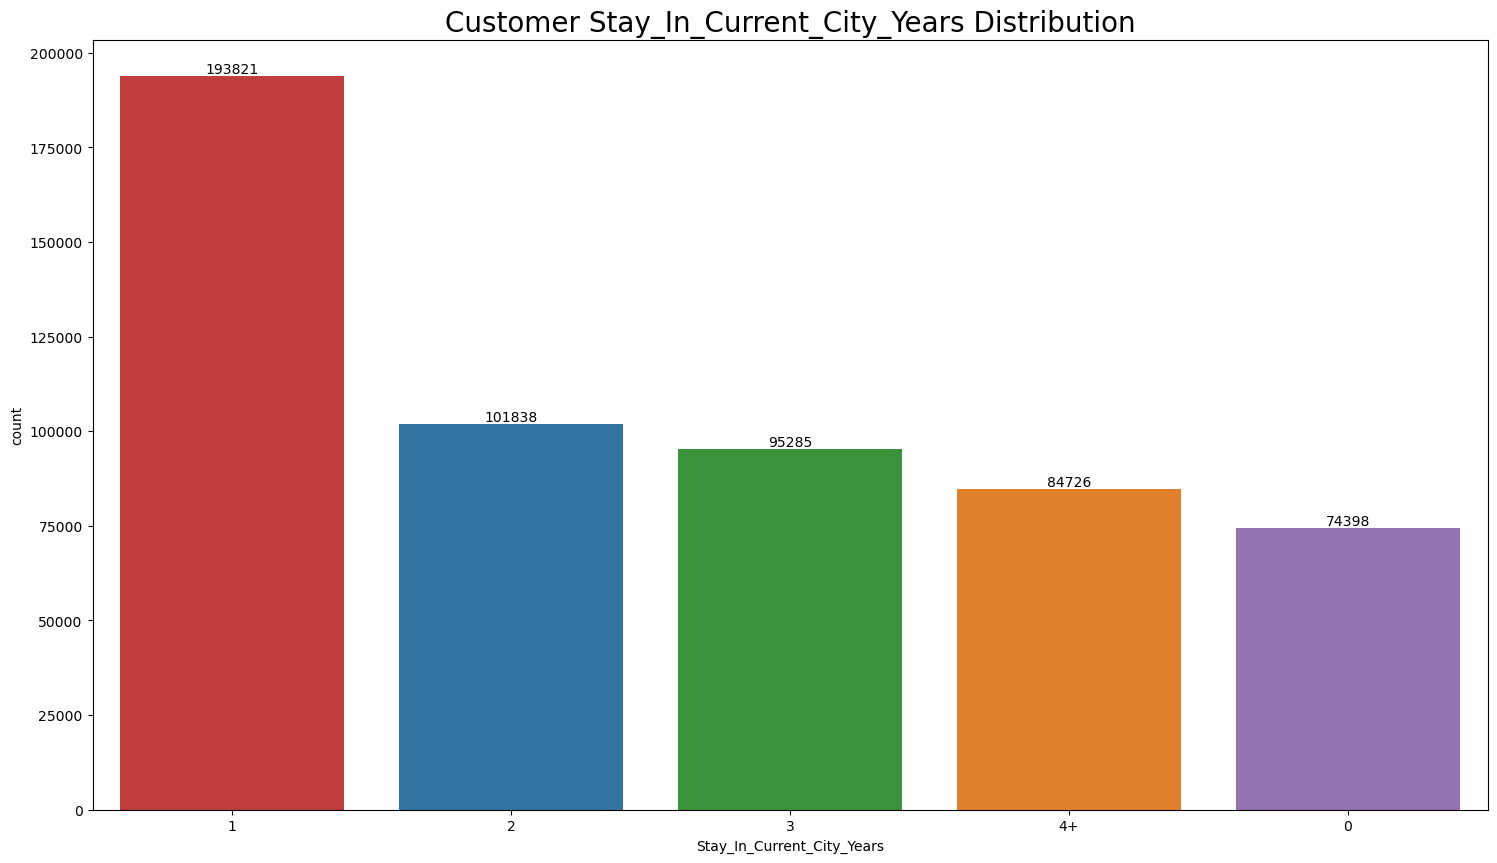

In [151]:
plt.figure(figsize=(18,10))
bar = sns.countplot(data = df , x = "Stay_In_Current_City_Years",hue = "Stay_In_Current_City_Years",order = df["Stay_In_Current_City_Years"].value_counts().index, palette = colors, legend = False)
add_labels(bar)
plt.title("Customer Stay_In_Current_City_Years Distribution",fontsize = 20)
plt.show()

In [152]:
print(round(df["Stay_In_Current_City_Years"].value_counts(normalize = "index"),2))

Stay_In_Current_City_Years
1     0.35
2     0.19
3     0.17
4+    0.15
0     0.14
Name: proportion, dtype: float64


#### **Insights:**
- The majority of customers (35%) have stayed in their current city for 1 year, indicating a transient population that may be more likely to seek convenience and value in their shopping choices.

- With 19% of customers residing for 2 years and 17% for 3 years, Walmart should consider tailoring marketing efforts to enhance loyalty among longer-term residents while also addressing the needs of newer customers.

### **5. Product_Category Distribution**

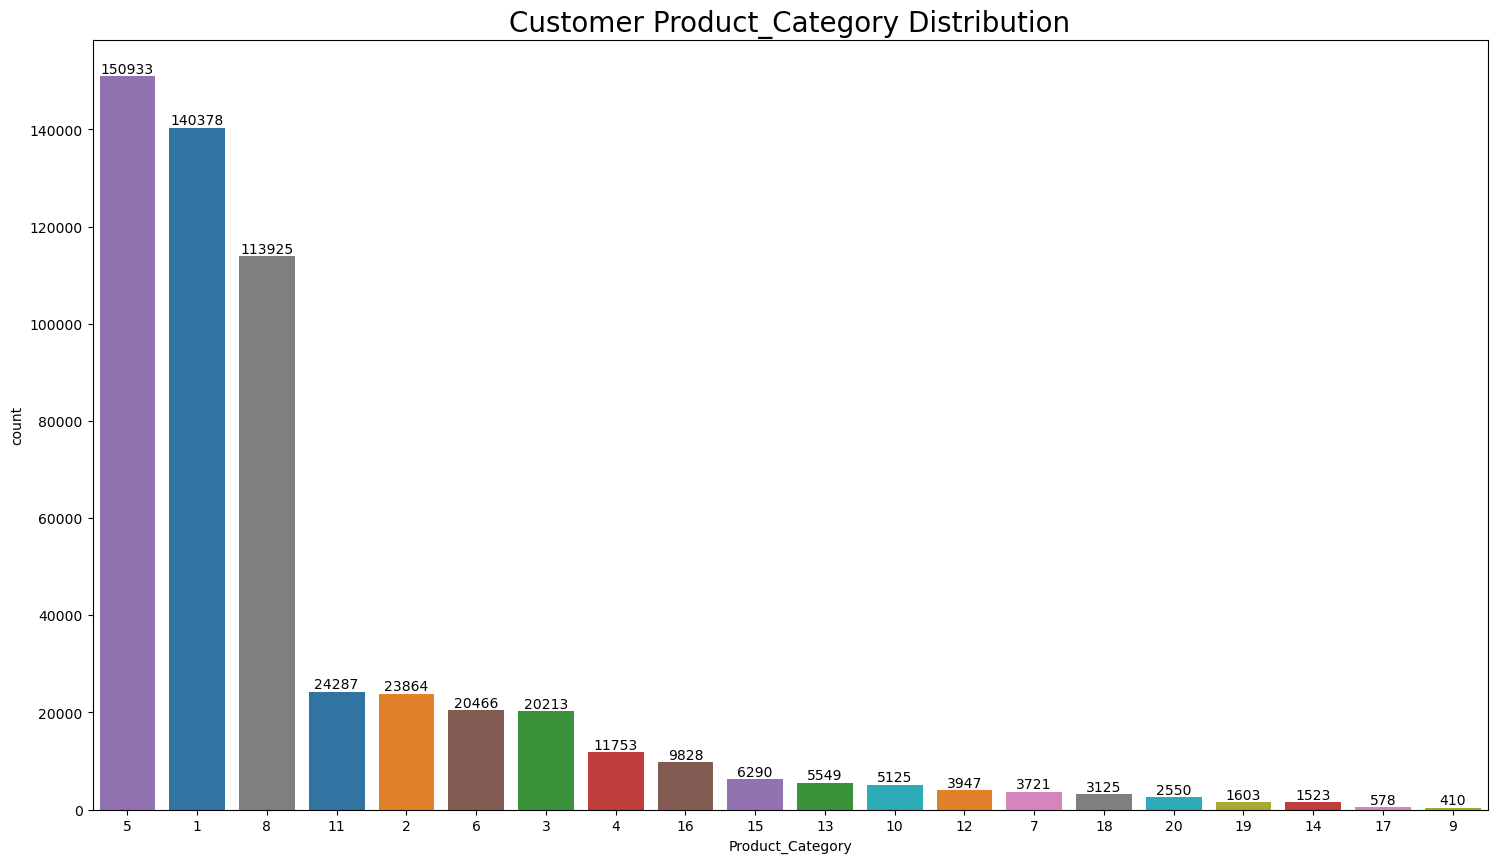

In [153]:
plt.figure(figsize=(18,10))
bar = sns.countplot(data = df , x = "Product_Category",hue = "Product_Category",order = df["Product_Category"].value_counts().index, palette = colors, legend = False)
add_labels(bar)
plt.title("Customer Product_Category Distribution",fontsize = 20)
plt.show()

In [154]:
print(round(df["Product_Category"].value_counts(normalize = "index"),2))

Product_Category
5     0.27
1     0.26
8     0.21
11    0.04
2     0.04
6     0.04
3     0.04
4     0.02
16    0.02
15    0.01
13    0.01
10    0.01
12    0.01
7     0.01
18    0.01
20    0.00
19    0.00
14    0.00
17    0.00
9     0.00
Name: proportion, dtype: float64


#### **Insights:**
- Categories 5, 1, and 8 dominate the sales landscape, making up nearly 75% of total purchases, indicating a clear consumer preference for these items and highlighting an opportunity for Walmart to strategically enhance promotions and stock levels in these areas.

### **6. Purchase Distribution**

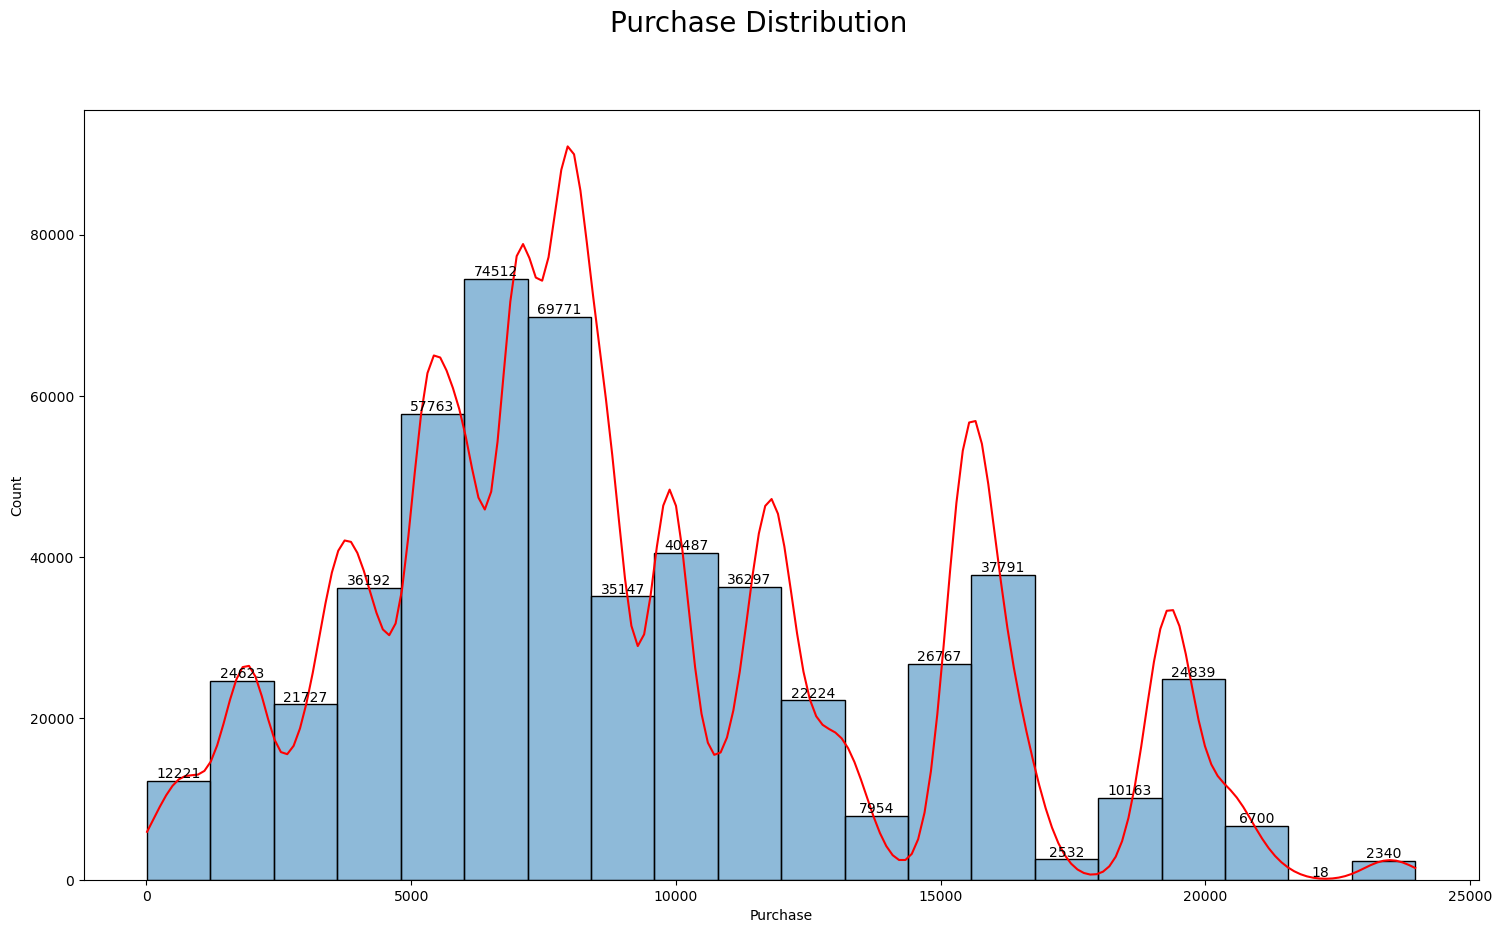

In [155]:
plt.figure(figsize=(18,10))
bar = sns.histplot(data = df , x = "Purchase",bins = 20,kde = True)
bar.lines[0].set_color("red")
add_labels(bar)
plt.suptitle("Purchase Distribution",fontsize = 20)
plt.show()

# **Bivariate Analysis**

### **1. Analysis based on Purchase with the other columns**

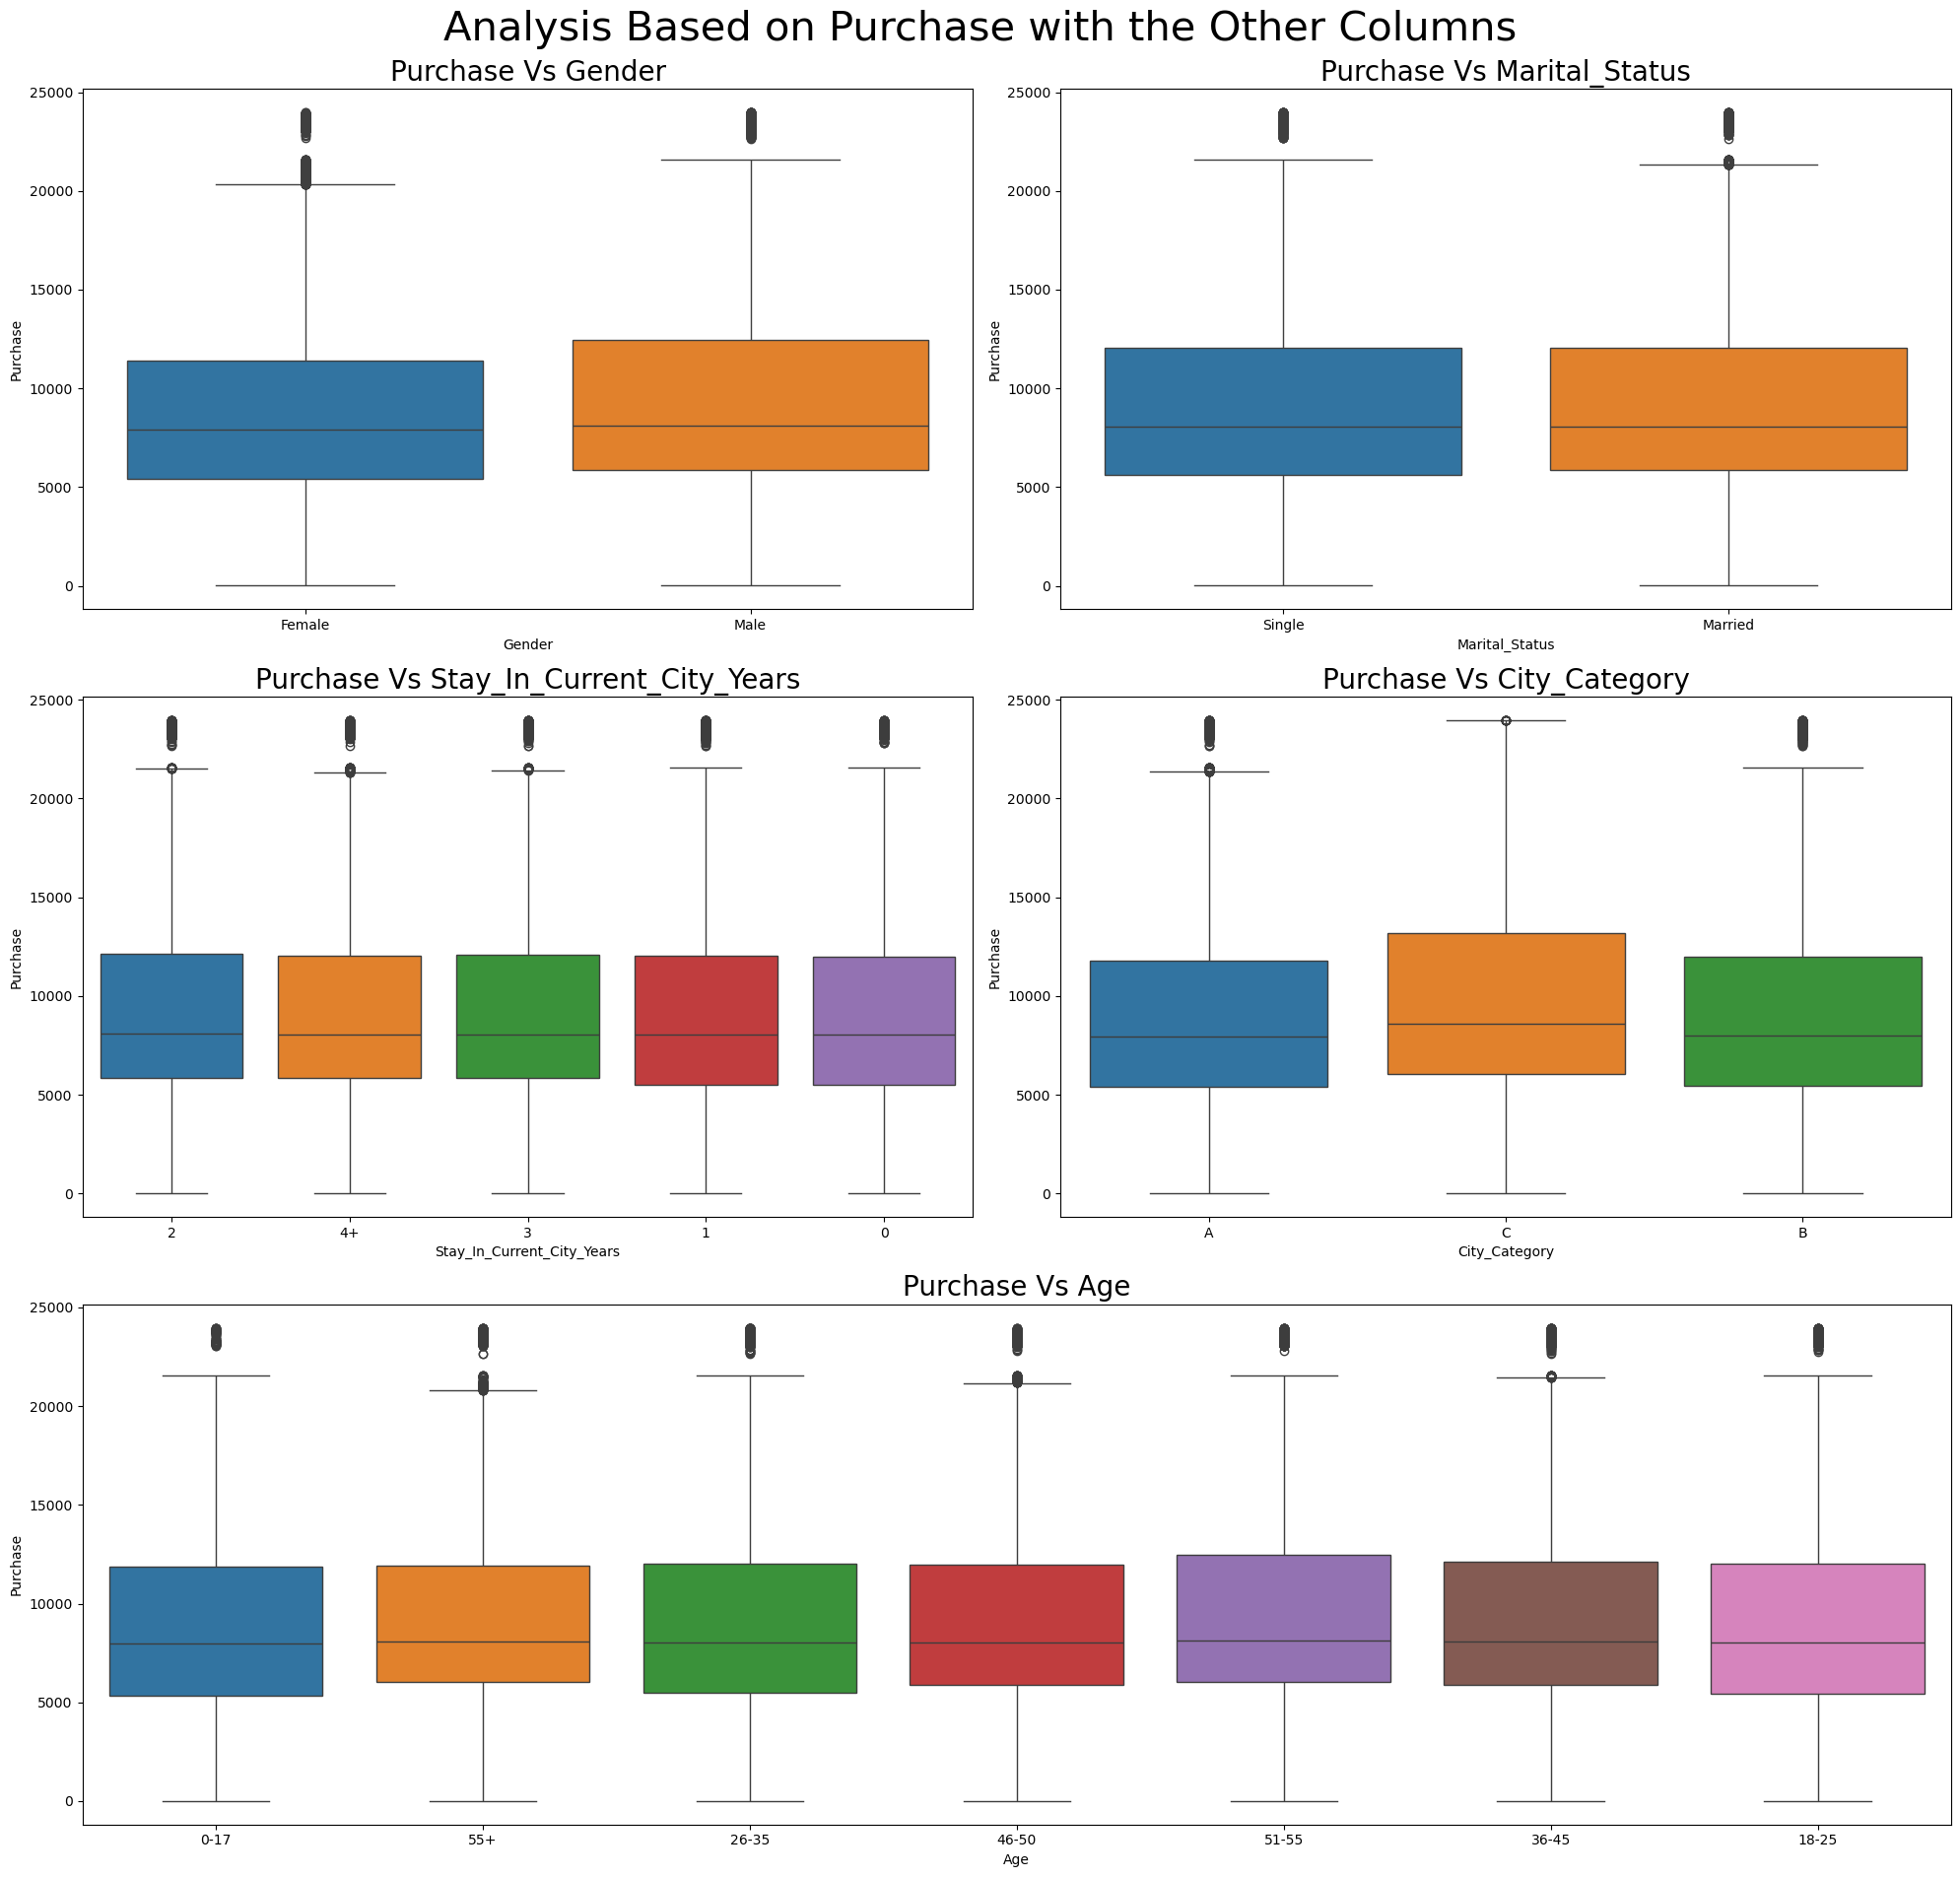

In [156]:
col = ["Gender","Marital_Status","Stay_In_Current_City_Years","City_Category"]
plt.figure(figsize = (20,20))
for i , j in enumerate(col):
  plt.subplot(3,2,i+1)
  sns.boxplot(data = df , x = j , y = "Purchase" ,palette = colors)
  plt.title(f"Purchase Vs {j}",fontsize = 20)

plt.subplot(3,1,3)
sns.boxplot(data = df , x = "Age" , y = "Purchase",palette = colors)
plt.title("Purchase Vs Age", fontsize = 20)
plt.suptitle("Analysis Based on Purchase with the Other Columns",fontsize = 30)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99])
plt.show()

#### **Insights:**

- Across gender, marital status, and city categories, the median purchase amount remains consistently similar, with no significant differences observed.

- The duration of stay in the current city does not appear to influence purchase behavior significantly, as median spending is stable across different lengths of residence.

- Age groups also show a consistent median purchase amount, suggesting that customer spending habits are relatively uniform across different age demographics.

### **2. Spending Based on Gender**

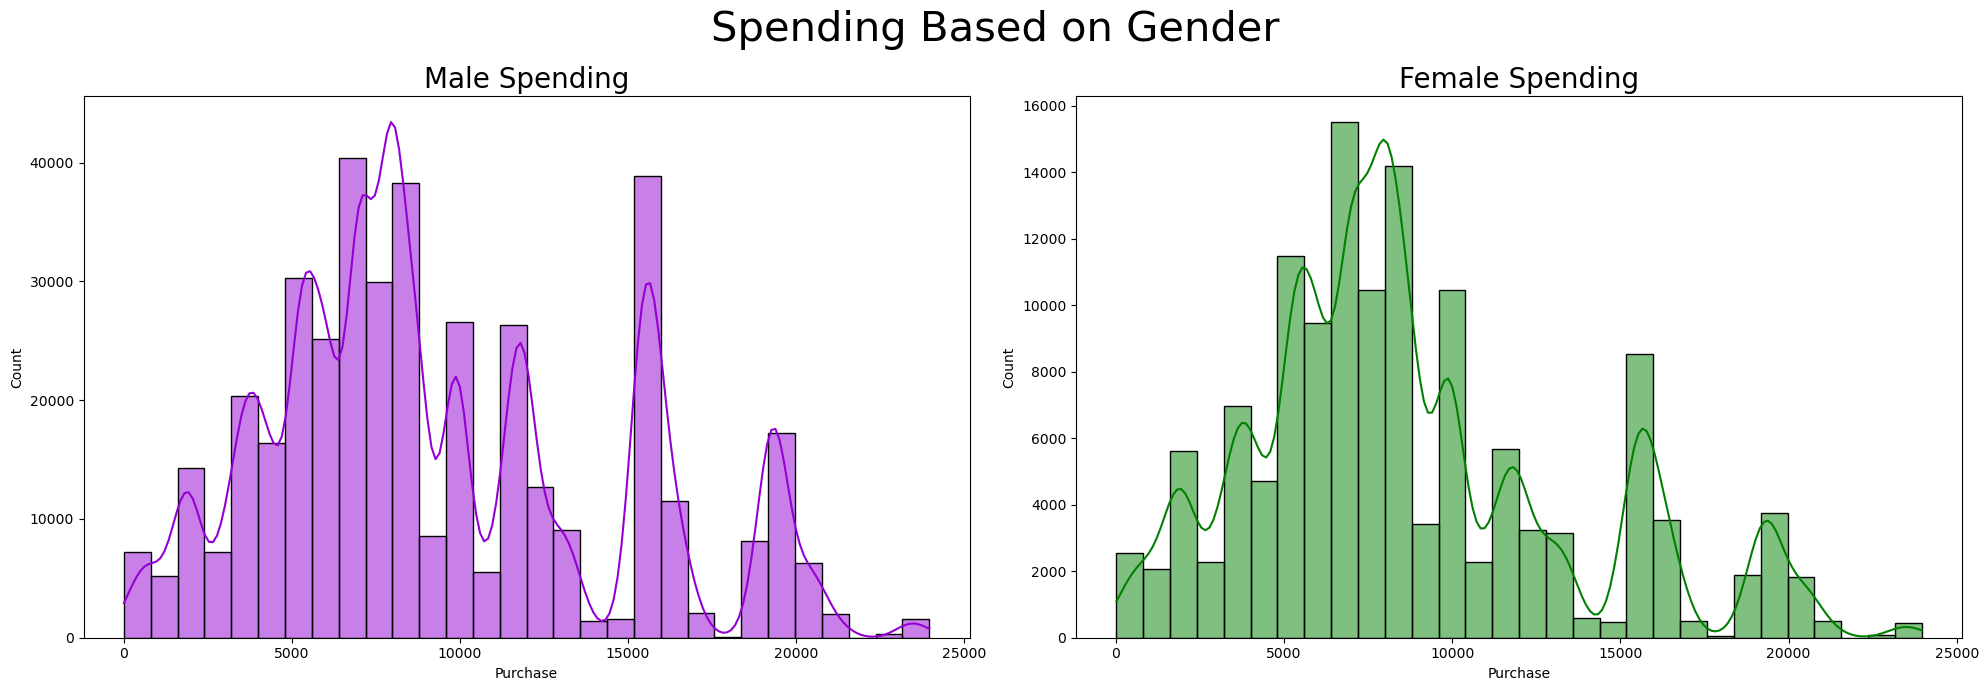

In [157]:
plt.figure(figsize= (20,7))
plt.subplot(1,2,1)
sns.histplot(data = df[df['Gender'] == 'Male']['Purchase'], color= "darkviolet", bins= 30, kde= True)
plt.title("Male Spending",fontsize = 20)

plt.subplot(1,2,2)
sns.histplot(data = df[df['Gender'] == 'Female']['Purchase'], color= "Green", bins= 30, kde= True)
plt.title("Female Spending",fontsize = 20)
plt.suptitle("Spending Based on Gender",fontsize = 30)
plt.tight_layout()
plt.show()

### **3. Spending Based on Marital_Status**

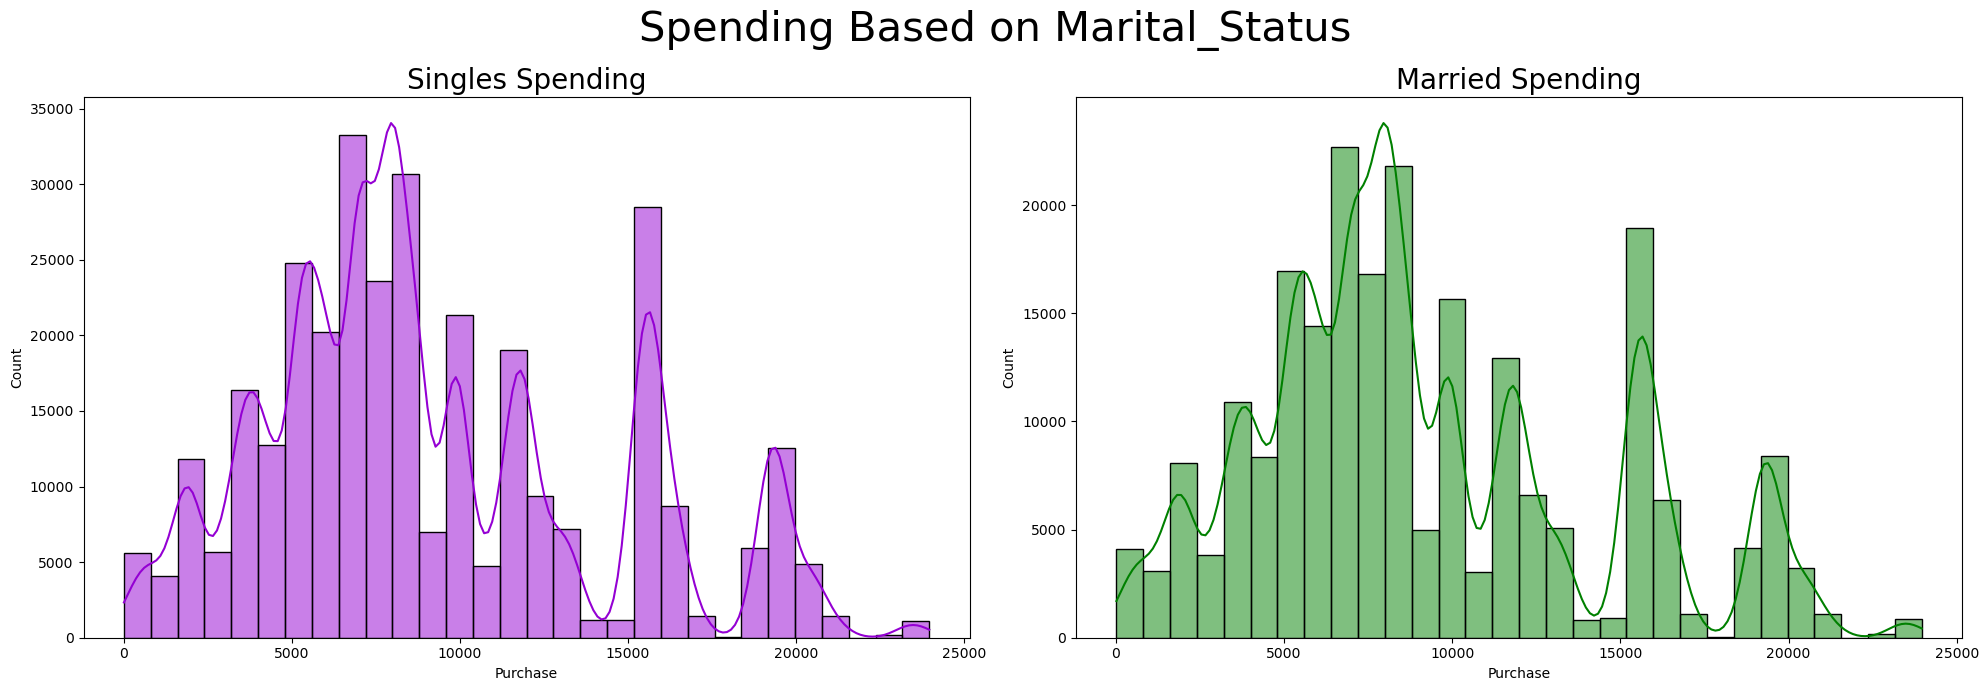

In [158]:
plt.figure(figsize= (20,7))
plt.subplot(1,2,1)
sns.histplot(data = df[df['Marital_Status'] == 'Single']['Purchase'], color= "darkviolet", bins= 30, kde= True)
plt.title("Singles Spending",fontsize = 20)

plt.subplot(1,2,2)
sns.histplot(data = df[df['Marital_Status'] == 'Married']['Purchase'], color= "Green", bins= 30, kde= True)
plt.title("Married Spending",fontsize = 20)
plt.suptitle("Spending Based on Marital_Status",fontsize = 30)
plt.tight_layout()
plt.show()

### **4. Product_Category Based on Gender**

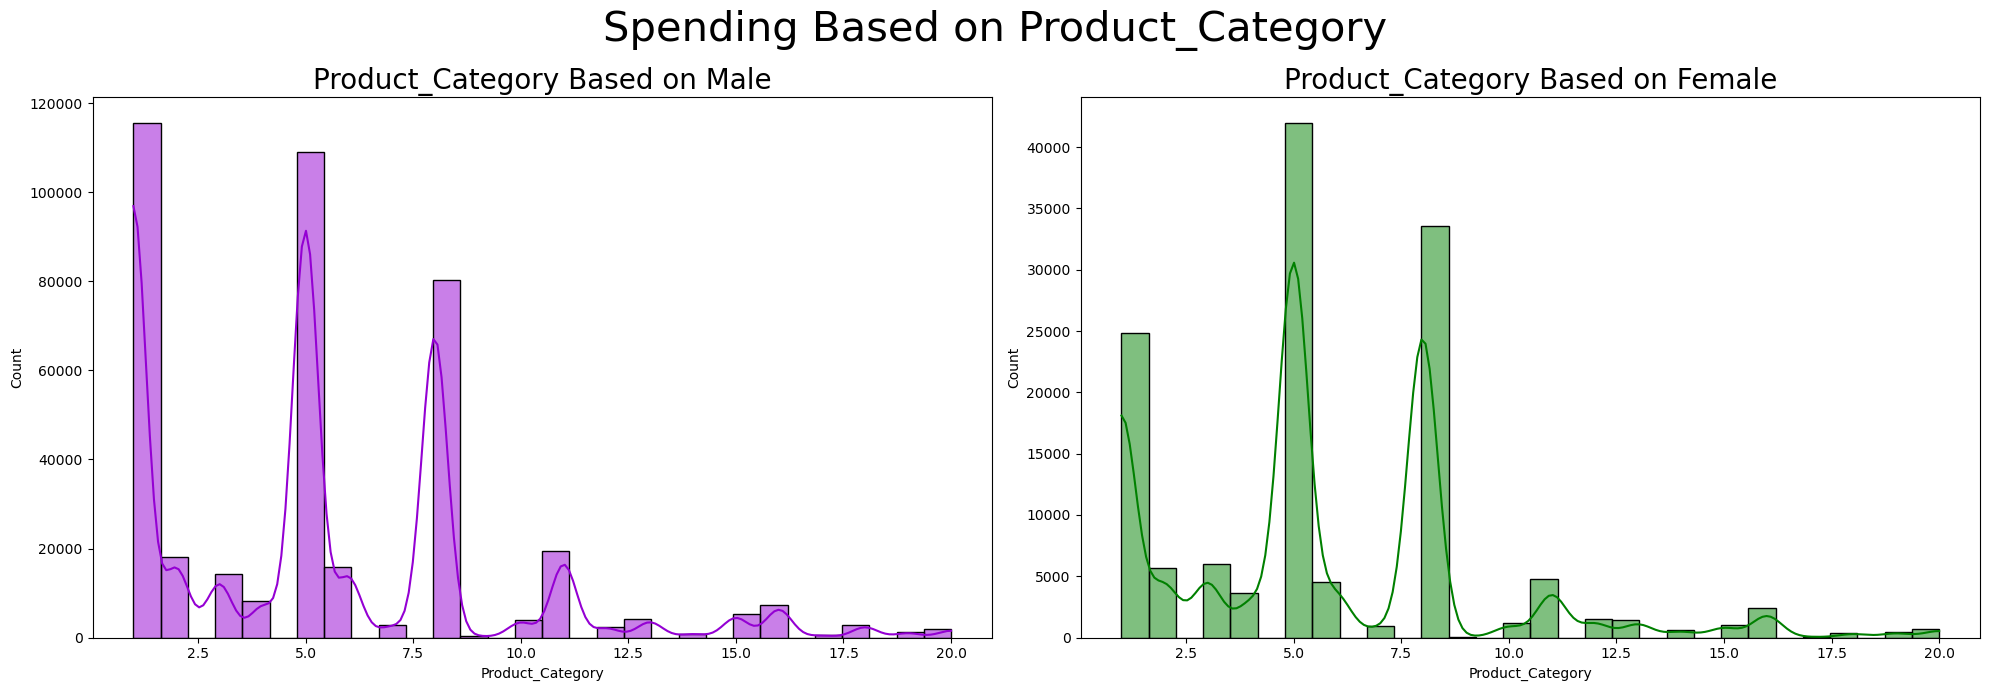

In [159]:
plt.figure(figsize= (20,7))
plt.subplot(1,2,1)
sns.histplot(data = df[df['Gender'] == 'Male']['Product_Category'], color= "darkviolet", bins= 30, kde= True)
plt.title("Product_Category Based on Male",fontsize = 20)

plt.subplot(1,2,2)
sns.histplot(data = df[df['Gender'] == 'Female']['Product_Category'], color= "Green", bins= 30, kde= True)
plt.title("Product_Category Based on Female",fontsize = 20)
plt.suptitle("Spending Based on Product_Category",fontsize = 30)
plt.tight_layout()
plt.show()

### **5. Product_Category Based on Marital Status**

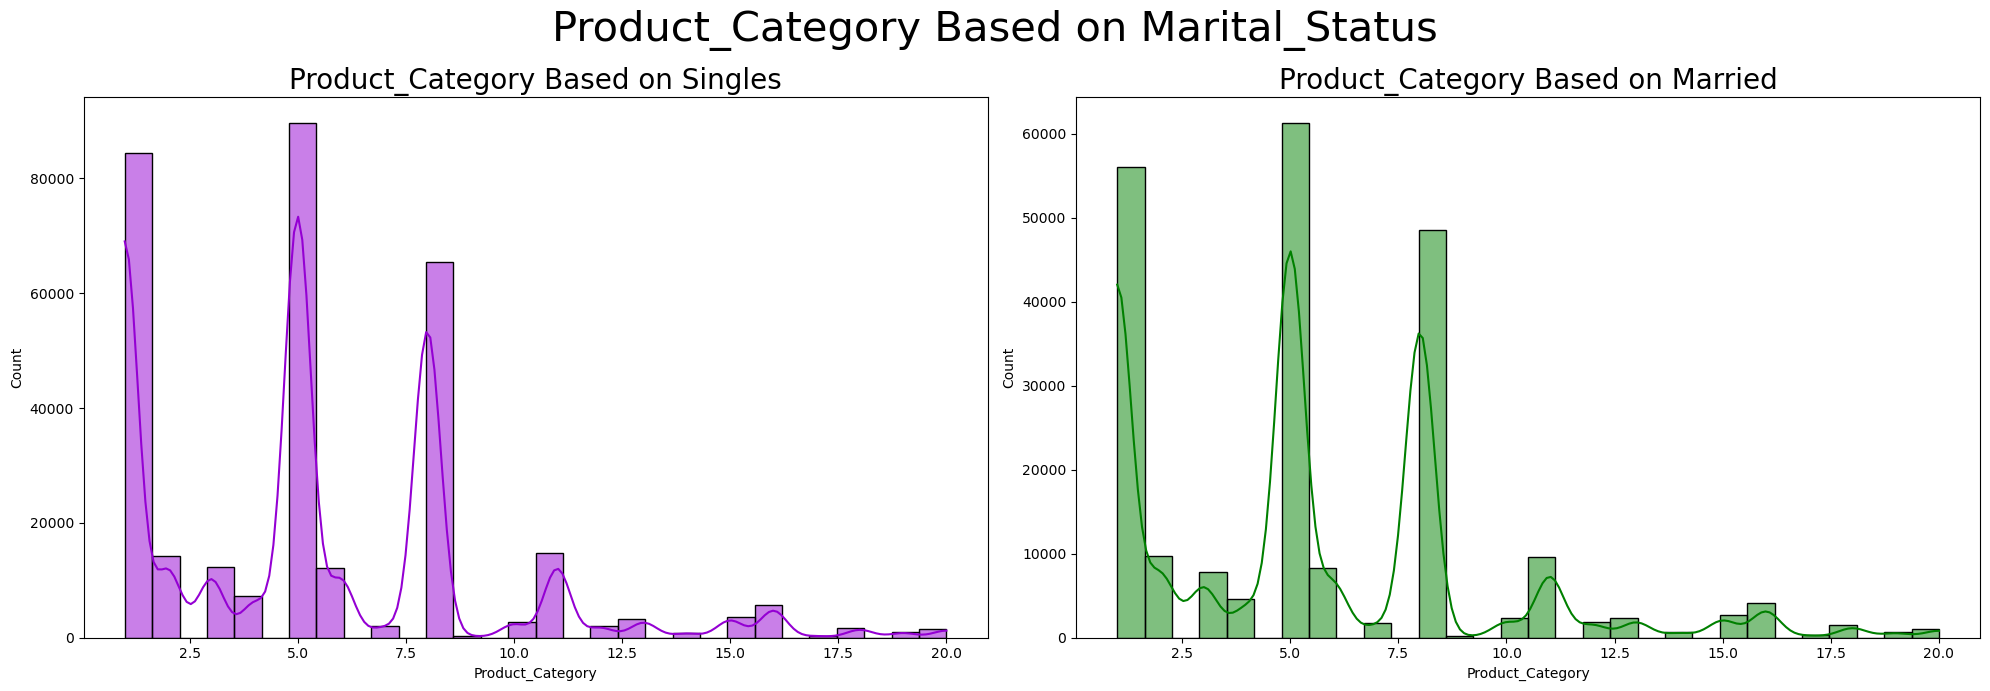

In [160]:
plt.figure(figsize= (20,7))
plt.subplot(1,2,1)
sns.histplot(data = df[df['Marital_Status'] == 'Single']['Product_Category'], color= "darkviolet", bins= 30, kde= True)
plt.title("Product_Category Based on Singles",fontsize = 20)

plt.subplot(1,2,2)
sns.histplot(data = df[df['Marital_Status'] == 'Married']['Product_Category'], color= "Green", bins= 30, kde= True)
plt.title("Product_Category Based on Married",fontsize = 20)
plt.suptitle("Product_Category Based on Marital_Status",fontsize = 30)
plt.tight_layout()
plt.show()

# **Multivariate Analysis**

#### **1. Analysis Based on Purchase & Gender with the other columns**

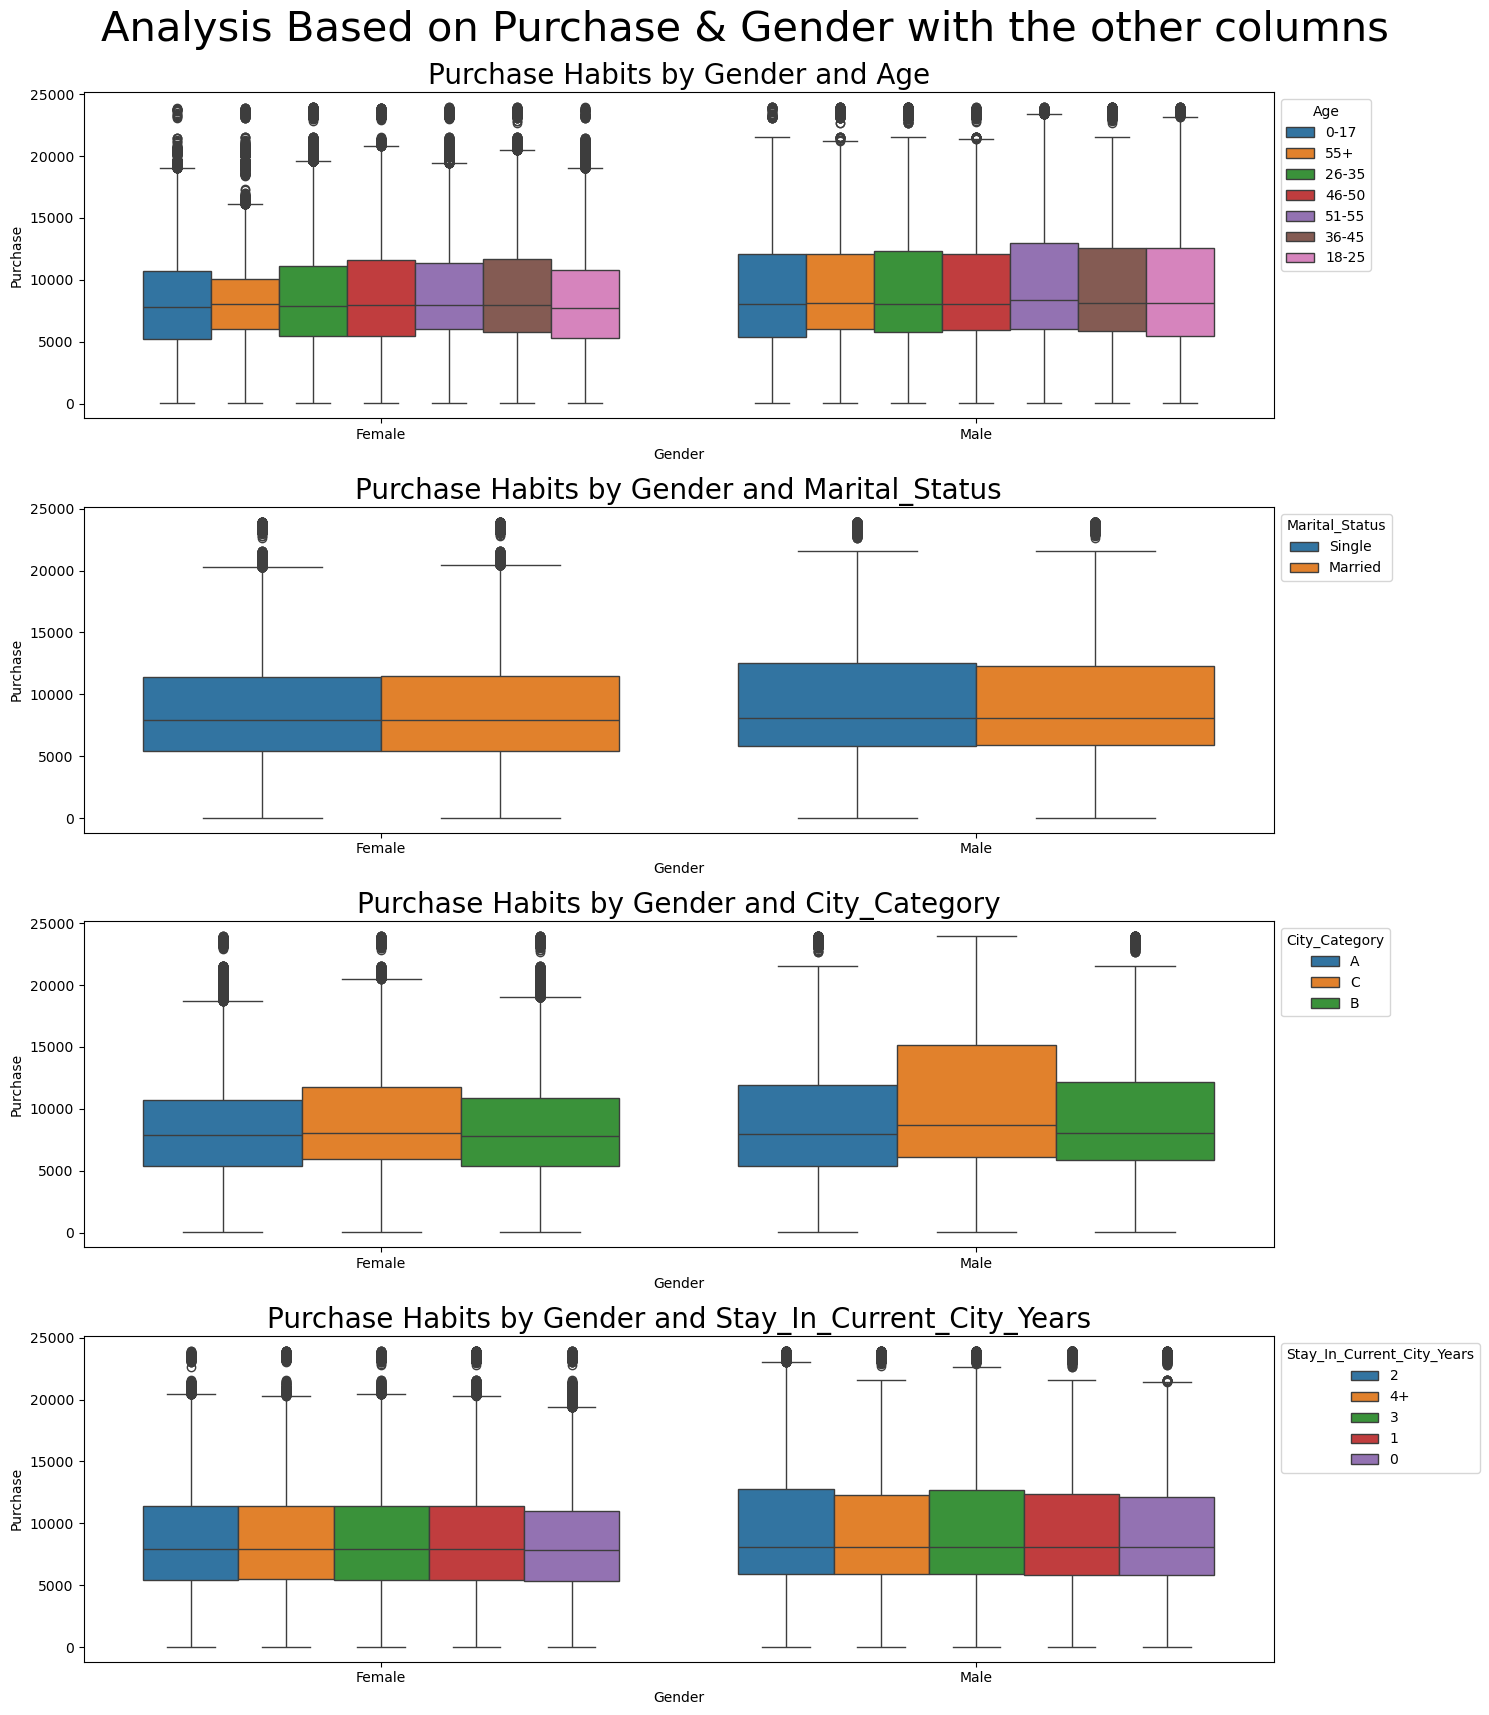

In [161]:
col = ["Age","Marital_Status","City_Category","Stay_In_Current_City_Years"]
plt.figure(figsize = (15,18))
for i , j in enumerate(col):
  plt.subplot(4,1,i+1)
  sns.boxplot(data = df , x = "Gender" , y = "Purchase",hue = j,palette = colors)
  plt.title(f"Purchase Habits by Gender and {j}",fontsize = 20)
  plt.legend(bbox_to_anchor=(1, 1), loc="upper left",title = j)
plt.suptitle("Analysis Based on Purchase & Gender with the other columns",fontsize = 30)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99])
plt.show()


#### **Insights:**

- Median spending values are lowest for females aged 18-25, while they increase with age, peaking in the 51-55 age group.
- City category C shows the highest median spending for both females and males, surpassing cities A and B.
- Female spending is slightly lower for those who have lived in their residence for 3 or 0 years, with no significant difference observed in male spending.

### **2.Analysis Based on Purchase & Marital_Status with the other columns**

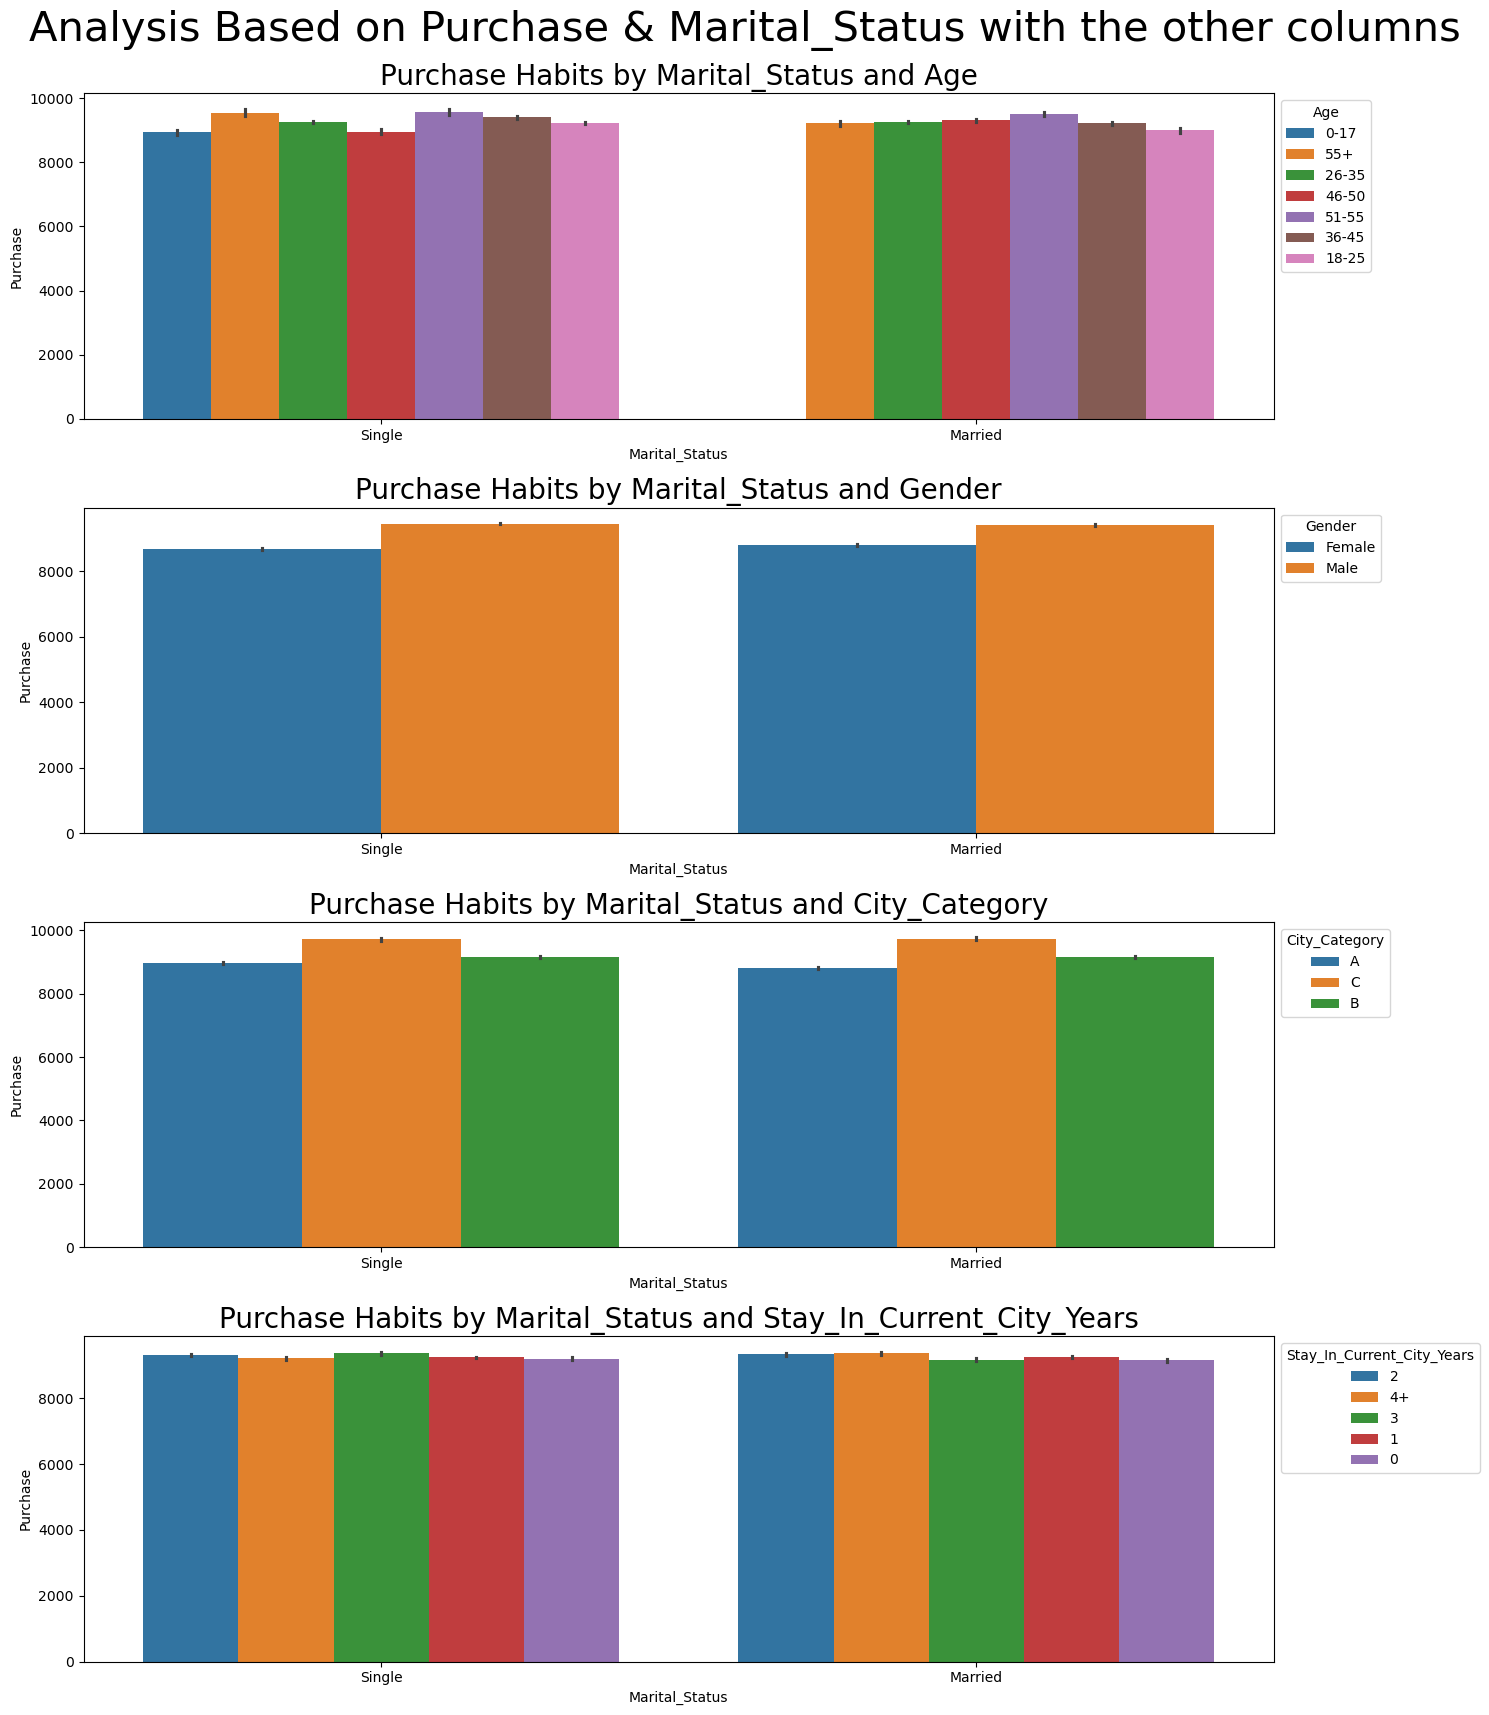

In [162]:
col = ["Age","Gender","City_Category","Stay_In_Current_City_Years"]
plt.figure(figsize = (15,18))
for i , j in enumerate(col):
  plt.subplot(4,1,i+1)
  sns.barplot(data = df , x = "Marital_Status" , y = "Purchase",hue = j,palette = colors)
  plt.title(f"Purchase Habits by Marital_Status and {j}",fontsize = 20)
  plt.legend(bbox_to_anchor=(1, 1), loc="upper left",title = j)
plt.suptitle("Analysis Based on Purchase & Marital_Status with the other columns",fontsize = 30)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99])
plt.show()


### **3.Analysis Based on Purchase & Gender with the other columns**

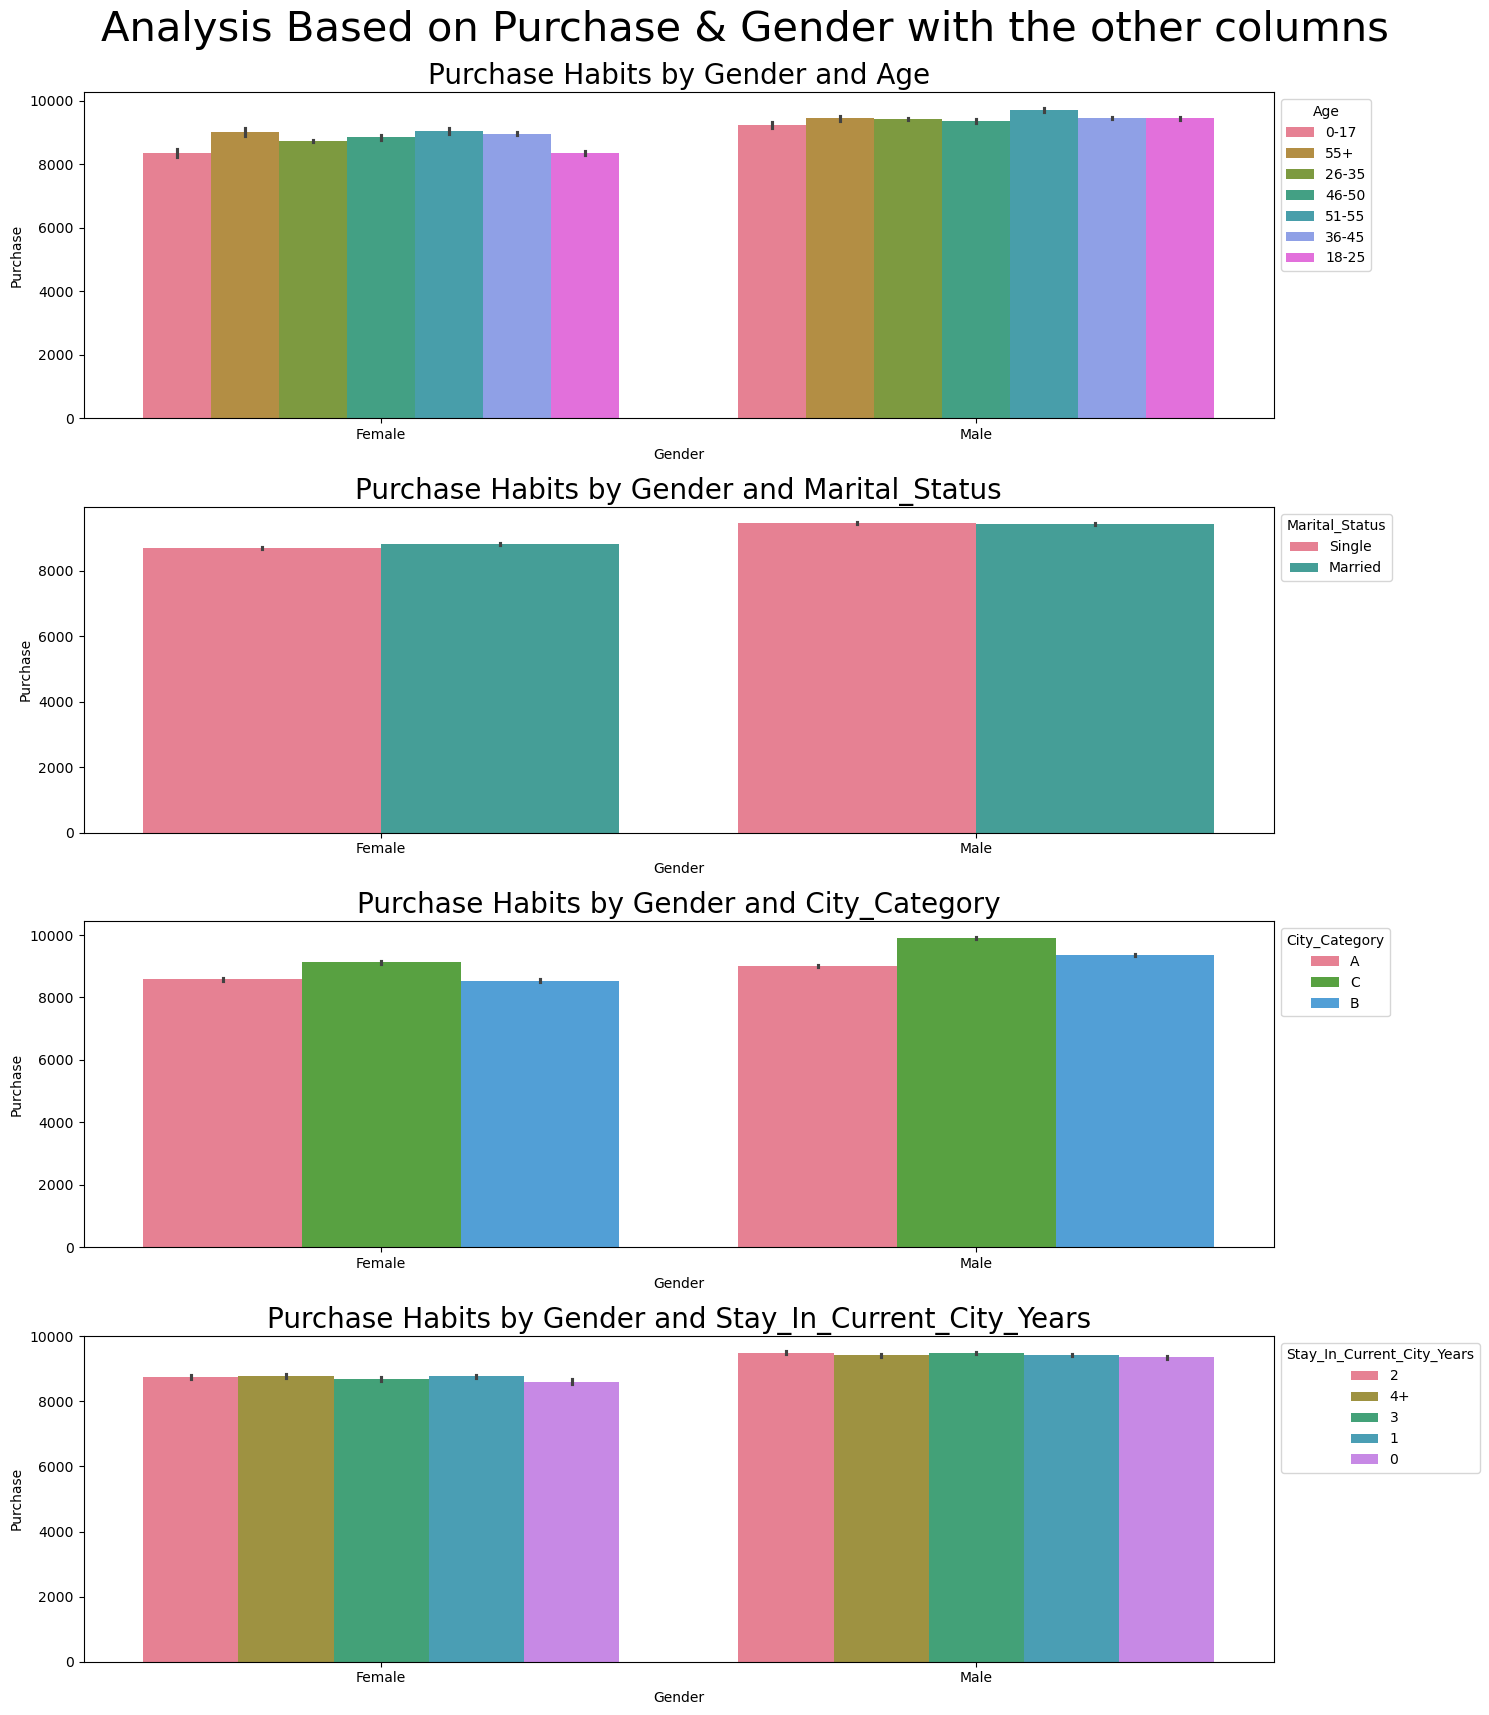

In [163]:
col = ["Age","Marital_Status","City_Category","Stay_In_Current_City_Years"]
plt.figure(figsize = (15,18))
for i , j in enumerate(col):
  plt.subplot(4,1,i+1)
  sns.barplot(data = df , x = "Gender" , y = "Purchase",hue = j,palette = "husl")
  plt.title(f"Purchase Habits by Gender and {j}",fontsize = 20)
  plt.legend(bbox_to_anchor=(1, 1), loc="upper left",title = j)
plt.suptitle("Analysis Based on Purchase & Gender with the other columns",fontsize = 30)
plt.tight_layout(rect=[0.0, 0.03, 1, 0.99])
plt.show()


# **Pair Plot**

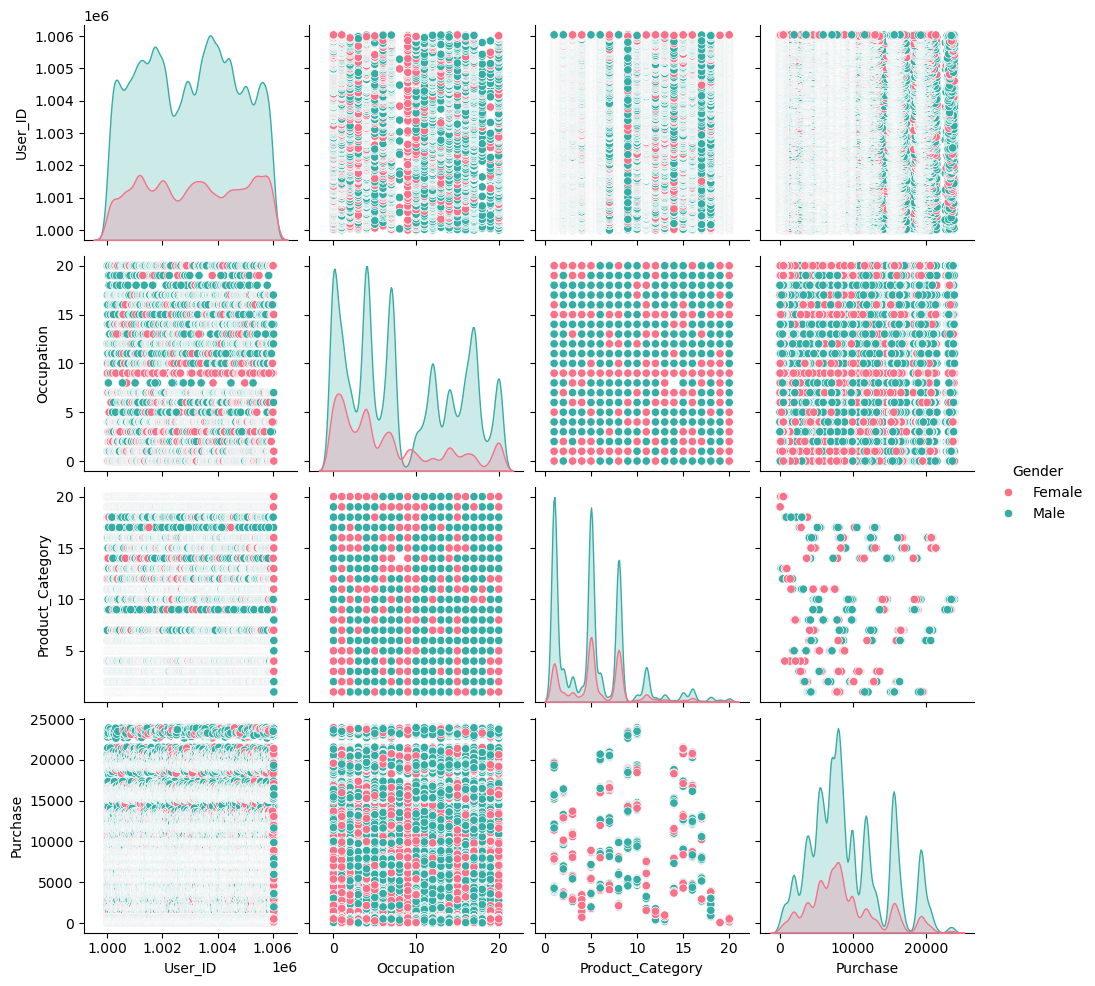

In [164]:
sns.pairplot(df, hue = "Gender", palette= "husl")
plt.show()

# **Are women spending more money per transaction than men?** 

In [165]:
male = df.loc[df["Gender"] == "Male"]["Purchase"]
female = df.loc[df["Gender"] == "Female"]["Purchase"]

In [166]:
male_spending = male.sum()
print(f"Total Male Spending = {male_spending}")
male_customer = male.count()
print(f"Total Male Customer = {male_customer}")
average_male_spending = round((male_spending/male_customer),2)
print(f"Average Male Spending = {average_male_spending}")


Total Male Spending = 3909580100
Total Male Customer = 414259
Average Male Spending = 9437.53


In [167]:
female_spending = female.sum()
print(f"Total Female Spending = {female_spending}")
female_customer = female.count()
print(f"Total Female Customer = {female_customer}")
average_female_spending = round((female_spending/female_customer),2)
print(f"Average Female Spending = {average_female_spending}")

Total Female Spending = 1186232642
Total Female Customer = 135809
Average Female Spending = 8734.57


#### **Insight:**
- We found that **Average Spending Amount of Male(9437.53)** is **Greater than Average Spending Amount of Female(8734.57)**


# **CLT - CENTRAL LIMIT THEOREM**

## **1. Purchase Vs Gender**

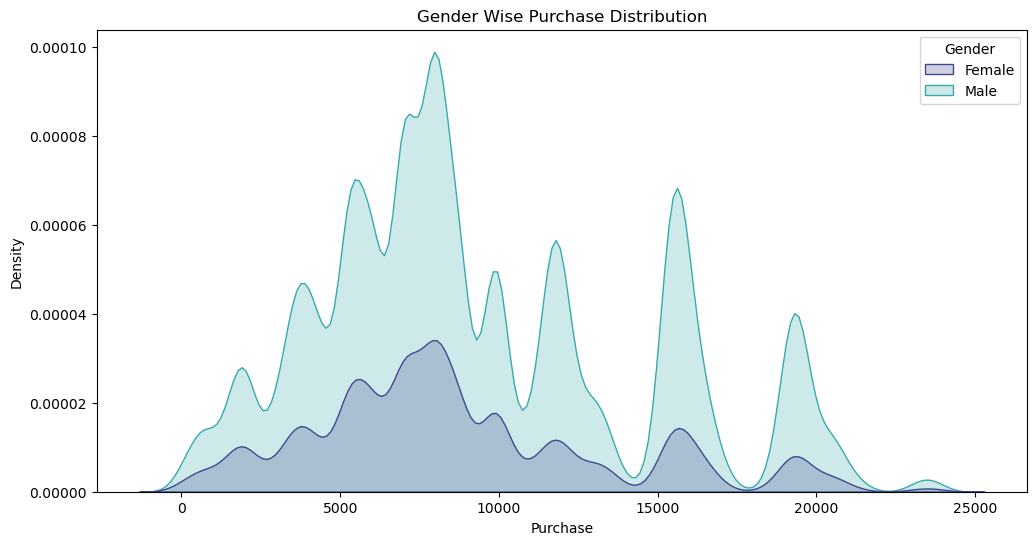

In [168]:
plt.figure(figsize = (12,6))
sns.kdeplot(data = df ,x = "Purchase",hue = "Gender",fill = True, palette= "mako")
plt.title("Gender Wise Purchase Distribution")
plt.show()

- Purchase amount is Not normally distrubuted between genders

In [169]:
df.groupby("Gender")["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
Female  135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
Male    414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
Female  23959.0  
Male    23961.0

In [170]:
male_std = round(male.std(),2)
female_std = round(female.std(),2)
print(f"Standard Deviation of Male Customers = {male_std}")
print(f"Standard Deviation of Female Customers = {female_std}")

Standard Deviation of Male Customers = 5092.19
Standard Deviation of Female Customers = 4767.23


- Males also exhibit greater variability in spending, with a higher standard deviation (5092.19) than females (4767.23).

In [171]:
sample_size = [300 , 3000 , 30000]
num_sample = 1000

Gender = []
Sample_size = []
Lower_limit = []
Upper_limit = []
Sample_mean = []
CI = []

In [172]:
def clt(ci):
  ci = ci/100
  plt.figure(figsize = (16,20))
  for i,j in enumerate(sample_size):
    plt.subplot(3,1,i+1)



    male_sample = [np.mean(male.sample(j)) for k in range(num_sample)]
    male_sample_mean = np.mean(male_sample).round(2)
    male_se = male_std/np.sqrt(j)
    male_se = male_se.round(2)
    lower_limit_male , upper_limit_male = norm.interval(ci,loc = male_sample_mean,scale = male_se)
    lower_limit_male = lower_limit_male.round(2)
    upper_limit_male = upper_limit_male.round(2)


    Gender.append("Male")
    Sample_size.append(j)
    Lower_limit.append(lower_limit_male)
    Upper_limit.append(upper_limit_male)
    CI.append(ci*100)
    Sample_mean.append(male_sample_mean)



    label_mean_male = (f"Male Sample Mean = {male_sample_mean}")
    label_lower_limit_male = (f"Lower Limit (MALE) {lower_limit_male}")
    label_upper_limit_male = (f"Upper Limit (MALE) {upper_limit_male}")
    plt.axvline(male_sample_mean,color = "green", linestyle = "solid",linewidth = 2,label = label_mean_male )
    plt.axvline(lower_limit_male,color = "green", linestyle = "dashdot",linewidth = 2, label = label_lower_limit_male )
    plt.axvline(upper_limit_male,color = "green", linestyle = "dashdot",linewidth = 2, label = label_upper_limit_male )
    plt.legend(loc = "upper right")
    print(f"For Sample Size {j} confidence interval of Male means: ({lower_limit_male}, {upper_limit_male})")


    female_sample = [np.mean(female.sample(j)) for k in range(num_sample)]
    female_sample_mean = np.mean(female_sample).round(2)
    female_se = female_std/np.sqrt(j)
    female_se = female_se.round(2)
    lower_limit_female , upper_limit_female = norm.interval(ci,loc = female_sample_mean,scale = female_se )
    upper_limit_female = upper_limit_female.round(2)
    lower_limit_female = lower_limit_female.round(2)


    Gender.append("Female")
    Sample_size.append(j)
    Lower_limit.append(lower_limit_female)
    Upper_limit.append(upper_limit_female)
    CI.append(ci*100)
    Sample_mean.append(female_sample_mean)




    label_mean_female = (f"feMale Sample Mean = {female_sample_mean}")
    label_lower_limit_female = (f"Lower Limit (FEMALE) {lower_limit_female}")
    label_upper_limit_female = (f"Upper Limit (FEMALE) {upper_limit_female}")
    plt.axvline(female_sample_mean,color = "red", linestyle = "solid",linewidth = 2,label = label_mean_female )
    plt.axvline(lower_limit_female,color = "red", linestyle = "dashdot",linewidth = 2, label = label_lower_limit_female )
    plt.axvline(upper_limit_female,color = "red", linestyle = "dashdot",linewidth = 2, label = label_upper_limit_female )
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    print(f"For Sample Size {j} confidence interval of Female means: ({lower_limit_female}, {upper_limit_female})")


    sns.kdeplot(x = male_sample,fill = True, color = "grey")
    sns.kdeplot(x = female_sample,fill = True,color = "burlywood")
    plt.title(f"Sample Size = {j} , Male_Mean = {male_sample_mean} , Male_sample_SE = {male_se} , Female_mean = {female_sample_mean}, Female_sample_SE = {female_se}")

  plt.suptitle(f"{ci*100} % CONFIDENCE INTERVAL MALE Vs FEMALE PURCHASE DISTRIBUTION", fontsize = 30)
  
  plt.tight_layout(rect=[0.0, 0.03, 1, 0.99])
  plt.show()



# **99% Confidence Interval**

For Sample Size 300 confidence interval of Male means: (8692.9, 10207.48)
For Sample Size 300 confidence interval of Female means: (8031.54, 9449.48)
For Sample Size 3000 confidence interval of Male means: (9198.37, 9677.31)
For Sample Size 3000 confidence interval of Female means: (8509.44, 8957.84)
For Sample Size 30000 confidence interval of Male means: (9360.77, 9512.23)
For Sample Size 30000 confidence interval of Female means: (8663.66, 8805.44)


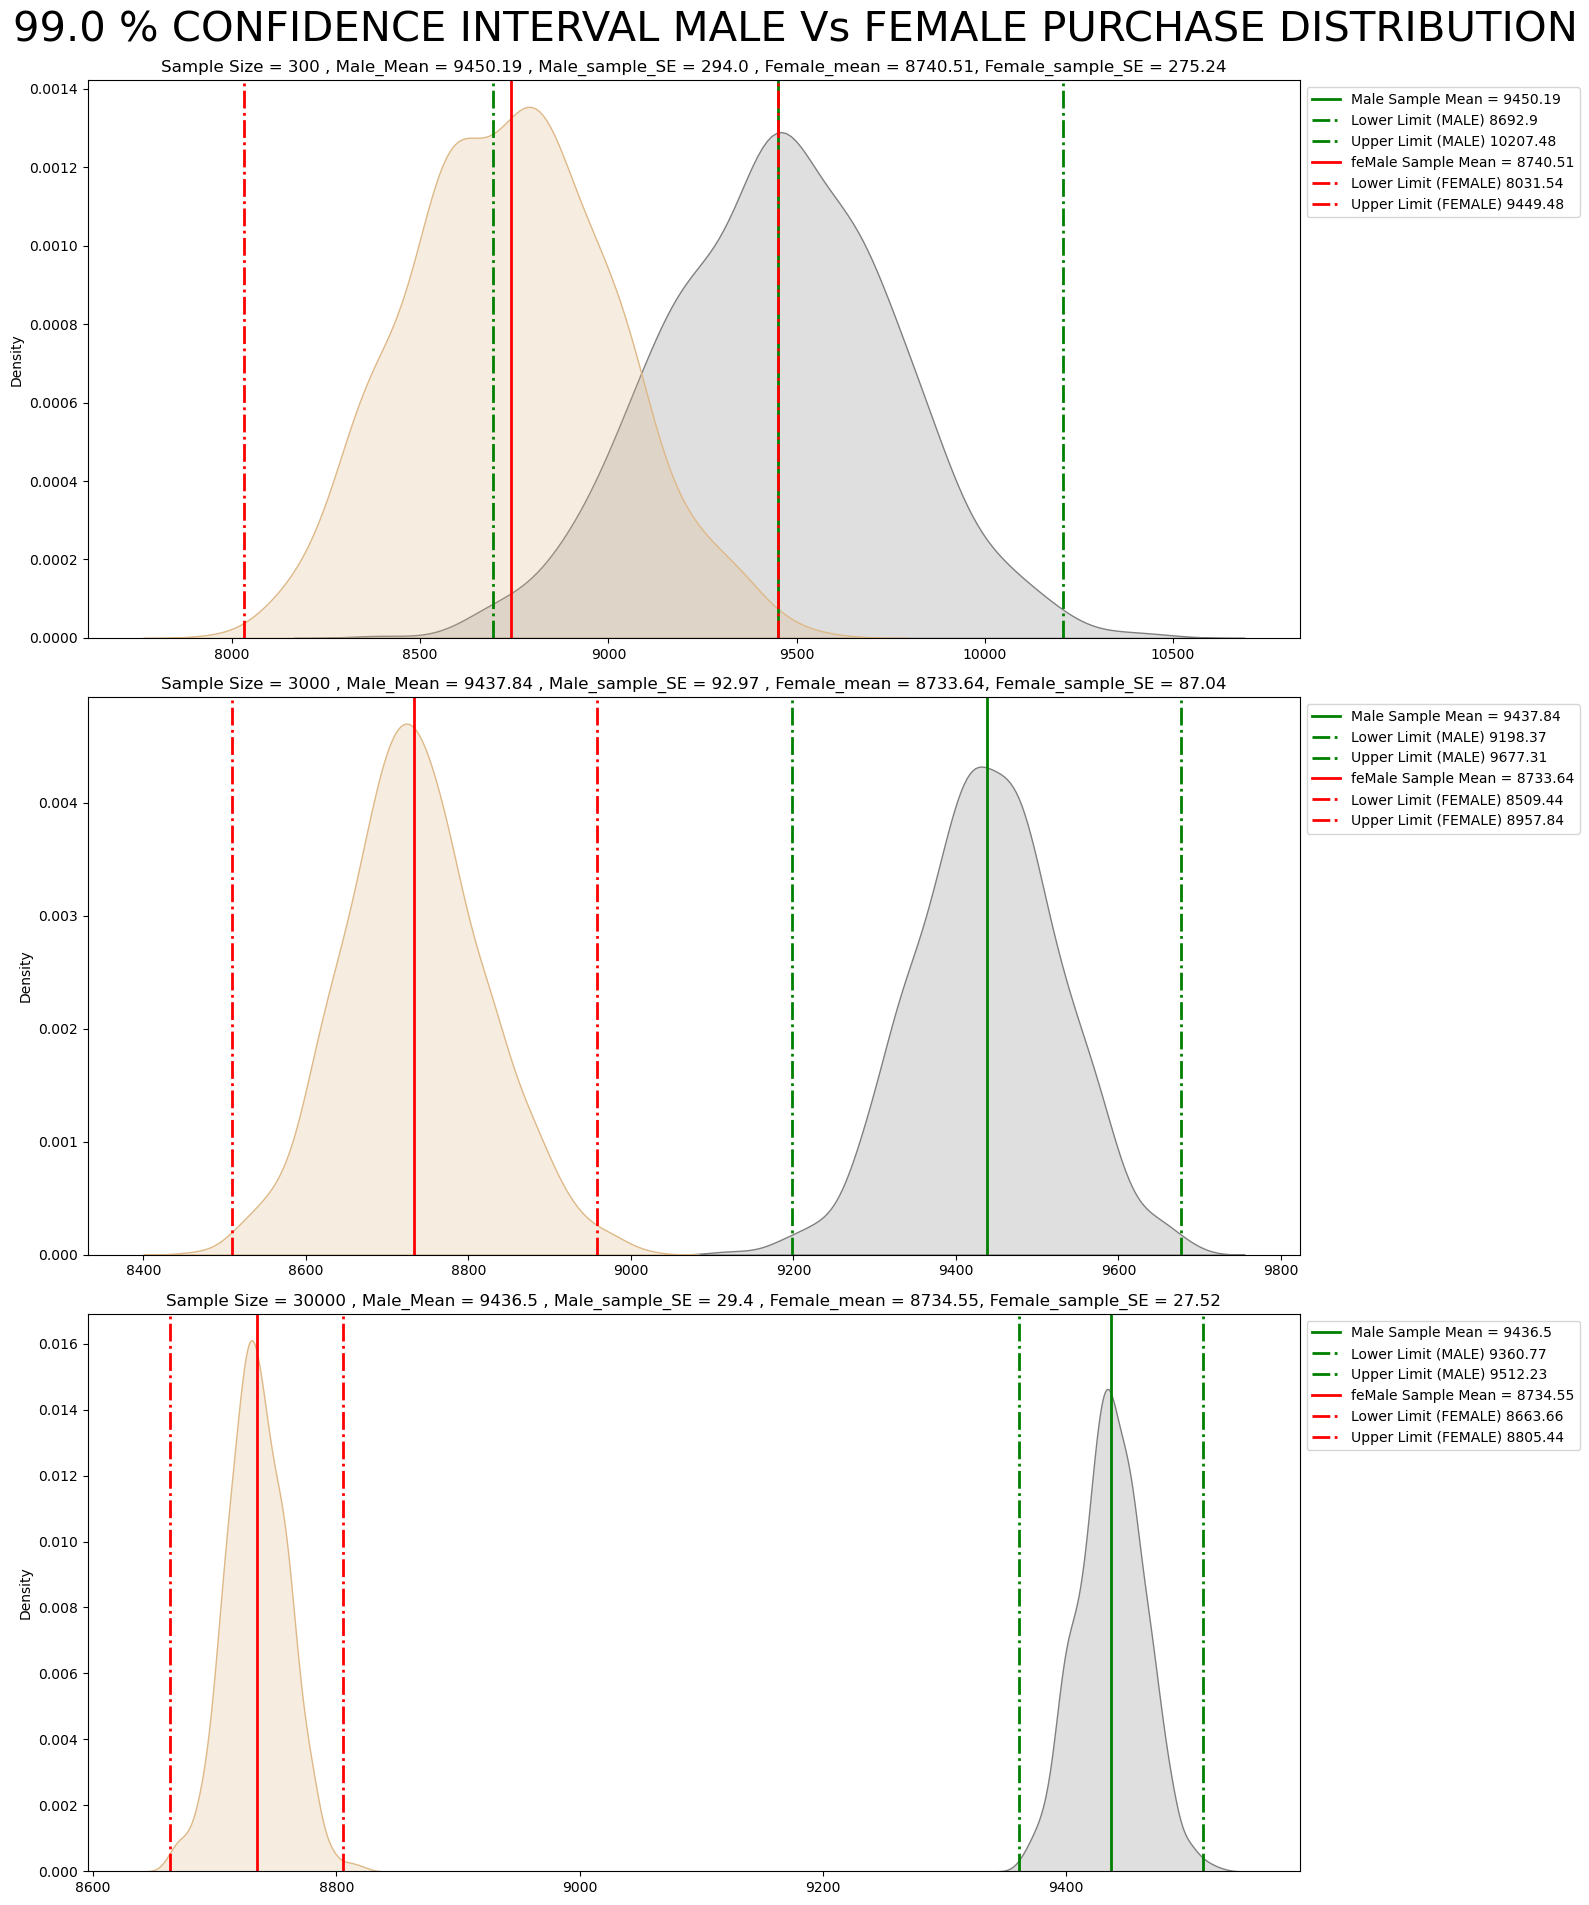

In [173]:
clt(99)

# **95% Confidence Interval**

For Sample Size 300 confidence interval of Male means: (8858.33, 10010.79)
For Sample Size 300 confidence interval of Female means: (8202.71, 9281.63)
For Sample Size 3000 confidence interval of Male means: (9258.09, 9622.53)
For Sample Size 3000 confidence interval of Female means: (8569.1, 8910.3)
For Sample Size 30000 confidence interval of Male means: (9381.95, 9497.19)
For Sample Size 30000 confidence interval of Female means: (8680.49, 8788.37)


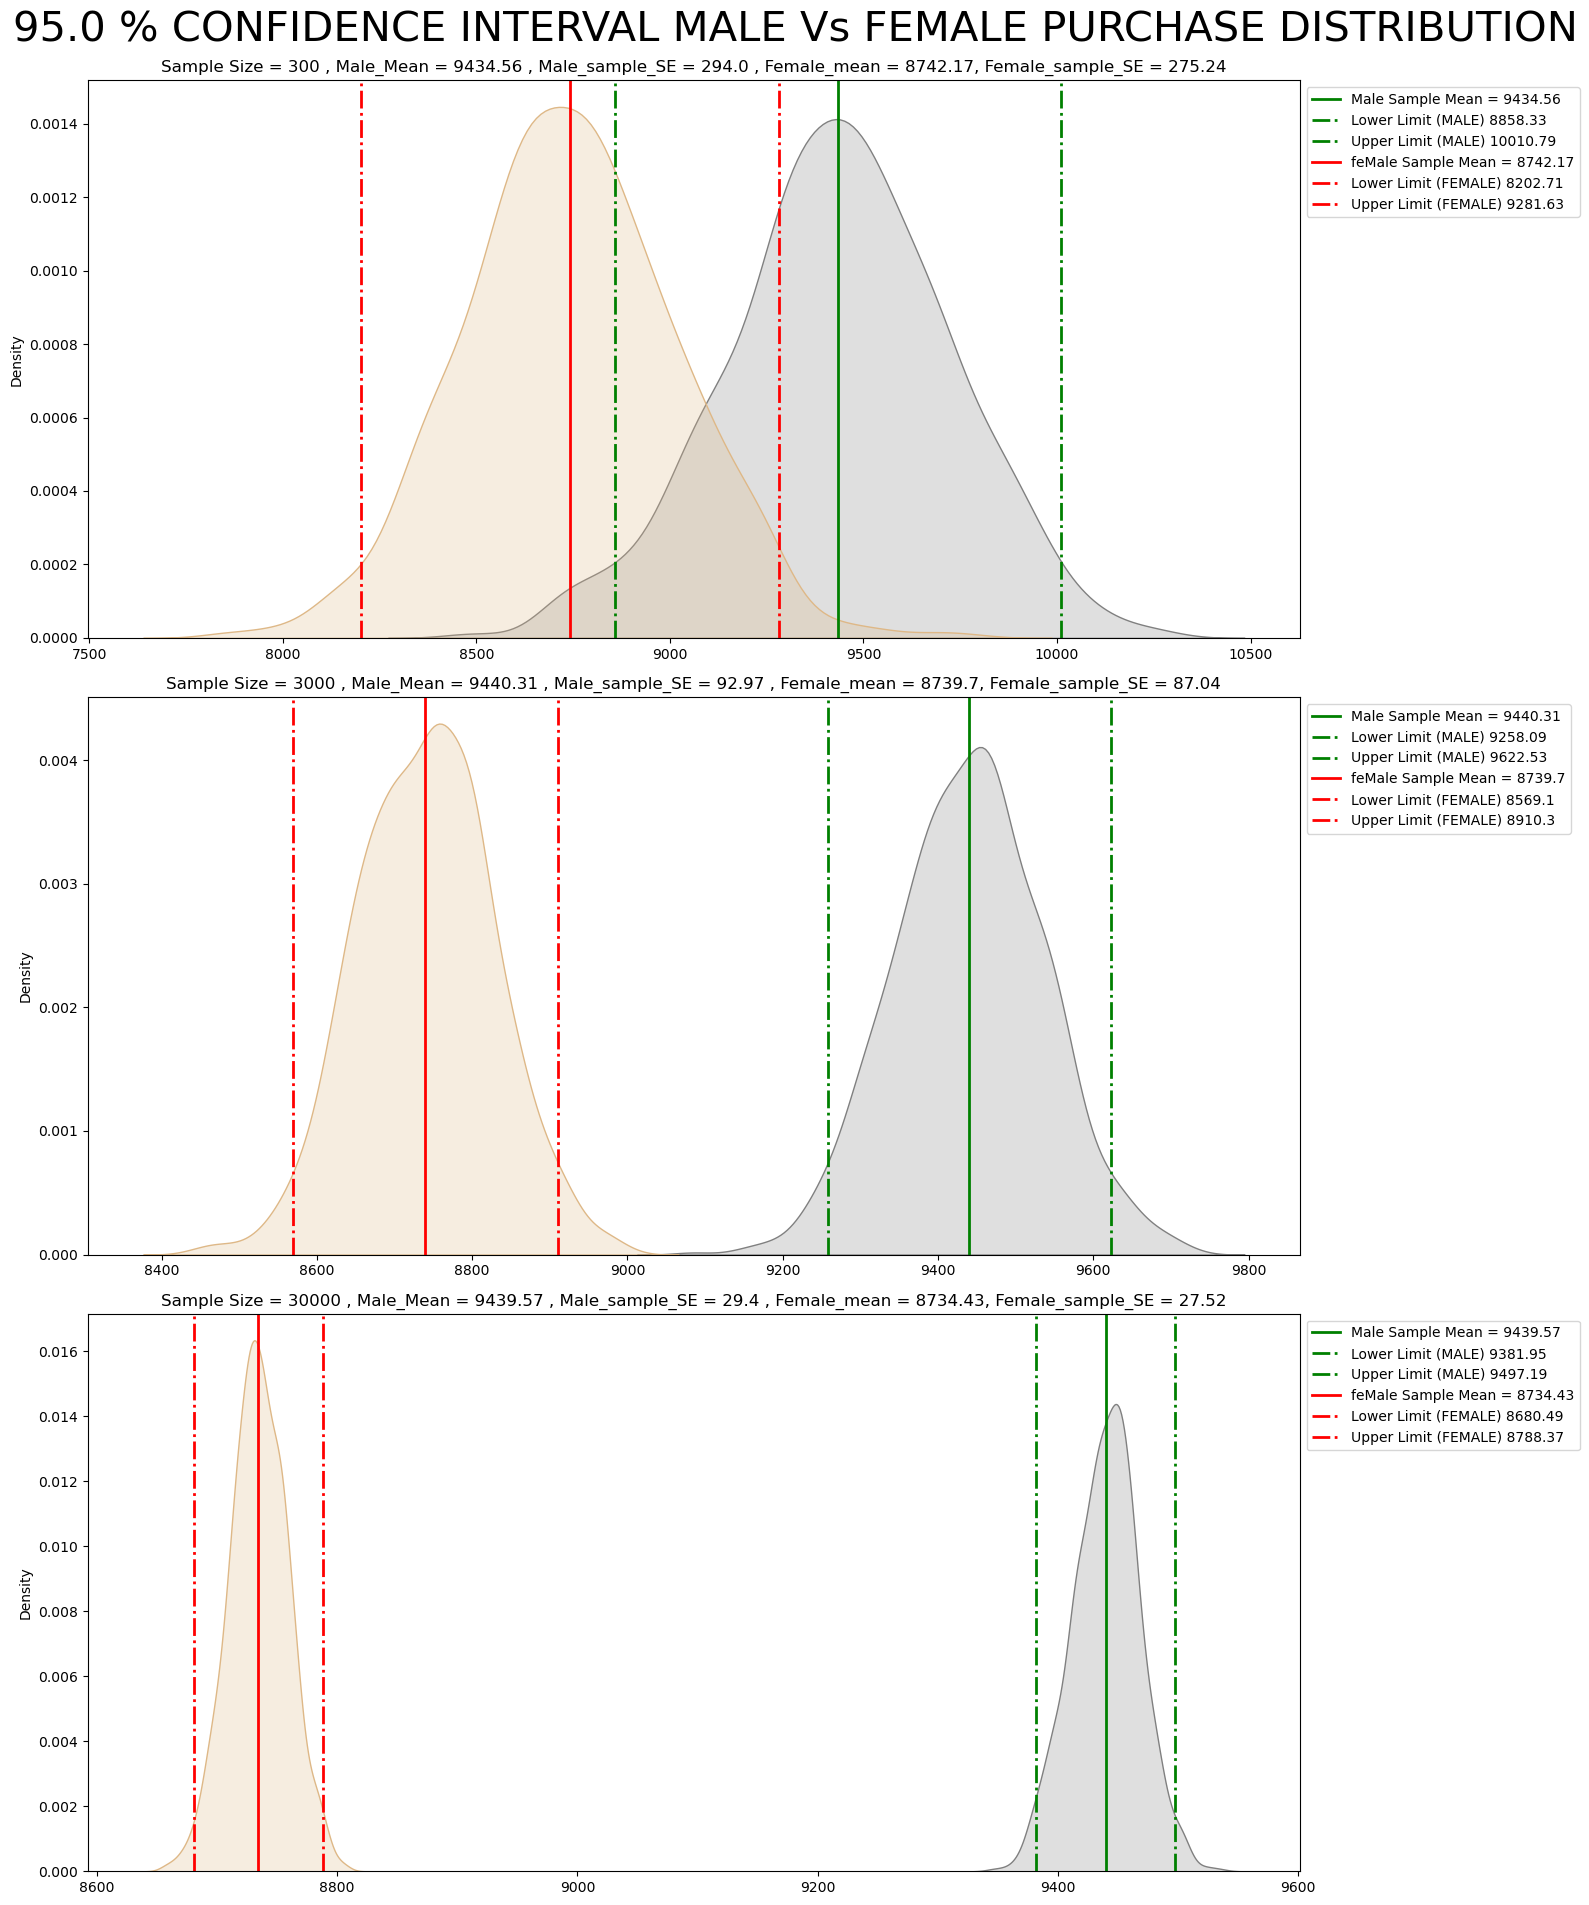

In [174]:
clt(95)

# **90% Confidence Interval**

For Sample Size 300 confidence interval of Male means: (8958.41, 9925.59)
For Sample Size 300 confidence interval of Female means: (8292.71, 9198.17)
For Sample Size 3000 confidence interval of Male means: (9280.72, 9586.56)
For Sample Size 3000 confidence interval of Female means: (8585.18, 8871.52)
For Sample Size 30000 confidence interval of Male means: (9388.19, 9484.91)
For Sample Size 30000 confidence interval of Female means: (8688.54, 8779.08)


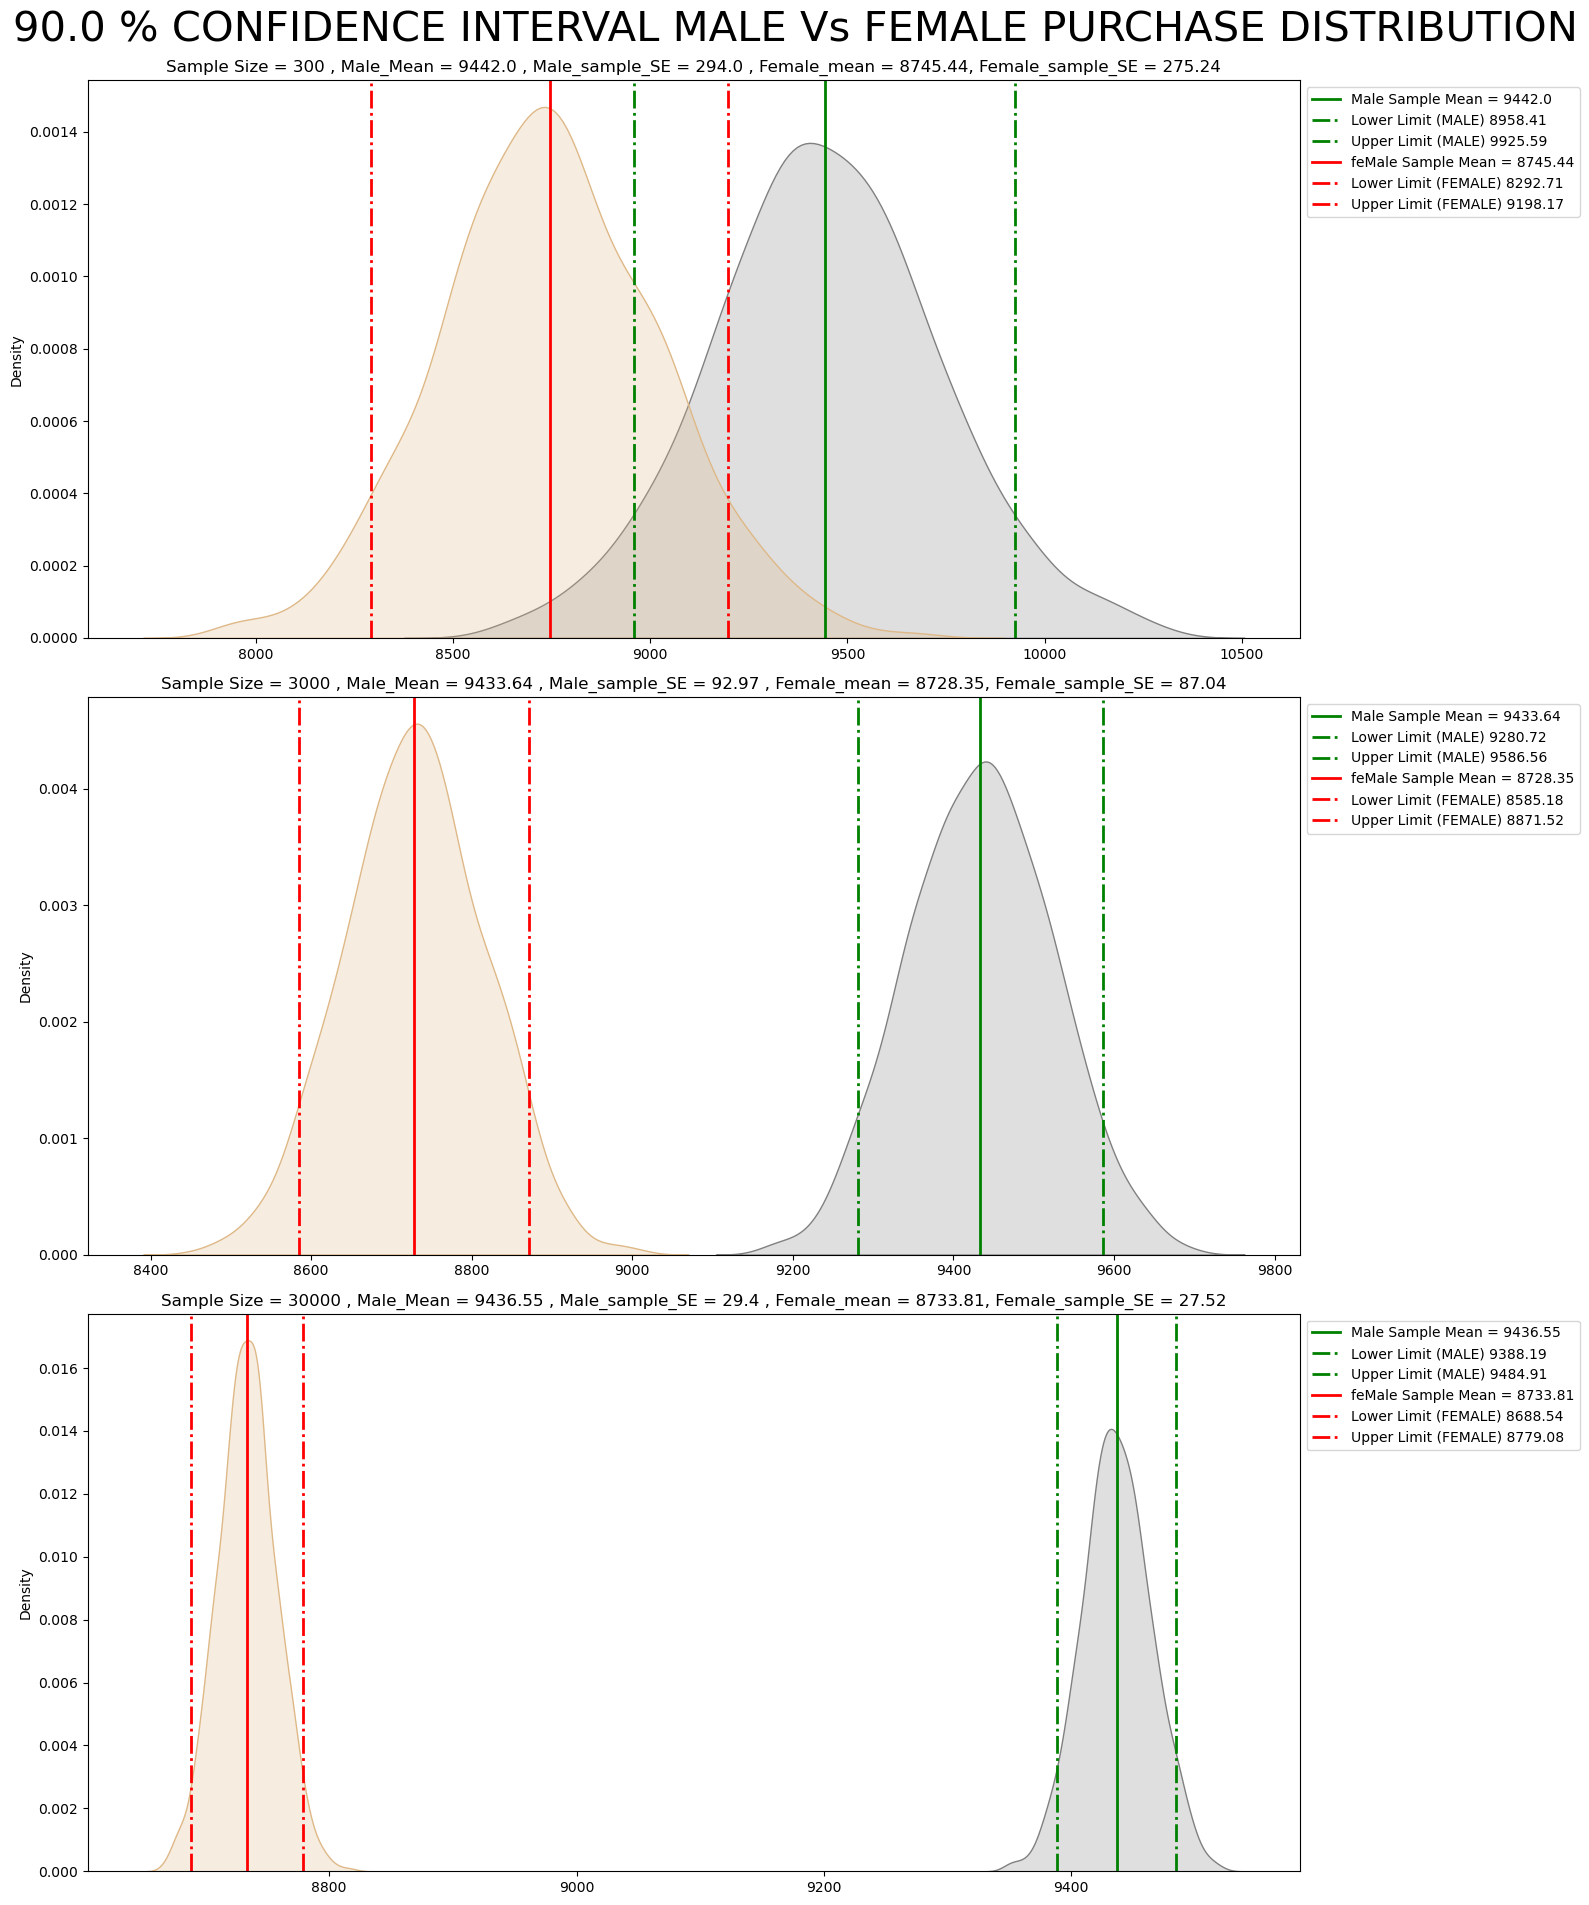

In [175]:
clt(90)

#### **Insights:**

- For both genders, as the sample size increases, the confidence interval becomes narrower, indicating more precision in the estimate of average purchases.
- The confidence intervals for males and females do not overlap, indicating a clear difference in average purchases.

In [176]:
Temp = {"Gender" : Gender, "Sample_size": Sample_size ,"Sample_mean" : Sample_mean, "Lower_limit" : Lower_limit , "Upper_limit": Upper_limit , "CI" : CI }
pur_vs_gender = pd.DataFrame(Temp)
pur_vs_gender["CI_Range"] = pur_vs_gender["Upper_limit"] - pur_vs_gender["Lower_limit"]
pur_vs_gender

Gender  Sample_size  Sample_mean  Lower_limit  Upper_limit    CI  CI_Range
0     Male          300      9450.19      8692.90     10207.48  99.0   1514.58
1   Female          300      8740.51      8031.54      9449.48  99.0   1417.94
2     Male         3000      9437.84      9198.37      9677.31  99.0    478.94
3   Female         3000      8733.64      8509.44      8957.84  99.0    448.40
4     Male        30000      9436.50      9360.77      9512.23  99.0    151.46
5   Female        30000      8734.55      8663.66      8805.44  99.0    141.78
6     Male          300      9434.56      8858.33     10010.79  95.0   1152.46
7   Female          300      8742.17      8202.71      9281.63  95.0   1078.92
8     Male         3000      9440.31      9258.09      9622.53  95.0    364.44
9   Female         3000      8739.70      8569.10      8910.30  95.0    341.20
10    Male        30000      9439.57      9381.95      9497.19  95.0    115.24
11  Female        30000      8734.43      8680.49      8788.37  95.0    107.88
12    Male          300      9442.00      8958.41      9925.59  90.0    967.18
13  Female          300      8745.44      8292.71      9198.17  90.0    905.46
14    Male         3000      9433.64      9280.72      9586.56  90.0    305.84
15  Female         3000      8728.35      8585.18      8871.52  90.0    286.34
16    Male        30000      9436.55      9388.19      9484.91  90.0     96.72
17  Female        30000      8733.81      8688.54      8779.08  90.0     90.54

# **Insights:**
- **Sample Size and Confidence Intervals:**

  As the sample size increases, confidence intervals for both genders narrow, leading to more precise purchase estimates. For instance, with a sample size of 30,000, the CI range for males is 96.72, while for females, it is 90.54 at a 90% confidence level.

- **Gender Purchase Behavior:**

  Males consistently show higher average purchase estimates than females across all confidence levels and sample sizes. For example, at a 95% confidence level with a sample size of 30,000, the average purchase estimate for males is aprox 9400, compared to aprox 8700 for females.


# **Recommendations and improvements:**


- **Targeted Marketing Strategies:**

  Develop gender-specific marketing campaigns that cater to the spending habits of each group. Since males tend to spend more on average, consider offering premium products or bundles targeted towards male customers.

- **Product Offerings and Pricing:**

  Adjust product offerings and pricing strategies based on the observed spending patterns. For instance, introduce competitive pricing or discounts on female-oriented products to encourage higher spending among female customers, while maintaining or increasing pricing on products favored by male customers.

## **2. Purchase Vs Marital Status**

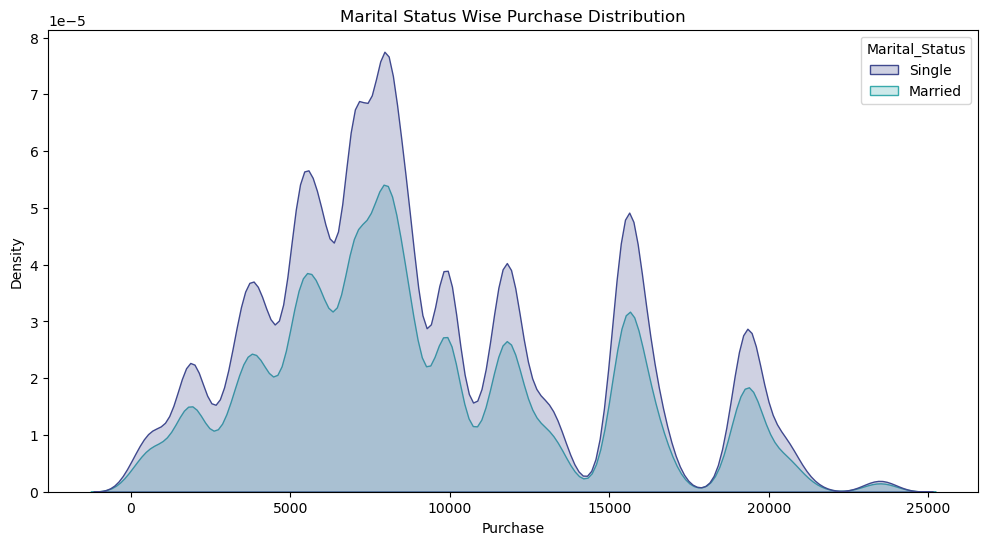

In [177]:
plt.figure(figsize = (12,6))
sns.kdeplot(data = df ,x = "Purchase",hue = "Marital_Status",fill = True, palette= "mako")
plt.title("Marital Status Wise Purchase Distribution")
plt.show()

In [178]:
df.groupby("Marital_Status")["Purchase"].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
Married         225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   
Single          324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   

                    75%      max  
Marital_Status                    
Married         12042.0  23961.0  
Single          12061.0  23961.0

#### **Insight:**
- Both unmarried and married individuals have nearly identical average purchase amounts (9265.91 for unmarried, 9261.17 for married).
- The spending variability is also similar between the two groups, with standard deviations of 5027.35 (unmarried) and 5016.90 (married)
- Not normally distributed data

In [179]:
married = df.loc[df["Marital_Status"] == "Married"]["Purchase"]
unmarried = df.loc[df["Marital_Status"] == "Single"]["Purchase"]
married_std = round(married.std(),2)
unmarried_std = round(unmarried.std(),2)
print(f"Standard Deviation of Single Customers = {unmarried_std}")
print(f"Standard Deviation of Married Customers = {married_std}")


Standard Deviation of Single Customers = 5027.35
Standard Deviation of Married Customers = 5016.9


In [180]:
MS_Status= []
MS_Sample_Size = []
MS_Lower_limit = []
MS_Upper_limit = []
MS_Sample_mean = []
MS_CI = []

In [181]:
def mclt(ci):
  ci = ci/100
  plt.figure(figsize = (16,20))
  for i,j in enumerate(sample_size):
    plt.subplot(3,1,i+1)



    married_sample = [np.mean(married.sample(j)) for k in range(num_sample)]
    married_sample_mean = np.mean(married_sample).round(2)
    married_se = married_std/np.sqrt(j)
    married_se = married_se.round(2)
    lower_limit_married , upper_limit_married = norm.interval(ci,loc = married_sample_mean,scale = married_se )
    lower_limit_married = lower_limit_married.round(2)
    upper_limit_married = upper_limit_married.round(2)


    MS_Status.append("Married")
    MS_Sample_Size.append(j)
    MS_Lower_limit.append(lower_limit_married)
    MS_Upper_limit.append(upper_limit_married)
    MS_CI.append(ci*100)
    MS_Sample_mean.append(married_sample_mean)



    label_mean_married = (f"Married Sample Mean = {married_sample_mean}")
    label_lower_limit_married = (f"Lower Limit (MARRIED) {lower_limit_married}")
    label_upper_limit_married = (f"Upper Limit (MARRIED) {upper_limit_married}")
    plt.axvline(married_sample_mean,color = "green", linestyle = "solid",linewidth = 2,label = label_mean_married )
    plt.axvline(lower_limit_married,color = "green", linestyle = "dashdot",linewidth = 2, label = label_lower_limit_married )
    plt.axvline(upper_limit_married,color = "green", linestyle = "dashdot",linewidth = 2, label = label_upper_limit_married )
    plt.legend(loc = "upper right")
    print(f"For Sample Size {j} confidence interval of Married means: ({lower_limit_married}, {upper_limit_married})")


    unmarried_sample = [np.mean(unmarried.sample(j)) for k in range(num_sample)]
    unmarried_sample_mean = np.mean(unmarried_sample).round(2)
    unmarried_se = unmarried_std/np.sqrt(j)
    unmarried_se = unmarried_se.round(2)
    lower_limit_unmarried , upper_limit_unmarried = norm.interval(ci,loc = unmarried_sample_mean,scale = unmarried_se )
    upper_limit_unmarried = upper_limit_unmarried.round(2)
    lower_limit_unmarried = lower_limit_unmarried.round(2)


    MS_Status.append("Unmarried")
    MS_Sample_Size.append(j)
    MS_Lower_limit.append(lower_limit_unmarried)
    MS_Upper_limit.append(upper_limit_unmarried)
    MS_CI.append(ci*100)
    MS_Sample_mean.append(unmarried_sample_mean)




    label_mean_unmarried = (f"Unmarried Sample Mean = {unmarried_sample_mean}")
    label_lower_limit_unmarried = (f"Lower Limit (unmarried) {lower_limit_unmarried}")
    label_upper_limit_unmarried = (f"Upper Limit (unmarried) {upper_limit_unmarried}")
    plt.axvline(unmarried_sample_mean,color = "red", linestyle = "solid",linewidth = 2,label = label_mean_unmarried )
    plt.axvline(lower_limit_unmarried,color = "red", linestyle = "dashdot",linewidth = 2, label = label_lower_limit_unmarried)
    plt.axvline(upper_limit_unmarried,color = "red", linestyle = "dashdot",linewidth = 2, label = label_upper_limit_unmarried )
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    print(f"For Sample Size {j} confidence interval of Unmarried means: ({lower_limit_unmarried}, {upper_limit_unmarried})")


    sns.kdeplot(x = married_sample,fill = True, color = "grey")
    sns.kdeplot(x = unmarried_sample,fill = True,color = "burlywood")
    plt.title(f"Sample Size = {j} , Married_Mean = {married_sample_mean} , Married_sample_SE = {married_se} , unmarried_mean = {unmarried_sample_mean}, unmarried_sample_SE = {unmarried_se}")

  plt.suptitle(f"{ci*100} % CONFIDENCE INTERVAL  MARRIED Vs UNMARRIED PURCHASE DISTRIBUTION", fontsize = 30)
  plt.tight_layout(rect=[0.0, 0.03, 1, 0.99])
  plt.show()



# **99% Confidence Interval**

For Sample Size 300 confidence interval of Married means: (8518.89, 10011.07)
For Sample Size 300 confidence interval of Unmarried means: (8507.92, 10003.18)
For Sample Size 3000 confidence interval of Married means: (9030.61, 9502.51)
For Sample Size 3000 confidence interval of Unmarried means: (9030.77, 9503.65)
For Sample Size 30000 confidence interval of Married means: (9185.68, 9334.92)
For Sample Size 30000 confidence interval of Unmarried means: (9190.52, 9340.08)


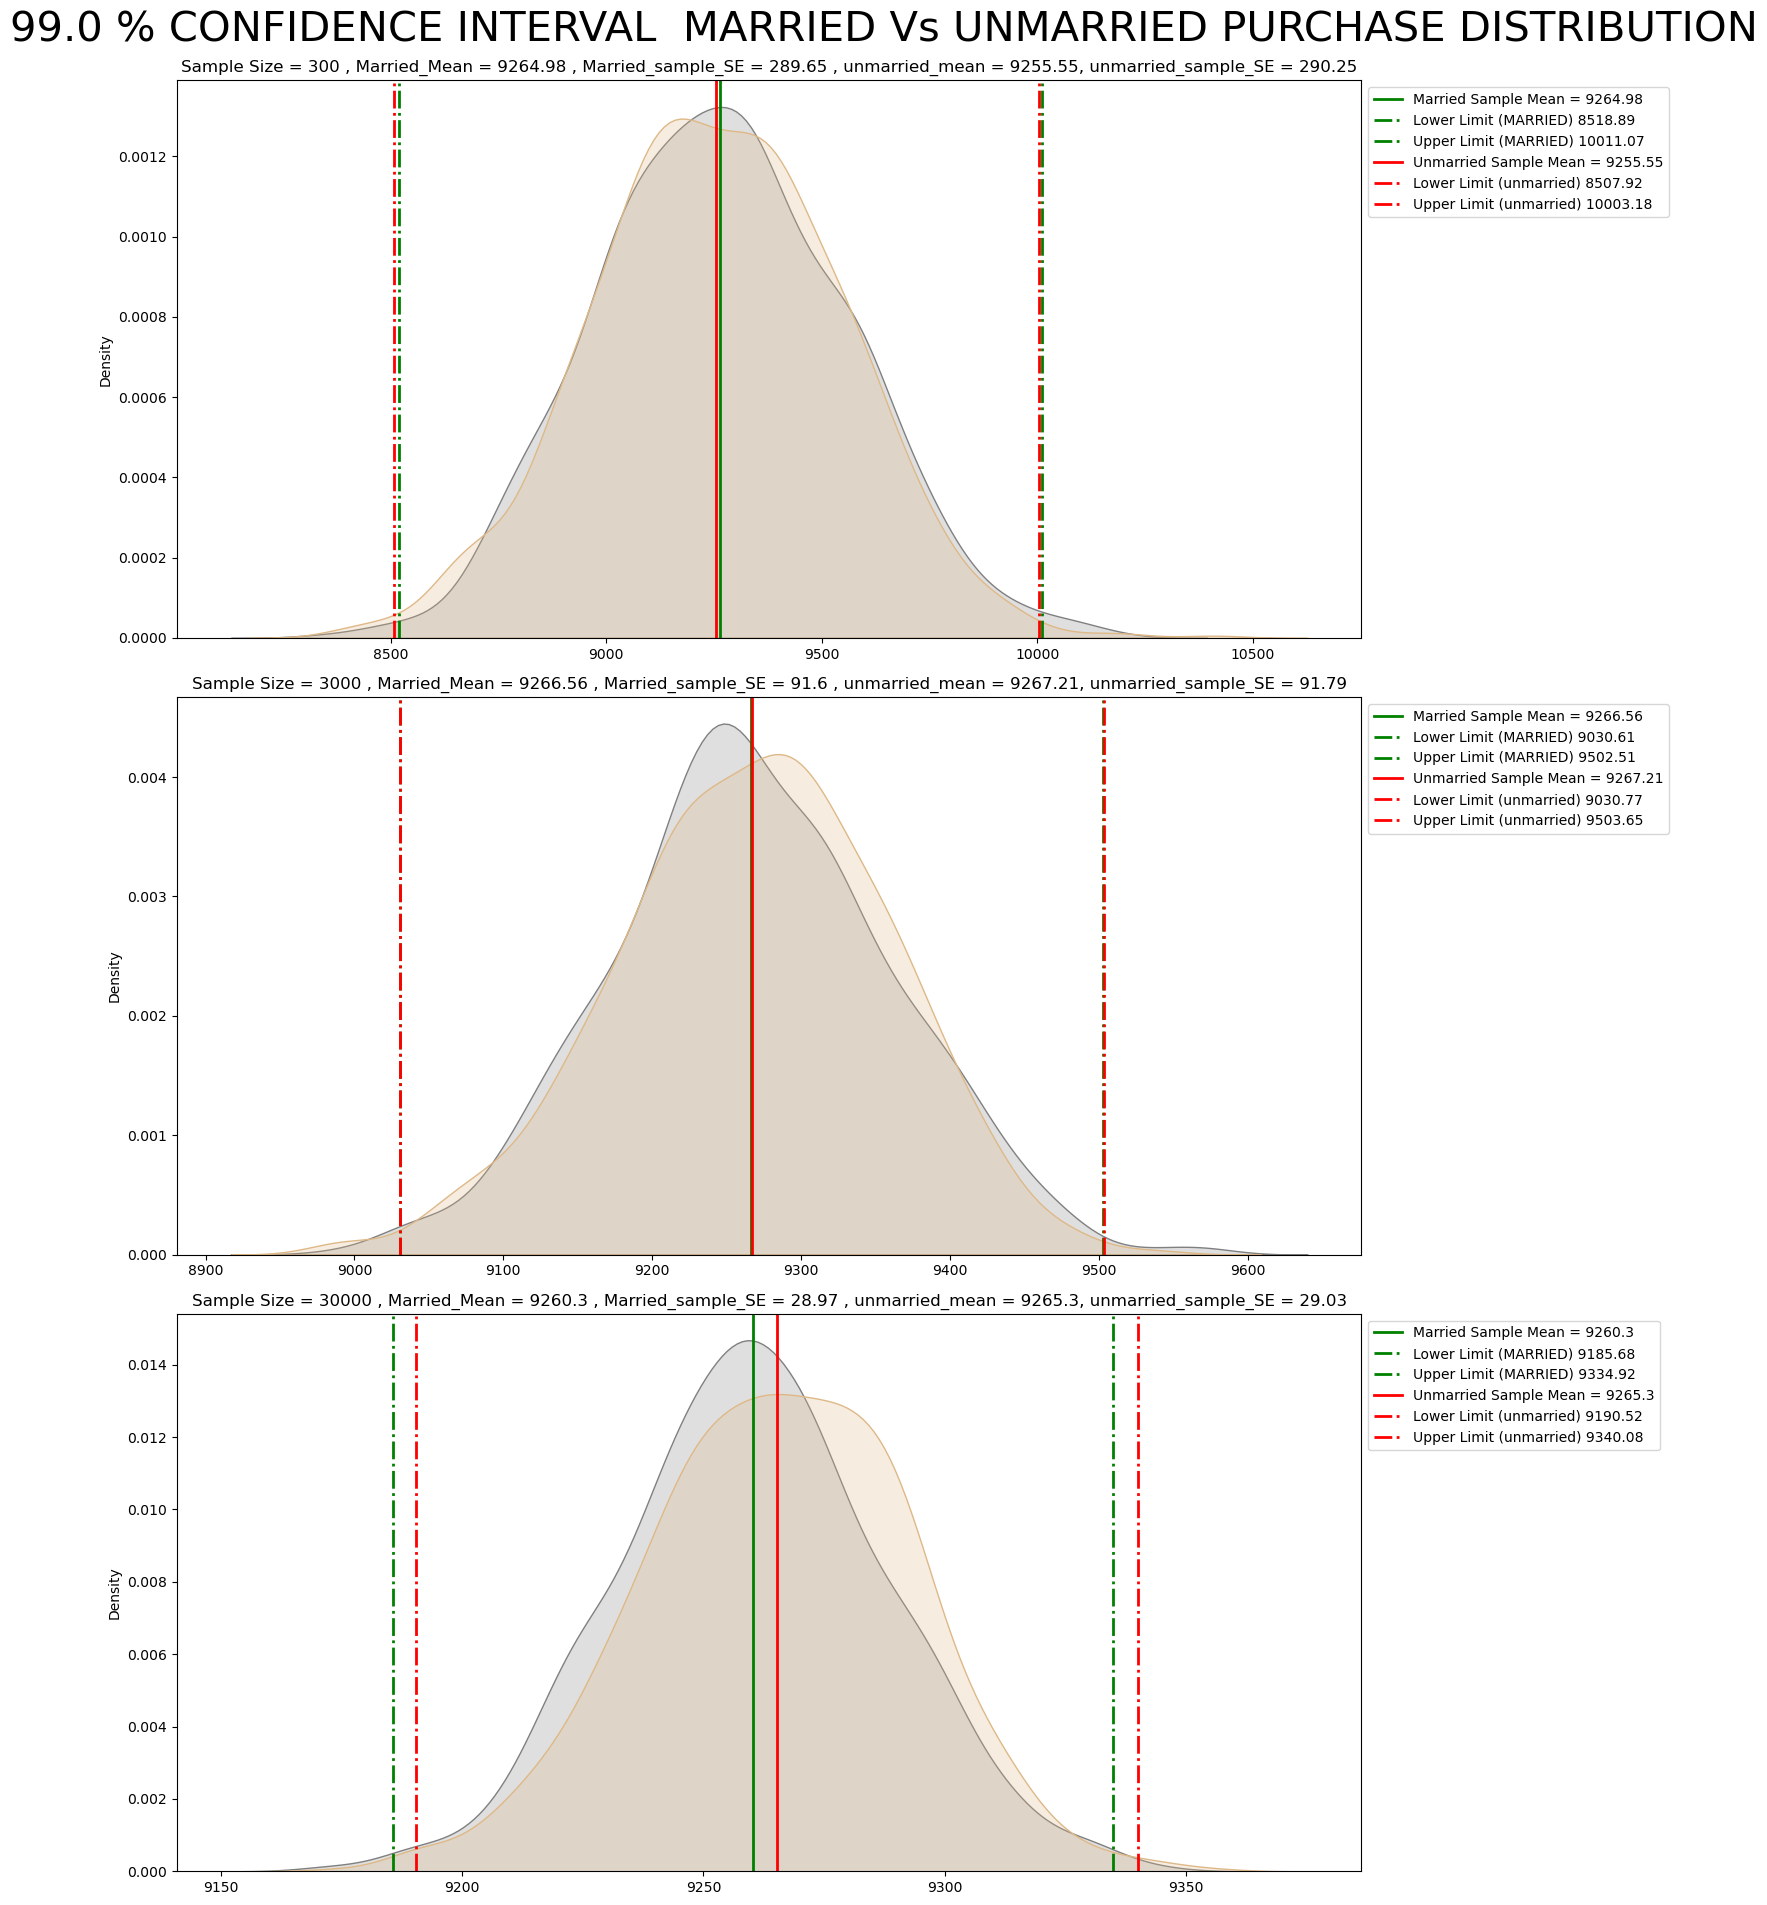

In [182]:
mclt(99)

# **95% Confidence Interval**

For Sample Size 300 confidence interval of Married means: (8679.15, 9814.55)
For Sample Size 300 confidence interval of Unmarried means: (8676.07, 9813.83)
For Sample Size 3000 confidence interval of Married means: (9081.81, 9440.87)
For Sample Size 3000 confidence interval of Unmarried means: (9085.46, 9445.28)
For Sample Size 30000 confidence interval of Married means: (9202.83, 9316.39)
For Sample Size 30000 confidence interval of Unmarried means: (9208.32, 9322.12)


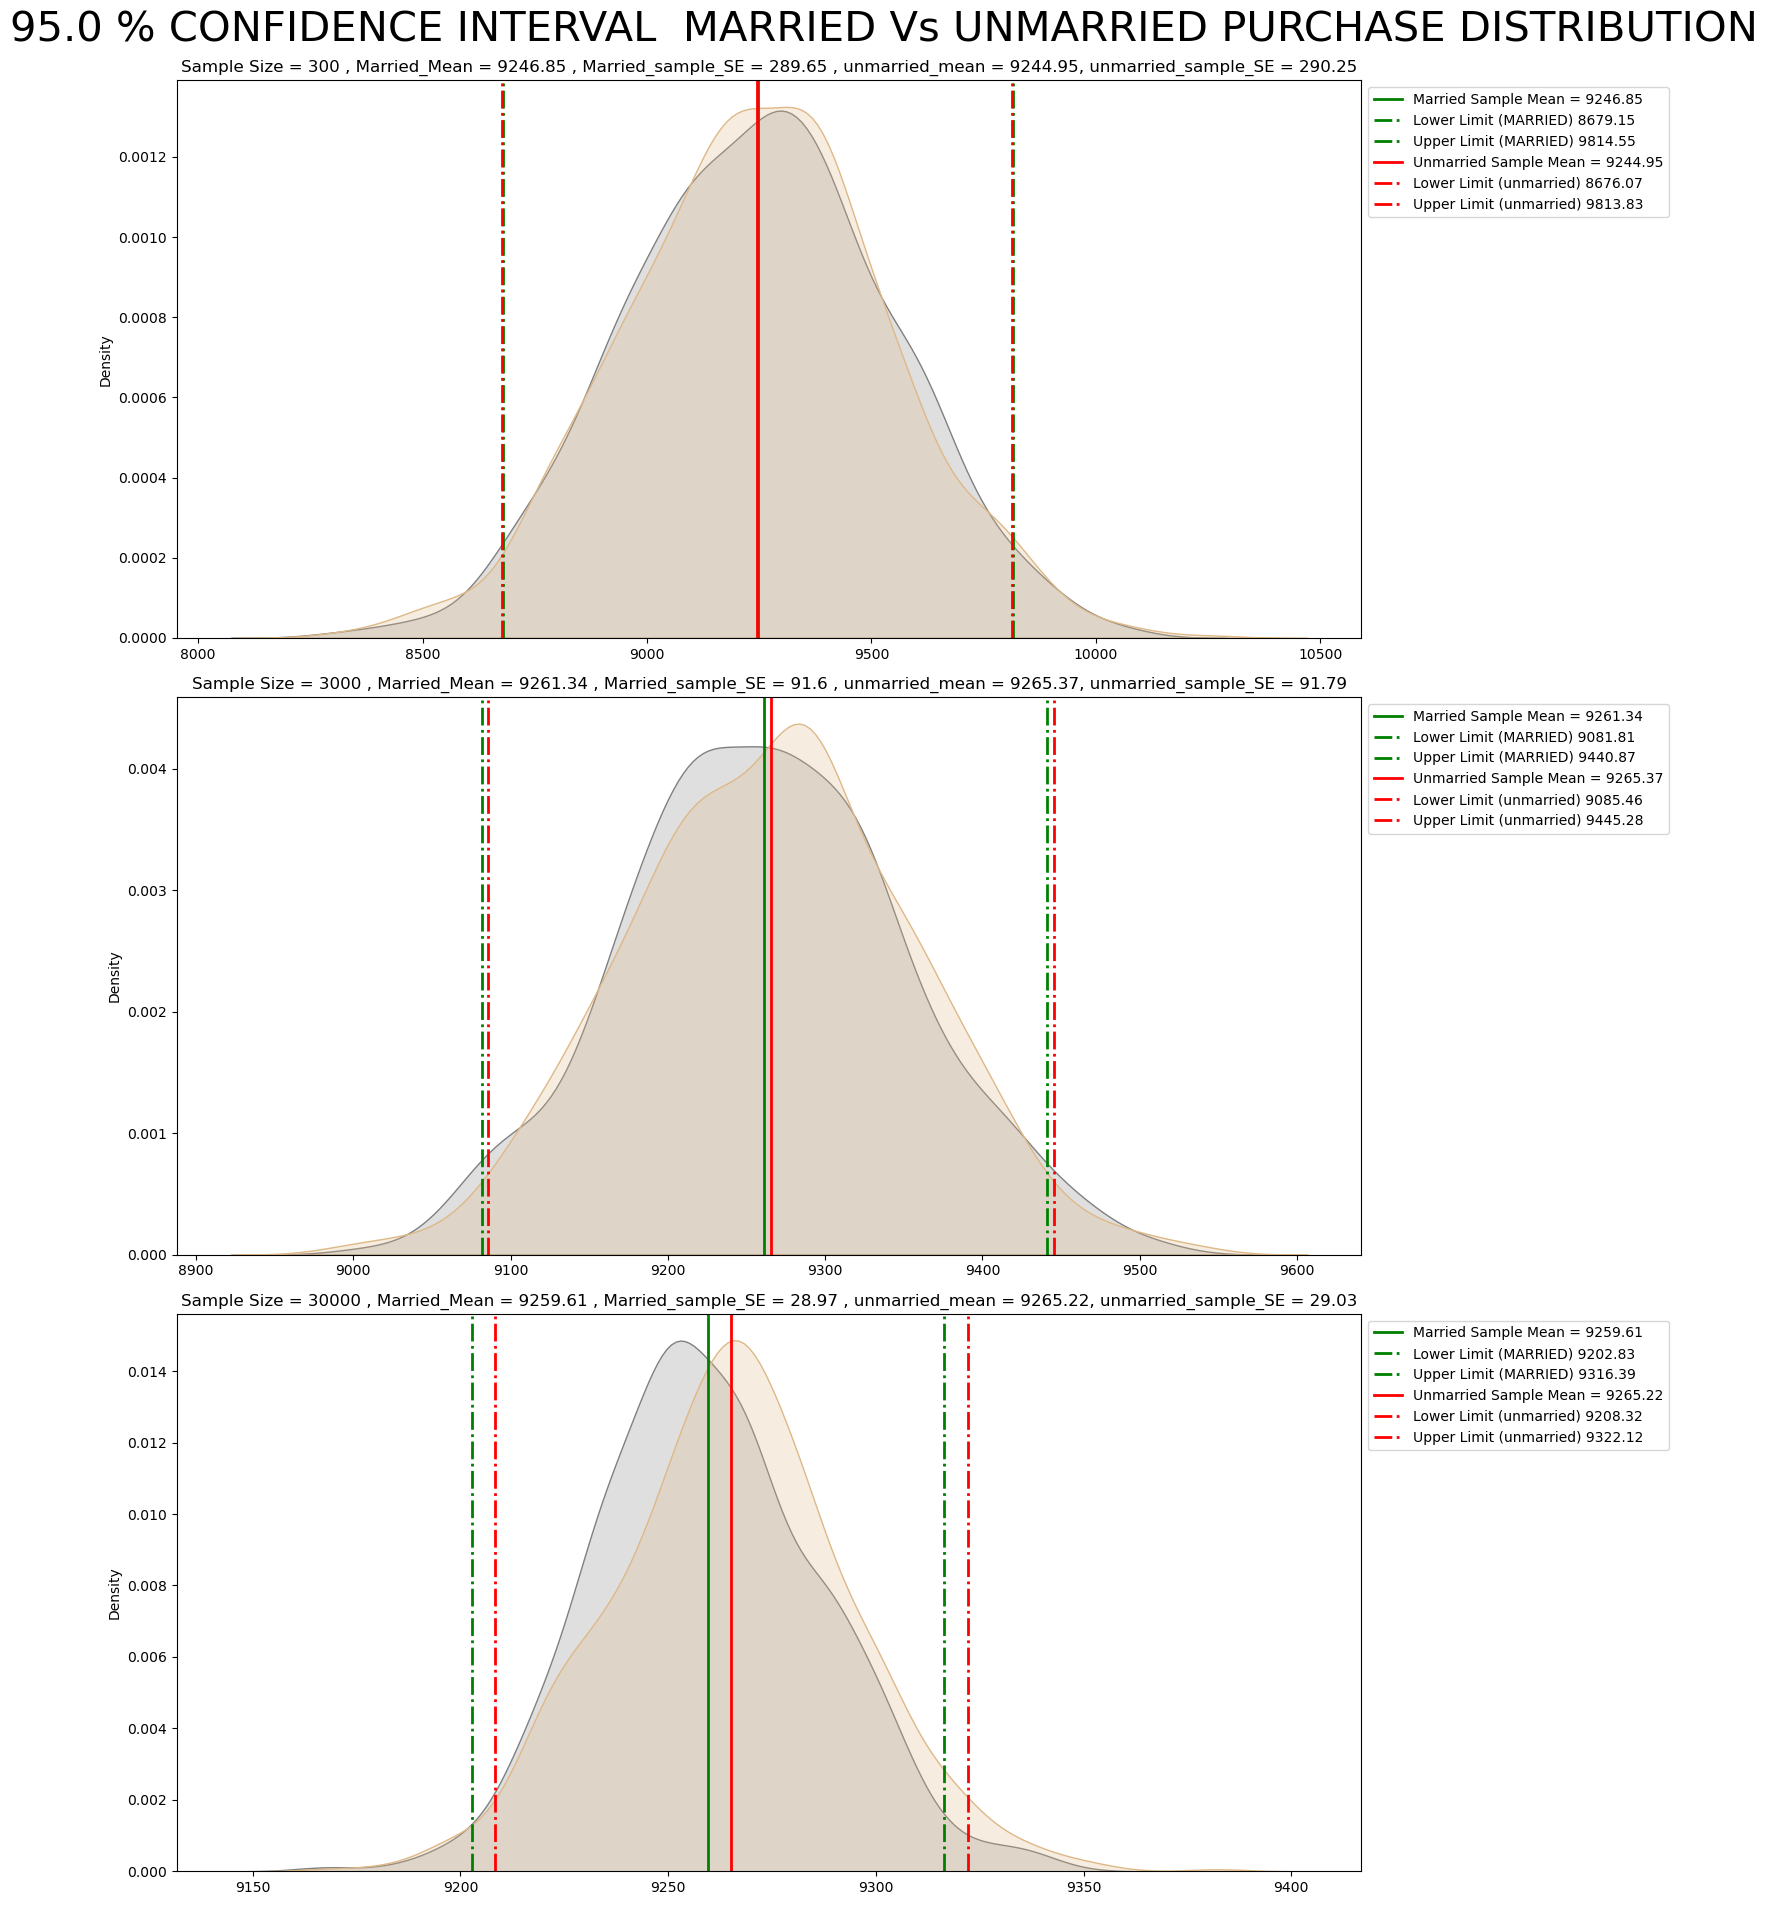

In [183]:
mclt(95)

# **90% Confidence Interval**

For Sample Size 300 confidence interval of Married means: (8792.23, 9745.09)
For Sample Size 300 confidence interval of Unmarried means: (8798.16, 9753.0)
For Sample Size 3000 confidence interval of Married means: (9113.49, 9414.83)
For Sample Size 3000 confidence interval of Unmarried means: (9110.72, 9412.68)
For Sample Size 30000 confidence interval of Married means: (9213.82, 9309.12)
For Sample Size 30000 confidence interval of Unmarried means: (9218.89, 9314.39)


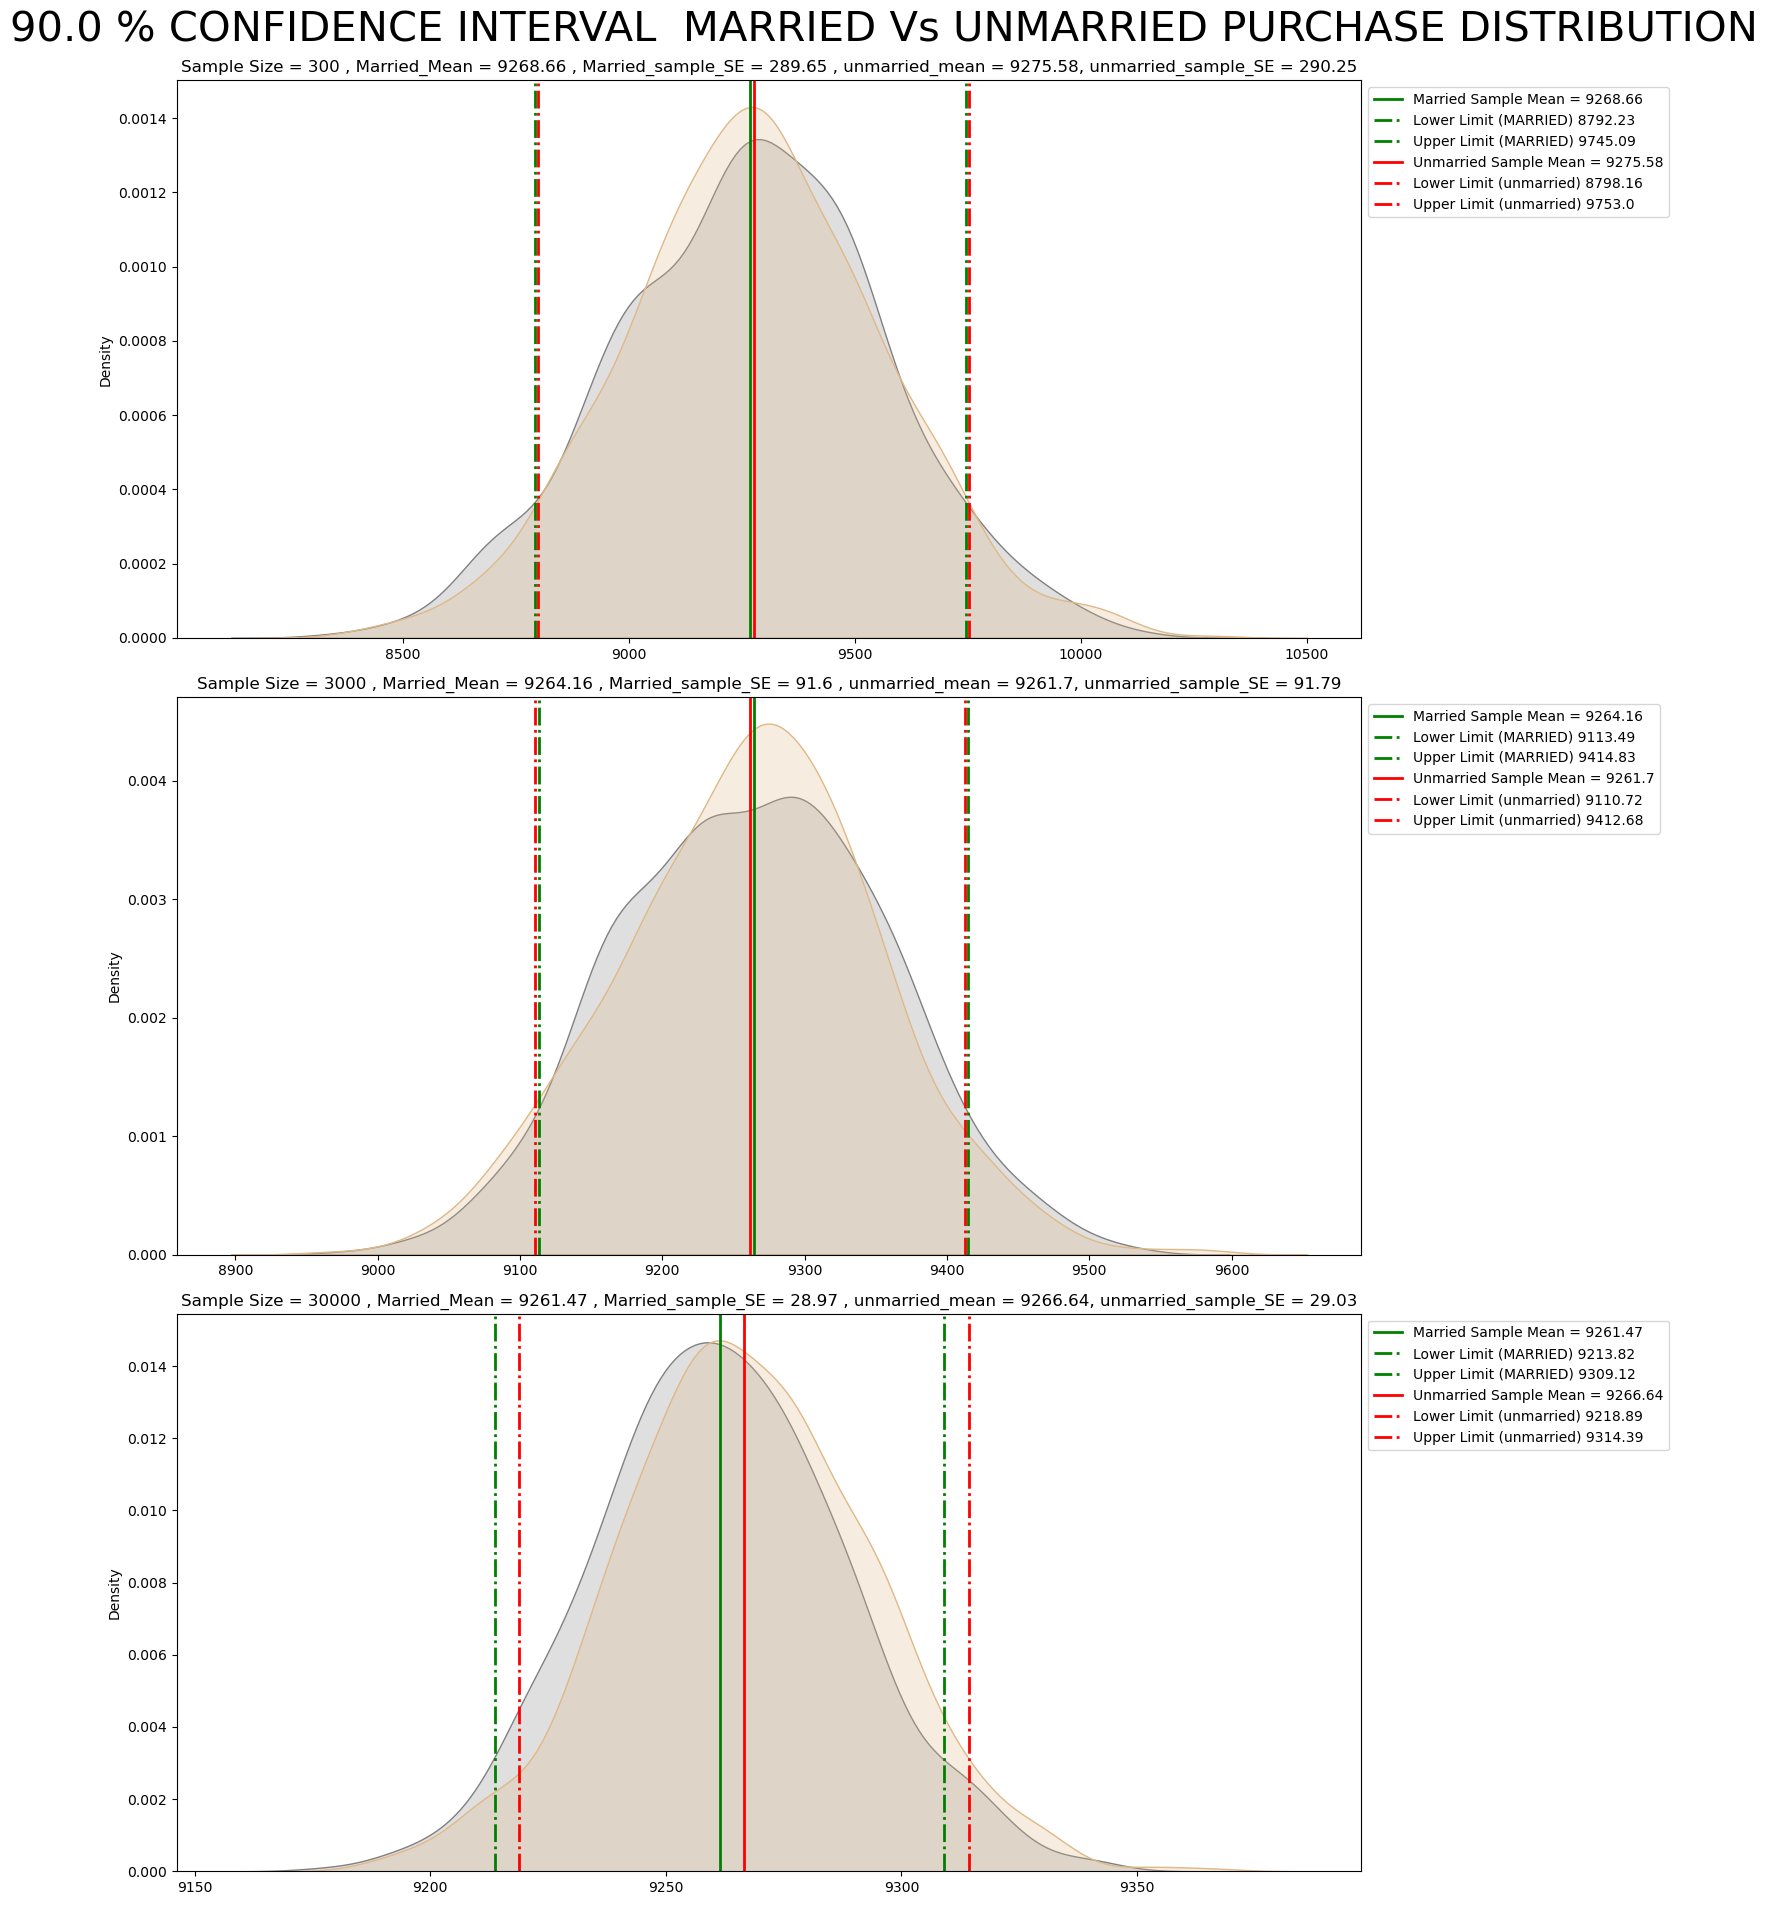

In [184]:
mclt(90)

In [185]:
temp1 = {"Marital_Status" : MS_Status, "Sample_size": MS_Sample_Size ,"Sample_mean" : MS_Sample_mean, "Lower_limit" : MS_Lower_limit , "Upper_limit": MS_Upper_limit , "CI" : MS_CI }
pur_vs_Mar_s = pd.DataFrame(temp1)
pur_vs_Mar_s["CI_Range"] = pur_vs_Mar_s["Upper_limit"] - pur_vs_Mar_s["Lower_limit"]
pur_vs_Mar_s

Marital_Status  Sample_size  Sample_mean  Lower_limit  Upper_limit    CI  \
0         Married          300      9264.98      8518.89     10011.07  99.0   
1       Unmarried          300      9255.55      8507.92     10003.18  99.0   
2         Married         3000      9266.56      9030.61      9502.51  99.0   
3       Unmarried         3000      9267.21      9030.77      9503.65  99.0   
4         Married        30000      9260.30      9185.68      9334.92  99.0   
5       Unmarried        30000      9265.30      9190.52      9340.08  99.0   
6         Married          300      9246.85      8679.15      9814.55  95.0   
7       Unmarried          300      9244.95      8676.07      9813.83  95.0   
8         Married         3000      9261.34      9081.81      9440.87  95.0   
9       Unmarried         3000      9265.37      9085.46      9445.28  95.0   
10        Married        30000      9259.61      9202.83      9316.39  95.0   
11      Unmarried        30000      9265.22      9208.32      9322.12  95.0   
12        Married          300      9268.66      8792.23      9745.09  90.0   
13      Unmarried          300      9275.58      8798.16      9753.00  90.0   
14        Married         3000      9264.16      9113.49      9414.83  90.0   
15      Unmarried         3000      9261.70      9110.72      9412.68  90.0   
16        Married        30000      9261.47      9213.82      9309.12  90.0   
17      Unmarried        30000      9266.64      9218.89      9314.39  90.0   

    CI_Range  
0    1492.18  
1    1495.26  
2     471.90  
3     472.88  
4     149.24  
5     149.56  
6    1135.40  
7    1137.76  
8     359.06  
9     359.82  
10    113.56  
11    113.80  
12    952.86  
13    954.84  
14    301.34  
15    301.96  
16     95.30  
17     95.50

# **Insights:**

- **Sample Size and Confidence Intervals:**

  As the sample size increases, confidence intervals for both married and unmarried groups narrow significantly. For example, at a sample size of 30,000, the CI range for married individuals is 95.30, and for unmarried individuals, it is 95.50 at 90% confidence.

- **Similar Purchase Patterns:**

  Across all confidence levels, married and unmarried individuals exhibit nearly identical average purchase estimates. For instance, at a 95% confidence level with a sample size of 30,000, the average purchase estimates are 9260.40 for married and 9264.88 for unmarried individuals


# **Recommendation and improvements:**
- **Unified Marketing Strategies:**

  Given the nearly identical purchase behavior of married and unmarried individuals, a unified marketing approach targeting both groups could be effective. Consider broad campaigns that resonate with general consumer behaviors rather than focusing on marital status distinctions.

- **Sample Size Consideration:**

  To ensure precise and reliable estimates, larger sample sizes should be prioritized in future analyses. This will reduce uncertainty and lead to more confident decision-making in targeting strategies.

# **3. Purchase Vs Age**

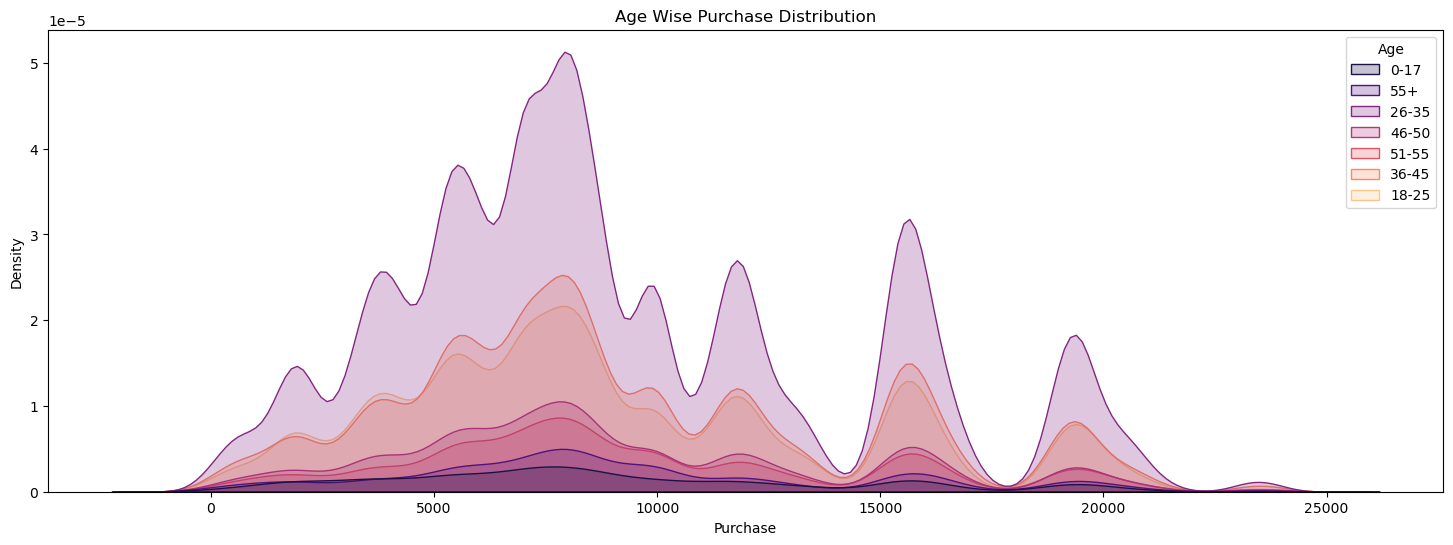

In [186]:
plt.figure(figsize = (18,6))
sns.kdeplot(data = df ,x = "Purchase",hue = "Age",fill = True, palette= "magma")
plt.title("Age Wise Purchase Distribution")
plt.show()

In [187]:
df.groupby("Age")["Purchase"].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

#### **Insights:**

- Highest Average Spending:

  The 51-55 age group has the highest average purchase amount at 9534.81, indicating this group tends to spend more per transaction compared to other age groups.
- Age Group Distribution:

  The majority of purchases come from the 26-35 age group, with an average spending of 9252.69, showing their significant contribution to overall sales.
- Distribution Analysis:

  The purchase amounts across all age groups are not normally distributed, indicating the need for careful analysis in designing effective marketing strategies.

In [188]:
age_groups = ['0-17','18-25', '26-35','36-45','46-50','51-55','55+']
sample_size = [300 , 3000 , 30000]
num_sample = 1000
Age_Group = []
Age_Sample_size = []
Age_Lower_limit = []
Age_Upper_limit = []
Age_Sample_mean = []
Age_CI = []

In [189]:
def age_ci(ci):


  plt.figure(figsize = (14, 10))
  for age in age_groups:
    temp = df.loc[df["Age"] == age]["Purchase"]


    for n ,j in enumerate(sample_size):
      plt.subplot(3,1,n+1)

      data_sample = [np.mean(temp.sample(j,replace = True)) for k  in range(num_sample)]
      data_sample_mean = np.mean(data_sample).round(2)
      data_sample_se = df.loc[df["Age"]==age]["Purchase"].std()/np.sqrt(j)
      data_sample_se = data_sample_se.round(2)
      data_sample_lower_limit,data_sample_upper_limit =  norm.interval(ci/100,loc = data_sample_mean,scale = data_sample_se)
      data_sample_lower_limit = data_sample_lower_limit.round(2)
      data_sample_upper_limit = data_sample_upper_limit.round(2)


      Age_Group.append(age)
      Age_Sample_size.append(j)
      Age_Lower_limit.append(data_sample_lower_limit)
      Age_Upper_limit.append(data_sample_upper_limit)
      Age_Sample_mean.append(data_sample_mean)
      Age_CI.append(ci)
      print(f"For Sample Size {j} in Age Group {age} confidence interval of means: ({data_sample_lower_limit}, {data_sample_upper_limit})")

      sns.kdeplot(data_sample, fill = True,label=f'{age}')
      plt.legend(title= "Age_Groups")
      plt.title(f"Sample Size {j}")
  plt.suptitle(f"Age-Wise Purchase Distribution for {ci}% Confidence Interval", fontsize = 30)
  plt.tight_layout()
  plt.show()


# **99% Confidence Interval**

For Sample Size 300 in Age Group 0-17 confidence interval of means: (8168.13, 9688.33)
For Sample Size 3000 in Age Group 0-17 confidence interval of means: (8693.7, 9174.46)
For Sample Size 30000 in Age Group 0-17 confidence interval of means: (8857.72, 9009.74)
For Sample Size 300 in Age Group 18-25 confidence interval of means: (8413.35, 9910.73)
For Sample Size 3000 in Age Group 18-25 confidence interval of means: (8935.44, 9408.92)
For Sample Size 30000 in Age Group 18-25 confidence interval of means: (9092.98, 9242.74)
For Sample Size 300 in Age Group 26-35 confidence interval of means: (8508.92, 9999.2)
For Sample Size 3000 in Age Group 26-35 confidence interval of means: (9013.43, 9484.71)
For Sample Size 30000 in Age Group 26-35 confidence interval of means: (9176.24, 9325.28)
For Sample Size 300 in Age Group 36-45 confidence interval of means: (8596.43, 10090.41)
For Sample Size 3000 in Age Group 36-45 confidence interval of means: (9092.28, 9564.74)
For Sample Size 30000 in A

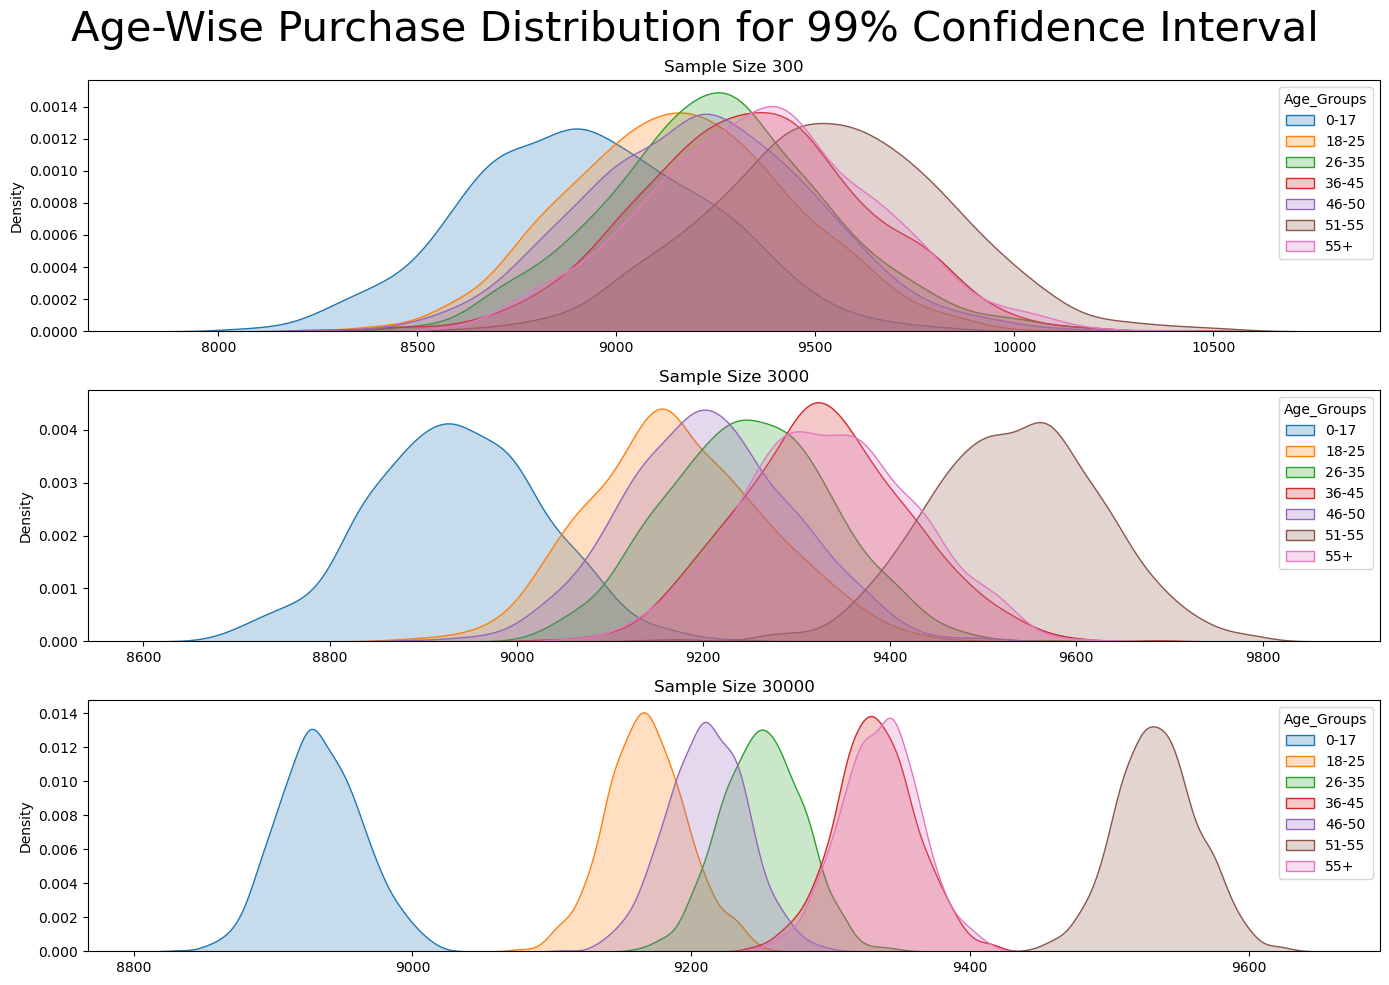

In [190]:
age_ci(99)

# **95% Confidence Interval**

For Sample Size 300 in Age Group 0-17 confidence interval of means: (8346.91, 9503.65)
For Sample Size 3000 in Age Group 0-17 confidence interval of means: (8744.53, 9110.33)
For Sample Size 30000 in Age Group 0-17 confidence interval of means: (8875.38, 8991.06)
For Sample Size 300 in Age Group 18-25 confidence interval of means: (8599.48, 9738.84)
For Sample Size 3000 in Age Group 18-25 confidence interval of means: (8986.88, 9347.16)
For Sample Size 30000 in Age Group 18-25 confidence interval of means: (9112.71, 9226.67)
For Sample Size 300 in Age Group 26-35 confidence interval of means: (8692.66, 9826.62)
For Sample Size 3000 in Age Group 26-35 confidence interval of means: (9073.9, 9432.5)
For Sample Size 30000 in Age Group 26-35 confidence interval of means: (9196.17, 9309.57)
For Sample Size 300 in Age Group 36-45 confidence interval of means: (8764.05, 9900.83)
For Sample Size 3000 in Age Group 36-45 confidence interval of means: (9154.97, 9514.47)
For Sample Size 30000 in Ag

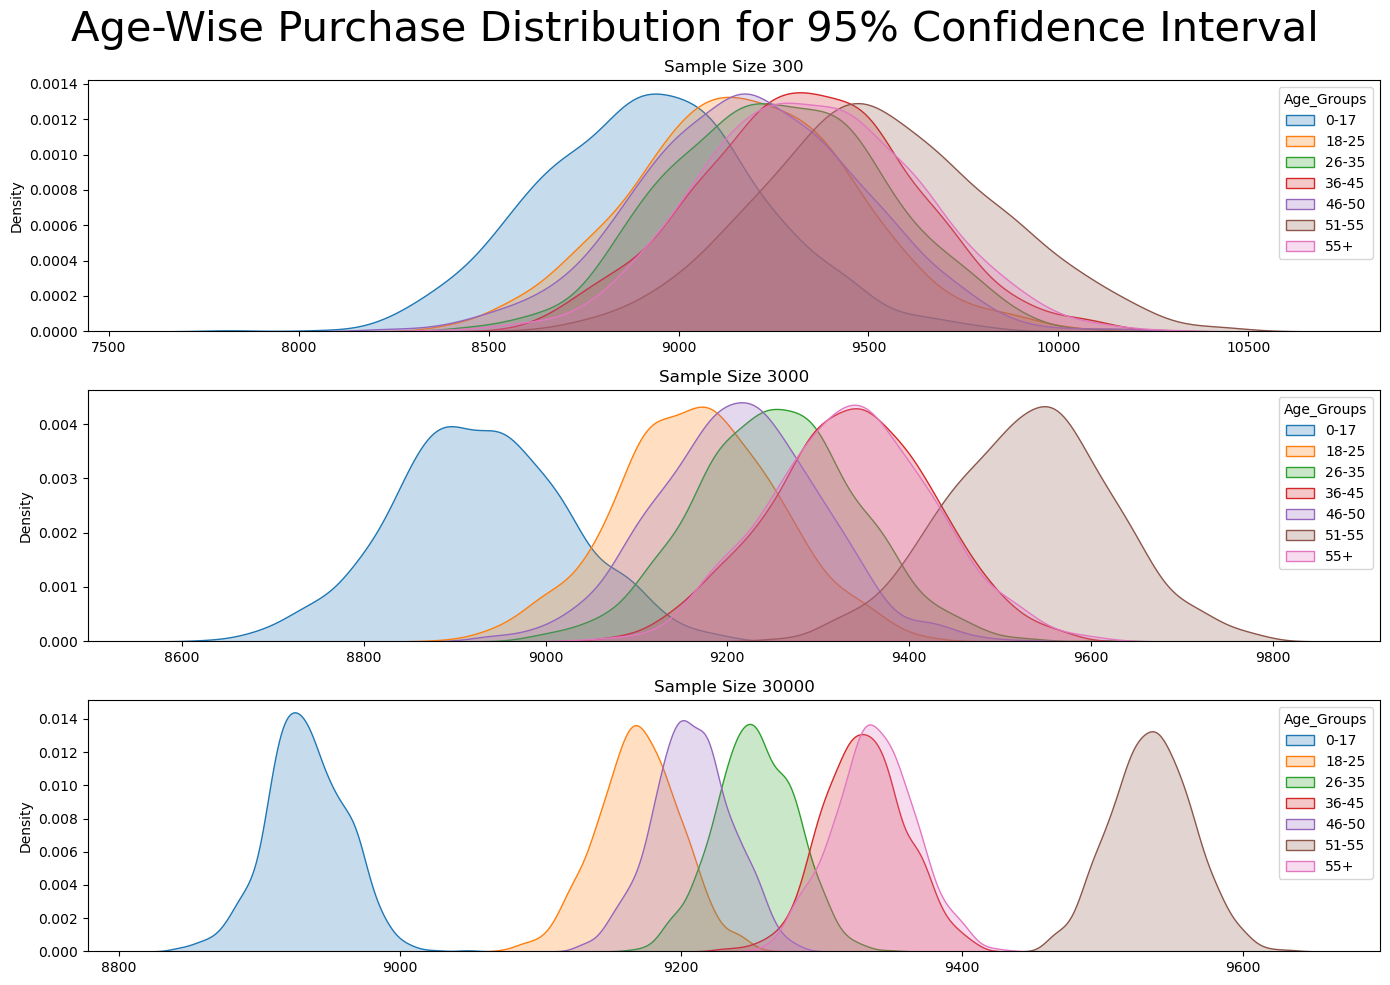

In [191]:
age_ci(95)

# **90% Confidence Interval**

For Sample Size 300 in Age Group 0-17 confidence interval of means: (8459.21, 9429.97)
For Sample Size 3000 in Age Group 0-17 confidence interval of means: (8778.07, 9085.07)
For Sample Size 30000 in Age Group 0-17 confidence interval of means: (8884.39, 8981.47)
For Sample Size 300 in Age Group 18-25 confidence interval of means: (8695.51, 9651.69)
For Sample Size 3000 in Age Group 18-25 confidence interval of means: (9016.17, 9318.53)
For Sample Size 30000 in Age Group 18-25 confidence interval of means: (9122.17, 9217.81)
For Sample Size 300 in Age Group 26-35 confidence interval of means: (8782.16, 9733.8)
For Sample Size 3000 in Age Group 26-35 confidence interval of means: (9105.02, 9405.96)
For Sample Size 30000 in Age Group 26-35 confidence interval of means: (9204.6, 9299.78)
For Sample Size 300 in Age Group 36-45 confidence interval of means: (8870.11, 9824.13)
For Sample Size 3000 in Age Group 36-45 confidence interval of means: (9179.21, 9480.91)
For Sample Size 30000 in Ag

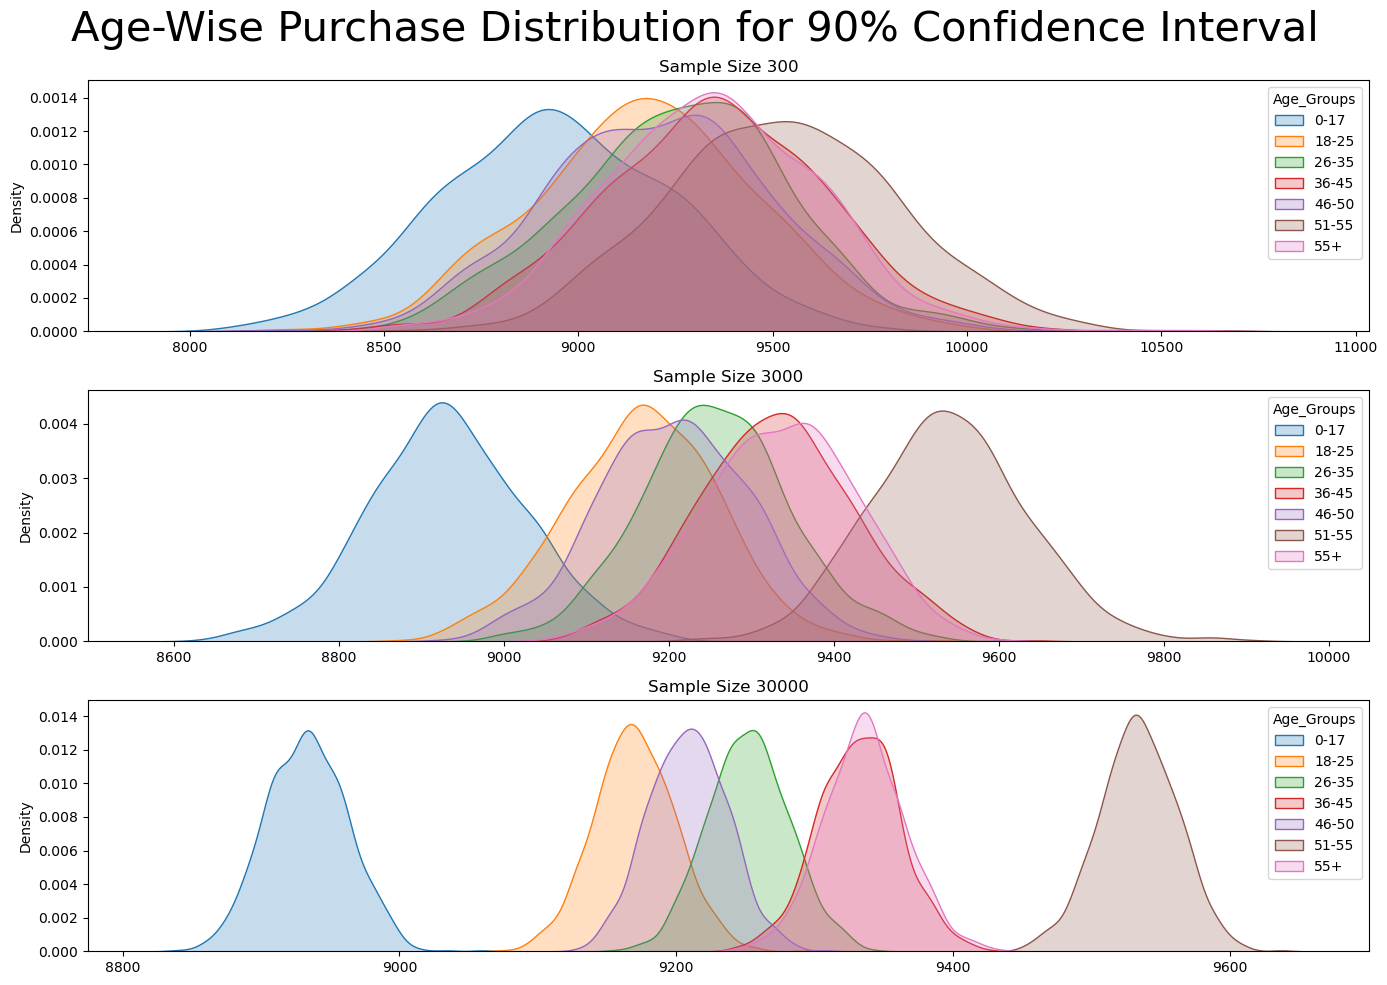

In [192]:
age_ci(90)

In [193]:
temp3  = {"Age_Group" : Age_Group, "Sample_Size" : Age_Sample_size , "Sample_Mean" : Age_Sample_mean ,"Lower_Limit": Age_Lower_limit, "Upper_Limit":Age_Upper_limit , "CI": Age_CI}
Age_Overlap  = pd.DataFrame(temp3)
Age_Overlap["CI Range"] = Age_Overlap["Upper_Limit"] - Age_Overlap["Lower_Limit"]
Age_Overlap

Age_Group  Sample_Size  Sample_Mean  Lower_Limit  Upper_Limit  CI  CI Range
0       0-17          300      8928.23      8168.13      9688.33  99   1520.20
1       0-17         3000      8934.08      8693.70      9174.46  99    480.76
2       0-17        30000      8933.73      8857.72      9009.74  99    152.02
3      18-25          300      9162.04      8413.35      9910.73  99   1497.38
4      18-25         3000      9172.18      8935.44      9408.92  99    473.48
..       ...          ...          ...          ...          ...  ..       ...
58     51-55         3000      9538.52      9385.75      9691.29  90    305.54
59     51-55        30000      9533.92      9485.61      9582.23  90     96.62
60       55+          300      9342.73      8866.81      9818.65  90    951.84
61       55+         3000      9333.52      9183.02      9484.02  90    301.00
62       55+        30000      9335.88      9288.29      9383.47  90     95.18

[63 rows x 7 columns]

# **Insights:**

- **Impact of Sample Size on Precision**

  The data shows that as the sample size increases, the confidence intervals narrow, leading to more precise estimates. For example, for the age group 18-25 with a sample size of 300, the sample mean is around 9150, with a confidence interval ranging from approximately 8500 to 9700. In contrast, with a sample size of 30000, the confidence interval tightens significantly, indicating more reliable insights.

- **Spending Patterns Across Age Groups**

  The age group 51-55 consistently shows the highest spending per transaction across various sample sizes, with a sample mean around 9500. This age group also maintains relatively narrow confidence intervals (e.g., 95% CI ranging from approximately 9380 to 9690), suggesting stable and higher spending behavior.

- **Overlapping Confidence Intervals**

  The age groups 26-35, 36-45, and 55+ exhibit overlapping confidence intervals, indicating similar spending patterns. For instance, the 55+ age group with a sample size of 3000 shows a mean close to 9330 with a 95% CI ranging from approximately 9180 to 9490, which is comparable to the 36-45 age group with similar sample sizes and intervals.

- **Spending Disparities in Younger Age Groups**

  The youngest age group (0-17) consistently shows the lowest spending, with a sample mean close to 8930 and a wider confidence interval. For instance, with a sample size of 30000, the 90% CI ranges from approximately 8880 to 8980, indicating lower and more variable spending compared to older age groups.

# **Recommendations:**

- **Tailored Marketing for High-Spending Age Groups**

  Given that the 51-55 age group consistently shows the highest spending, consider targeted marketing campaigns offering premium services, personalized recommendations, or loyalty programs to retain and further engage this demographic.

- **Segmentation Strategy for Similar Spending Groups**

  Since age groups 26-35, 36-45, and 55+ exhibit similar spending patterns, Walmart could optimize product offerings and promotions that cater specifically to the combined preferences of these age groups, streamlining marketing efforts and inventory management.

- **Incentives for Younger Shoppers**

  The lower spending in the 0-17 age group suggests an opportunity to increase their transaction values. Offering attractive discounts, rewards, or products that appeal to younger shoppers could help boost their spending and build long-term customer loyalty.

- **Leverage Precise Estimates for Operational Decisions**

  As larger sample sizes yield more precise spending estimates, Walmart should use data from extensive samples to make critical operational decisions, such as inventory management and pricing strategies, ensuring decisions are based on the most reliable data.

# **Answering questions:**

#### **1. Are women spending more money per transaction than men? Why or Why not**

- No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women). 
    
    The reason for less purchase by women could have several factors:

    - Males might be doing the purchase for females.
    - Salary can be a factor in less purchase.
    - We also need to see whether male-based products were sold more than women-based products to clearly identify difference in spending pattern.
    - If the female based products quality/quantity needs to be improved for women purchasing.

#### **2. Confidence intervals and distribution of the mean of the expenses by female and male customers**

- #### **For 95% CI in 1000 Iterations**
    - For Sample Size 300 confidence interval of Male means: (8858.33, 10010.79)
    - For Sample Size 300 confidence interval of Female means: (8202.71, 9281.63)
    - For Sample Size 3000 confidence interval of Male means: (9258.09, 9622.53)
    - For Sample Size 3000 confidence interval of Female means: (8569.1, 8910.3)
    - For Sample Size 30000 confidence interval of Male means: (9381.95, 9497.19)
    - For Sample Size 30000 confidence interval of Female means: (8680.49, 8788.37)

- #### **For 90% CI in 1000 Iterations**
    - For Sample Size 300 confidence interval of Male means: (8958.41, 9925.59)
    - For Sample Size 300 confidence interval of Female means: (8292.71, 9198.17)
    - For Sample Size 3000 confidence interval of Male means: (9280.72, 9586.56)
    - For Sample Size 3000 confidence interval of Female means: (8585.18, 8871.52)
    - For Sample Size 30000 confidence interval of Male means: (9388.19, 9484.91)
    - For Sample Size 30000 confidence interval of Female means: (8688.54, 8779.08)
    
- #### **For 99% CI in 1000 Iterations**
    - For Sample Size 300 confidence interval of Male means: (8692.9, 10207.48)
    - For Sample Size 300 confidence interval of Female means: (8031.54, 9449.48)
    - For Sample Size 3000 confidence interval of Male means: (9198.37, 9677.31)
    - For Sample Size 3000 confidence interval of Female means: (8509.44, 8957.84)
    - For Sample Size 30000 confidence interval of Male means: (9360.77, 9512.23)
    - For Sample Size 30000 confidence interval of Female means: (8663.66, 8805.44)

#### **3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

- No. Confidence intervals of average male and female spending are not overlapping. 
- This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

#### **4. Results when the same activity is performed for Married vs Unmarried**

-  #### **For 90% CI in 1000 Iterations**
    - For Sample Size 300 confidence interval of Married means: (8518.89, 10011.07)
    - For Sample Size 300 confidence interval of Unmarried means: (8507.92, 10003.18)
    - For Sample Size 3000 confidence interval of Married means: (9030.61, 9502.51)
    - For Sample Size 3000 confidence interval of Unmarried means: (9030.77, 9503.65)
    - For Sample Size 30000 confidence interval of Married means: (9185.68, 9334.92)
    - For Sample Size 30000 confidence interval of Unmarried means: (9190.52, 9340.08)

-  #### **For 95% CI in 1000 Iterations**
    - For Sample Size 300 confidence interval of Married means: (8679.15, 9814.55)
    - For Sample Size 300 confidence interval of Unmarried means: (8676.07, 9813.83)
    - For Sample Size 3000 confidence interval of Married means: (9081.81, 9440.87)
    - For Sample Size 3000 confidence interval of Unmarried means: (9085.46, 9445.28)
    - For Sample Size 30000 confidence interval of Married means: (9202.83, 9316.39)
    - For Sample Size 30000 confidence interval of Unmarried means: (9208.32, 9322.12)

-  #### **For 99% CI in 1000 Iterations**
    - For Sample Size 300 confidence interval of Married means: (8792.23, 9745.09)
    - For Sample Size 300 confidence interval of Unmarried means: (8798.16, 9753.0)
    - For Sample Size 3000 confidence interval of Married means: (9113.49, 9414.83)
    - For Sample Size 3000 confidence interval of Unmarried means: (9110.72, 9412.68)
    - For Sample Size 30000 confidence interval of Married means: (9213.82, 9309.12)
    - For Sample Size 30000 confidence interval of Unmarried means: (9218.89, 9314.39)

#### **5. Results when the same activity is performed for Age**

-  #### **For 99% CI in 1000 Iterations**

    - For Sample Size 300 in Age Group 0-17 confidence interval of means: (8168.13, 9688.33)
    - For Sample Size 3000 in Age Group 0-17 confidence interval of means: (8693.7, 9174.46)
    - For Sample Size 30000 in Age Group 0-17 confidence interval of means: (8857.72, 9009.74)
    - For Sample Size 300 in Age Group 18-25 confidence interval of means: (8413.35, 9910.73)
    - For Sample Size 3000 in Age Group 18-25 confidence interval of means: (8935.44, 9408.92)
    - For Sample Size 30000 in Age Group 18-25 confidence interval of means: (9092.98, 9242.74)
    - For Sample Size 300 in Age Group 26-35 confidence interval of means: (8508.92, 9999.2)
    - For Sample Size 3000 in Age Group 26-35 confidence interval of means: (9013.43, 9484.71)
    - For Sample Size 30000 in Age Group 26-35 confidence interval of means: (9176.24, 9325.28)
    - For Sample Size 300 in Age Group 36-45 confidence interval of means: (8596.43, 10090.41)
    - For Sample Size 3000 in Age Group 36-45 confidence interval of means: (9092.28, 9564.74)
    - For Sample Size 30000 in Age Group 36-45 confidence interval of means: (9257.17, 9406.57)
    - For Sample Size 300 in Age Group 46-50 confidence interval of means: (8473.93, 9951.33)
    - For Sample Size 3000 in Age Group 46-50 confidence interval of means: (8971.74, 9438.94)
    - For Sample Size 30000 in Age Group 46-50 confidence interval of means: (9137.02, 9284.76)
    - For Sample Size 300 in Age Group 51-55 confidence interval of means: (8777.3, 10290.44)
    - For Sample Size 3000 in Age Group 51-55 confidence interval of means: (9294.46, 9772.94)
    - For Sample Size 30000 in Age Group 51-55 confidence interval of means: (9458.5, 9609.8)
    - For Sample Size 300 in Age Group 55+ confidence interval of means: (8616.81, 10107.39)
    - For Sample Size 3000 in Age Group 55+ confidence interval of means: (9098.08, 9569.46)
    - For Sample Size 30000 in Age Group 55+ confidence interval of means: (9260.81, 9409.85)


-  #### **For 95% CI in 1000 Iterations**

    - For Sample Size 300 in Age Group 0-17 confidence interval of means: (8346.91, 9503.65)
    - For Sample Size 3000 in Age Group 0-17 confidence interval of means: (8744.53, 9110.33)
    - For Sample Size 30000 in Age Group 0-17 confidence interval of means: (8875.38, 8991.06)
    - For Sample Size 300 in Age Group 18-25 confidence interval of means: (8599.48, 9738.84)
    - For Sample Size 3000 in Age Group 18-25 confidence interval of means: (8986.88, 9347.16)
    - For Sample Size 30000 in Age Group 18-25 confidence interval of means: (9112.71, 9226.67)
    - For Sample Size 300 in Age Group 26-35 confidence interval of means: (8692.66, 9826.62)
    - For Sample Size 3000 in Age Group 26-35 confidence interval of means: (9073.9, 9432.5)
    - For Sample Size 30000 in Age Group 26-35 confidence interval of means: (9196.17, 9309.57)
    - For Sample Size 300 in Age Group 36-45 confidence interval of means: (8764.05, 9900.83)
    - For Sample Size 3000 in Age Group 36-45 confidence interval of means: (9154.97, 9514.47)
    - For Sample Size 30000 in Age Group 36-45 confidence interval of means: (9273.57, 9387.25)
    - For Sample Size 300 in Age Group 46-50 confidence interval of means: (8626.63, 9750.79)
    - For Sample Size 3000 in Age Group 46-50 confidence interval of means: (9033.43, 9388.93)
    - For Sample Size 30000 in Age Group 46-50 confidence interval of means: (9151.63, 9264.05)
    - For Sample Size 300 in Age Group 51-55 confidence interval of means: (8945.79, 10097.15)
    - For Sample Size 3000 in Age Group 51-55 confidence interval of means: (9349.18, 9713.26)
    - For Sample Size 30000 in Age Group 51-55 confidence interval of means: (9477.39, 9592.51)
    - For Sample Size 300 in Age Group 55+ confidence interval of means: (8775.03, 9909.23)
    - For Sample Size 3000 in Age Group 55+ confidence interval of means: (9156.07, 9514.75)
    - For Sample Size 30000 in Age Group 55+ confidence interval of means: (9280.65, 9394.05)


-  #### **For 90% CI in 1000 Iterations**
    - For Sample Size 300 in Age Group 0-17 confidence interval of means: (8459.21, 9429.97)
    - For Sample Size 3000 in Age Group 0-17 confidence interval of means: (8778.07, 9085.07)
    - For Sample Size 30000 in Age Group 0-17 confidence interval of means: (8884.39, 8981.47)
    - For Sample Size 300 in Age Group 18-25 confidence interval of means: (8695.51, 9651.69)
    - For Sample Size 3000 in Age Group 18-25 confidence interval of means: (9016.17, 9318.53)
    - For Sample Size 30000 in Age Group 18-25 confidence interval of means: (9122.17, 9217.81)
    - For Sample Size 300 in Age Group 26-35 confidence interval of means: (8782.16, 9733.8)
    - For Sample Size 3000 in Age Group 26-35 confidence interval of means: (9105.02, 9405.96)
    - For Sample Size 30000 in Age Group 26-35 confidence interval of means: (9204.6, 9299.78)
    - For Sample Size 300 in Age Group 36-45 confidence interval of means: (8870.11, 9824.13)
    - For Sample Size 3000 in Age Group 36-45 confidence interval of means: (9179.21, 9480.91)
    - For Sample Size 30000 in Age Group 36-45 confidence interval of means: (9284.37, 9379.77)
    - For Sample Size 300 in Age Group 46-50 confidence interval of means: (8734.25, 9677.67)
    - For Sample Size 3000 in Age Group 46-50 confidence interval of means: (9056.95, 9355.29)
    - For Sample Size 30000 in Age Group 46-50 confidence interval of means: (9161.43, 9255.77)
    - For Sample Size 300 in Age Group 51-55 confidence interval of means: (9039.05, 10005.31)
    - For Sample Size 3000 in Age Group 51-55 confidence interval of means: (9385.75, 9691.29)
    - For Sample Size 30000 in Age Group 51-55 confidence interval of means: (9485.61, 9582.23)
    - For Sample Size 300 in Age Group 55+ confidence interval of means: (8866.81, 9818.65)
    - For Sample Size 3000 in Age Group 55+ confidence interval of means: (9183.02, 9484.02)
    - For Sample Size 30000 in Age Group 55+ confidence interval of means: (9288.29, 9383.47)



# **Overall Recommendations**

1. Target High-Spending Demographics

  - Male Customers: Men consistently spend more than women on average. Focus on retaining male customers by offering tailored promotions and exclusive deals, particularly in categories where they spend the most.
  - Unmarried Customers: Unmarried customers also tend to spend more. Prioritize acquiring and retaining this group with targeted marketing and special offers.
2. Focus on Key Age Groups

  - Ages 18-45: Customers in this age range are responsible for the majority of sales. Tailor product offerings, promotions, and marketing efforts to cater specifically to their preferences. Consider offering exclusive deals on products popular among this demographic.
  - Ages 51-55: This age group has the highest spending per transaction. Enhance their shopping experience with personalized recommendations, loyalty programs, and exclusive pre-sale access to drive further engagement and spending.
3. Optimize Product Strategy

  - Popular Product Categories: Focus on promoting products in the top-performing categories (e.g., categories 1, 5, 8, and 11). Consider bundling these products with less popular items to boost overall sales.
  - City-Specific Strategy: Male customers in City Category C spend more than those in other cities. Tailor promotions and product offerings specifically for this region to maximize revenue.
4. Engage Younger and Female Shoppers

  - Younger Shoppers (0-17): Increase spending among this group by offering engaging activities, such as in-store games or special discounts. Building brand loyalty at a young age can lead to long-term customer retention.
  - Female Customers: Since women tend to spend less, create promotions and offers specifically tailored to their needs and preferences. Offering additional discounts or rewards programs may encourage higher spending.

5. Post-Purchase Engagement

  - Post-Sale Strategy: After major sales events like Black Friday, follow up with customers through personalized emails, offering related products or special discounts. This will help increase customer retention and encourage repeat business beyond the holiday season.